# DATA 606 Capstone Project: Evaluating the Efficacy of Public Works Projects on Reducing Crime in San Francisco 
# Phase 3
### In Part 1 notebook, I will:
- Make 2 datasets out of the cleaned dataset:
    - Pit Stop Neighborhoods sub-dataset
    - Non-Pit Stop Neighborhoods sub-dataset
- Perform Pearson Correlation Coefficient tests on Pit Stop Neighborhoods sub-dataset
    - Plot heatmaps of statistically significant negative correlations between incident categories and number of pit stops in each Pit Stop neighborhood
    
### In Part 2 Notebook, I will:
- Predict where and what crimes will occur using Machine Learning algorithms
    - Use Label Encoder
    - Split datasets into train and test sets
    - Run Decision Tree Classifiers and Random Forest Classifiers on Pit Stop Neighborhoods and Non-Pit Stop Neighborhoods sub-datasets separately, predicting the following variables:
        - Incident Severity Category (Decision Tree Classifiers only)
        - Neighborhood Name
        - Incident Category
    - Plot confusion matrices for the predictions of each variable
    - For the Decision Tree Classifier only:
        - Make plotly maps using the neighborhood predictions and incident category predictions of both the Pit Stop Neighborhoods sub-dataset and Non-Pit Stop Neighborhoods sub-dataset

In [1]:
#import statements
!pip install --upgrade pip
import pandas as pd
import numpy as np
import requests
import io
from matplotlib import pyplot as plt
!pip install seaborn==0.9.0
import seaborn as sns
!pip install "notebook>=5.3" "ipywidgets>=7.2"
!pip install plotly==4.10.0

import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#Import NEW CLEANED Combined PD Incidents 2003-Present data set
#data set also available on Github project page
cleaned_incident_data = pd.read_csv(r"C:\Users\sdelp\Documents\Becky\NEW CLEANED Combined PD Incidents 2003-Present.csv",
                                    dtype = {'Address': str, 'Analysis Neighborhoods': str, 'Areas of Vulnerability, 2016': str,
                                    'Current Police Districts': float, 'Current Supervisor Districts': float, 
                                    'Incident Category': str, 'Incident Code': int, 'Incident Date': str,
                                    'Incident Day of Week': str, 'Incident Description': str, 'Incident Number': int, 
                                    'Incident Time': str, 'Incident Year': int, 'Latitude': float, 'Longitude': float, 
                                    'Police District': str, 'Resolution': str, 'SF Find Neighborhoods': float, 
                                    'Incident Severity Category': int, 'Neighborhood Name': str, 'Incident Counter': int})

In [3]:
#Convert to a dataframe
cleaned_incident_df = pd.DataFrame(cleaned_incident_data, columns = ['Address', 'Analysis Neighborhoods',
                                   'Areas of Vulnerability, 2016', 'Current Police Districts', 'Current Supervisor Districts',
                                   'Incident Category', 'Incident Code', 'Incident Date', 'Incident Day of Week',
                                   'Incident Description', 'Incident Number', 'Incident Time', 'Incident Year', 'Latitude', 
                                   'Longitude', 'Police District', 'Resolution', 'SF Find Neighborhoods', 
                                   'Incident Severity Category', 'Neighborhood Name', 'Incident Counter'])

In [4]:
#Define a function that looks at neighborhood name and returns how many pit stops are in that neighborhood
def pit_stop(row):
    if row == 'Bayview Hunters Point': return 1
    elif row == 'Haight Ashbury': return 1
    elif row == 'Castro/Upper Market': return 2
    elif row == 'Financial District/South Beach': return 2
    elif row == 'Golden Gate Park': return 2
    elif row == 'Mission': return 5
    elif row == 'North Beach': return 1
    elif row == 'South of Market': return 2
    elif row == 'Sunset/Parkside': return 1
    elif row == 'Tenderloin': return 9
    else: return 0

In [5]:
#Apply pit_stop function to dataframe and add a column named Number of Pit Stops
cleaned_incident_df['Number of Pit Stops'] = cleaned_incident_df['Neighborhood Name'].apply(pit_stop)

In [6]:
#Sort dataframe by year
cleaned_incident_df.sort_values(by = 'Incident Year', ascending = True)

,Address,Analysis Neighborhoods,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Code,Incident Date,Incident Day of Week,Incident Description,...,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Incident Counter,Number of Pit Stops
885115,BROADWAY ST / KEARNY ST,23.0,2.0,6.0,3.0,DRUG/NARCOTIC,16626,2003-10-25 00:00:00,Saturday,TRANSPORTATION OF COCAINE,...,2003,37.798018,-122.405476,CENTRAL,"ARREST, BOOKED",106.0,1,North Beach,1,1
950550,800 Block of FOLSOM ST,34.0,2.0,1.0,10.0,LARCENY/THEFT,6244,2003-02-08 00:00:00,Saturday,GRAND THEFT FROM LOCKED AUTO,...,2003,37.781167,-122.402344,SOUTHERN,NONE,32.0,0,South of Market,1,2
281902,TURK ST / LEAVENWORTH ST,36.0,2.0,5.0,10.0,WARRANTS,63010,2003-09-26 00:00:00,Friday,WARRANT ARREST,...,2003,37.782793,-122.414056,TENDERLOIN,"ARREST, BOOKED",20.0,3,Tenderloin,1,9
876858,HYDE ST / EDDY ST,36.0,2.0,5.0,10.0,LOITERING,19075,2003-09-29 00:00:00,Monday,LOITERING,...,2003,37.783516,-122.415885,TENDERLOIN,NONE,20.0,1,Tenderloin,1,9
876857,HAIGHT ST / CENTRAL AV,3.0,1.0,7.0,11.0,OTHER OFFENSES,65016,2003-01-10 00:00:00,Friday,"DRIVERS LICENSE, SUSPENDED OR REVOKED",...,2003,37.770426,-122.443650,PARK,"ARREST, CITED",25.0,3,Haight Ashbury,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353960,NaN,35.0,1.0,10.0,7.0,LARCENY/THEFT,6224,2020-02-21 00:00:00,Friday,"THEFT, FROM UNLOCKED VEHICLE, >$950",...,2020,37.736182,-122.504228,TARAVAL,OPEN OR ACTIVE,40.0,0,Sunset/Parkside,1,1
1353959,NaN,8.0,2.0,6.0,3.0,LARCENY/THEFT,6374,2020-02-18 00:00:00,Tuesday,"THEFT, OTHER PROPERTY, >$950",...,2020,37.790247,-122.400555,CENTRAL,OPEN OR ACTIVE,108.0,0,Financial District/South Beach,1,2
1353958,NaN,26.0,2.0,2.0,9.0,LARCENY/THEFT,6224,2020-02-18 00:00:00,Tuesday,"THEFT, FROM UNLOCKED VEHICLE, >$950",...,2020,37.755096,-122.392884,BAYVIEW,OPEN OR ACTIVE,54.0,0,Potrero Hill,1,0
1353956,NaN,34.0,2.0,1.0,10.0,LARCENY/THEFT,6372,2020-02-20 00:00:00,Thursday,"THEFT, OTHER PROPERTY, $50-$200",...,2020,37.782024,-122.401160,SOUTHERN,OPEN OR ACTIVE,32.0,0,South of Market,1,2


In [7]:
#Split datasets into two: 1 dataset contains incidents in pit stop neighborhoods, the other contains incidents in non-pit stop
#neighborhoods

#Create pit stop neighborhood dataframe
pitstop_nb_incidents_df = cleaned_incident_df[cleaned_incident_df['Number of Pit Stops'] != 0]

In [8]:
pitstop_nb_incidents_df.head()

,Address,Analysis Neighborhoods,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Code,Incident Date,Incident Day of Week,Incident Description,...,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Incident Counter,Number of Pit Stops
1,0 Block of UNITEDNATIONS PZ,36.0,2.0,5.0,10.0,DRUG/NARCOTIC,16010,2005-10-18 00:00:00,Tuesday,POSSESSION OF MARIJUANA,...,2005,37.779944,-122.414318,TENDERLOIN,"ARREST, BOOKED",21.0,1,Tenderloin,1,9
2,1500 Block of KIRKWOOD AV,1.0,2.0,2.0,9.0,MOTOR VEHICLE THEFT,7055,2005-01-29 00:00:00,Saturday,RECOVERED VEHICLE - STOLEN OUTSIDE SF,...,2005,37.737576,-122.388799,BAYVIEW,NONE,86.0,0,Bayview Hunters Point,1,1
4,1500 Block of BAY SHORE BL,1.0,2.0,2.0,9.0,MOTOR VEHICLE THEFT,7024,2003-02-01 00:00:00,Saturday,STOLEN TRAILER,...,2003,37.724556,-122.401097,BAYVIEW,NONE,86.0,0,Bayview Hunters Point,1,1
5,400 Block of DAVIS CT,8.0,1.0,6.0,3.0,LARCENY/THEFT,6243,2006-02-12 00:00:00,Sunday,PETTY THEFT FROM LOCKED AUTO,...,2006,37.796715,-122.398188,CENTRAL,NONE,77.0,0,Financial District/South Beach,1,2
7,2600 Block of MISSION ST,20.0,2.0,3.0,2.0,LARCENY/THEFT,6304,2010-04-23 00:00:00,Friday,GRAND THEFT FROM A BUILDING,...,2010,37.754626,-122.418600,MISSION,NONE,53.0,0,Mission,1,5


In [9]:
pitstop_nb_incidents_df.shape

(832430, 22)

In [10]:
#Make a dataframe that includes incidents from all non-pit stop neighborhoods
nonpitstop_nb_incidents_df = cleaned_incident_df[cleaned_incident_df['Number of Pit Stops'] == 0]

In [11]:
nonpitstop_nb_incidents_df.head()

,Address,Analysis Neighborhoods,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Code,Incident Date,Incident Day of Week,Incident Description,...,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Incident Counter,Number of Pit Stops
0,3400 Block of PIERCE ST,13.0,1.0,4.0,6.0,WARRANTS,63010,2011-07-01 00:00:00,Friday,WARRANT ARREST,...,2011,37.802151,-122.439758,NORTHERN,"ARREST, BOOKED",17.0,3,Marina,1,0
3,900 Block of COLUMBUS AV,32.0,1.0,6.0,3.0,NON-CRIMINAL,64020,2011-06-02 00:00:00,Thursday,"AIDED CASE, MENTAL DISTURBED",...,2011,37.803109,-122.414354,CENTRAL,PSYCHOPATHIC CASE,107.0,3,Russian Hill,1,0
6,2000 Block of BAKER ST,30.0,1.0,8.0,6.0,LARCENY/THEFT,6374,2009-08-06 00:00:00,Thursday,GRAND THEFT OF PROPERTY,...,2009,37.789909,-122.444143,RICHMOND,NONE,102.0,0,Pacific Heights,1,0
15,500 Block of LINCOLN WY,14.0,1.0,7.0,11.0,VANDALISM,28160,2009-11-16 00:00:00,Monday,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",...,2009,37.765931,-122.463763,PARK,NONE,109.0,1,Inner Sunset,1,0
17,FILLMORE ST / FELL ST,9.0,1.0,4.0,11.0,LARCENY/THEFT,6241,2006-12-07 00:00:00,Thursday,PETTY THEFT FROM LOCKED AUTO,...,2006,37.774902,-122.431014,NORTHERN,NONE,52.0,0,Hayes Valley,1,0


In [12]:
nonpitstop_nb_incidents_df.shape

(573223, 22)

In [13]:
#Make a pivot table using the pit stop neighborhood incidents sub-dataset that counts the number of each incident category
#in each pit stop neighborhood in each year
psnb_all_incident_counter_df = pd.pivot_table(pitstop_nb_incidents_df, values = 'Incident Counter', 
                                              index = ['Incident Year', 'Neighborhood Name'], 
                                              columns = ['Incident Category'],
                                              aggfunc = np.sum, fill_value = 0)

psnb_all_incident_counter_df

Incident Category                             ARSON  ASSAULT  BAD CHECKS  \
Incident Year Neighborhood Name                                            
2003          Bayview Hunters Point              34      565           3   
              Castro/Upper Market                 1      142           0   
              Financial District/South Beach      2      266          10   
              Golden Gate Park                    1       38           0   
              Haight Ashbury                      1       65           0   
...                                             ...      ...         ...   
2020          Mission                            44      612           0   
              North Beach                         8       71           0   
              South of Market                    22      530           0   
              Sunset/Parkside                    10      103           0   
              Tenderloin                         19      722           0   

Incident Category                             BRIBERY  BURGLARY  CASE CLOSURE  \
Incident Year Neighborhood Name                                                 
2003          Bayview Hunters Point                 0       185             0   
              Castro/Upper Market                   0        97             0   
              Financial District/South Beach        0       219             0   
              Golden Gate Park                      0         1             0   
              Haight Ashbury                        0        56             0   
...                                               ...       ...           ...   
2020          Mission                               0       519             9   
              North Beach                           0       142            12   
              South of Market                       0       455            68   
              Sunset/Parkside                       0       101            11   
              Tenderloin                            0       321            15   

Incident Category                             CIVIL SIDEWALKS  \
Incident Year Neighborhood Name                                 
2003          Bayview Hunters Point                         0   
              Castro/Upper Market                           0   
              Financial District/South Beach                0   
              Golden Gate Park                              0   
              Haight Ashbury                                0   
...                                                       ...   
2020          Mission                                       3   
              North Beach                                   0   
              South of Market                               0   
              Sunset/Parkside                               0   
              Tenderloin                                    0   

Incident Category                             COURTESY REPORT  \
Incident Year Neighborhood Name                                 
2003          Bayview Hunters Point                         0   
              Castro/Upper Market                           0   
              Financial District/South Beach                0   
              Golden Gate Park                              0   
              Haight Ashbury                                0   
...                                                       ...   
2020          Mission                                      17   
              North Beach                                   0   
              South of Market                               8   
              Sunset/Parkside                               9   
              Tenderloin                                   20   

Incident Category                             DISORDERLY CONDUCT  \
Incident Year Neighborhood Name                                    
2003          Bayview Hunters Point                           10   
              Castro/Upper Market                            

In [14]:
#Reset multi-index to a single index
psnb_all_incident_counter_df = psnb_all_incident_counter_df.reset_index()                

In [15]:
psnb_all_incident_counter_df

Incident Category,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC COLLISION,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing
0,2003,Bayview Hunters Point,34,565,3,0,185,0,0,0,...,0,0,0,14,207,0,0,302,69,0
1,2003,Castro/Upper Market,1,142,0,0,97,0,0,0,...,0,0,0,23,84,0,0,97,11,0
2,2003,Financial District/South Beach,2,266,10,0,219,0,0,0,...,0,0,0,75,122,0,0,181,12,0
3,2003,Golden Gate Park,1,38,0,0,1,0,0,0,...,0,0,0,0,19,0,0,48,6,0
4,2003,Haight Ashbury,1,65,0,0,56,0,0,0,...,0,0,0,5,47,0,0,52,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2020,Mission,44,612,0,0,519,9,3,17,...,16,180,0,0,28,6,8,362,166,39
176,2020,North Beach,8,71,0,0,142,12,0,0,...,6,8,0,0,3,0,1,44,14,4
177,2020,South of Market,22,530,0,0,455,68,0,8,...,7,69,0,0,18,4,2,318,83,13
178,2020,Sunset/Parkside,10,103,0,0,101,11,0,9,...,6,15,0,0,12,0,0,40,19,4


In [ ]:
#Save pivot table as a csv so that it can be loaded in to this and other jupyter notebooks
psnb_all_incident_counter_df.to_csv(r'C:\Users\Becky\Documents\MPS Data Science\DATA 606\Project Datasets\Phase 3 Neighborhood Incident Counter.csv',
                   index = False)

In [16]:
#Import Phase 3 Neighborhood Incident Counter data set
#data set also available on Github project page
phase3_incident_counter_data = pd.read_csv(r"C:\Users\sdelp\Documents\Becky\Phase 3 Neighborhood Incident Counter.csv",
                                           dtype = {'Incident Year': int, 'Neighborhood Name': str, 'ARSON': int, 
                                                    'ASSAULT': int, 'BAD CHECKS': int, 'BRIBERY': int, 'BURGLARY': int, 
                                                    'CASE CLOSURE': int, 'CIVIL SIDEWALKS': int, 'COURTESY REPORT': int,
                                                    'DISORDERLY CONDUCT': int, 'DRIVING UNDER THE INFLUENCE': int, 
                                                    'DRUG/NARCOTIC': int, 'DRUNKENNESS': int, 'EMBEZZLEMENT': int, 
                                                    'EXTORTION': int, 'FIRE REPORT': int, 'FORGERY/COUNTERFEITING': int,
                                                    'FRAUD': int, 'GAMBLING': int, 'HOMICIDE': int, 
                                                    'HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE': int, 
                                                    'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS': int, 'KIDNAPPING': int, 
                                                    'LARCENY/THEFT': int, 'LIQUOR LAWS': int, 'LOITERING': int, 
                                                    'LOST PROPERTY': int, 'MALICIOUS MISCHIEF': int, 
                                                    'MISCELLANEOUS INVESTIGATION': int, 'MISSING PERSON': int, 
                                                    'MOTOR VEHICLE THEFT': int, 'NON-CRIMINAL': int, 
                                                    'OFFENCES AGAINST THE FAMILY AND CHILDREN': int, 'OTHER MISCELLANEOUS': int,
                                                    'OTHER OFFENSES': int, 'PORNOGRAPHY/OBSCENE MAT': int, 'PROSTITUTION': int,
                                                    'RAPE': int, 'RECOVERED VEHICLE': int, 'ROBBERY': int, 
                                                    'SECONDARY CODES': int, 'SEX OFFENSE': int, 'SEX OFFENSES, FORCIBLE': int,
                                                    'SEX OFFENSES, NON FORCIBLE': int, 'STOLEN PROPERTY': int, 'SUICIDE': int,
                                                    'SUSPICIOUS': int, 'SUSPICIOUS OCC': int, 'TRAFFIC COLLISION': int, 
                                                    'TRAFFIC VIOLATION ARREST': int, 'TREA': int, 'TRESPASS': int, 
                                                    'VANDALISM': int, 'VEHICLE IMPOUNDED': int, 'VEHICLE MISPLACED': int, 
                                                    'WARRANTS': int, 'WEAPONS OFFENSE': int, 'missing': int, 
                                                    'NUMBER OF PIT STOPS': int})

In [17]:
#Convert to a dataframe
phase3_incident_counter_df = pd.DataFrame(phase3_incident_counter_data, 
                                          columns = ['Incident Year', 'Neighborhood Name', 'ARSON', 'ASSAULT', 'BAD CHECKS',
                                                     'BRIBERY', 'BURGLARY', 'CASE CLOSURE', 'CIVIL SIDEWALKS', 
                                                     'COURTESY REPORT', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 
                                                     'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FIRE REPORT',
                                                     'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'HOMICIDE', 
                                                     'HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE', 
                                                     'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS', 'KIDNAPPING', 'LARCENY/THEFT',
                                                     'LIQUOR LAWS', 'LOITERING', 'LOST PROPERTY', 'MALICIOUS MISCHIEF', 
                                                     'MISCELLANEOUS INVESTIGATION', 'MISSING PERSON', 'MOTOR VEHICLE THEFT',
                                                     'NON-CRIMINAL', 'OFFENCES AGAINST THE FAMILY AND CHILDREN', 
                                                     'OTHER MISCELLANEOUS', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
                                                     'PROSTITUTION', 'RAPE', 'RECOVERED VEHICLE', 'ROBBERY', 'SECONDARY CODES',
                                                     'SEX OFFENSE', 'SEX OFFENSES, FORCIBLE', 'SEX OFFENSES, NON FORCIBLE',
                                                     'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS', 'SUSPICIOUS OCC',
                                                     'TRAFFIC COLLISION', 'TRAFFIC VIOLATION ARREST', 'TREA', 'TRESPASS', 
                                                     'VANDALISM', 'VEHICLE IMPOUNDED', 'VEHICLE MISPLACED', 'WARRANTS',
                                                     'WEAPONS OFFENSE', 'missing', 'NUMBER OF PIT STOPS'])

In [18]:
phase3_incident_counter_df.head()

,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing,NUMBER OF PIT STOPS
0,2003,Bayview Hunters Point,34,565,3,0,185,0,0,0,...,0,0,14,207,0,0,302,69,0,0
1,2003,Castro/Upper Market,1,142,0,0,97,0,0,0,...,0,0,23,84,0,0,97,11,0,0
2,2003,Financial District/South Beach,2,266,10,0,219,0,0,0,...,0,0,75,122,0,0,181,12,0,0
3,2003,Golden Gate Park,1,38,0,0,1,0,0,0,...,0,0,0,19,0,0,48,6,0,0
4,2003,Haight Ashbury,1,65,0,0,56,0,0,0,...,0,0,5,47,0,0,52,11,0,0


### Look at the correlations between number of pit stops and each incident category in each pit stop neighborhood.

#### Bayview Hunters Point

In [19]:
#Make a dataframe that only includes data about Bayview Hunters Point
bayview_incidents_df = phase3_incident_counter_df[phase3_incident_counter_df['Neighborhood Name'] == 'Bayview Hunters Point']
bayview_incidents_df.head()

,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing,NUMBER OF PIT STOPS
0,2003,Bayview Hunters Point,34,565,3,0,185,0,0,0,...,0,0,14,207,0,0,302,69,0,0
10,2004,Bayview Hunters Point,22,541,2,4,152,0,0,0,...,0,0,27,228,0,0,330,92,0,0
20,2005,Bayview Hunters Point,25,435,0,2,206,0,0,0,...,0,0,38,234,0,0,272,89,0,0
30,2006,Bayview Hunters Point,23,500,2,1,211,0,0,0,...,0,0,37,270,0,0,238,90,0,0
40,2007,Bayview Hunters Point,32,480,1,2,186,0,0,0,...,0,0,64,283,0,0,249,84,0,0


In [20]:
#Remove data from 2020
bayview_incidents_df = bayview_incidents_df[bayview_incidents_df['Incident Year'] != 2020]

In [21]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
#The results of pearsonr are (correlation coefficient, p-value)
#a p-value < 0.05 is statistically significant
arson_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                      bayview_incidents_df['ARSON'])
print('Correlation between Num of Pit Stops and Arson Incidents:', arson_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                         bayview_incidents_df['ASSAULT'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
bad_checks_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                           bayview_incidents_df['BAD CHECKS'])
print('Correlation between Num of Pit Stops and Num of Bad Checks:', bad_checks_pitstops_correlation)
bribery_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                        bayview_incidents_df['BRIBERY'])
print('Correlation between Num of Pit Stops and Num of Briberies:', bribery_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                         bayview_incidents_df['BURGLARY'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
case_closure_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                             bayview_incidents_df['CASE CLOSURE'])
print('Correlation between Num of Pit Stops and Num of Case Closures:', case_closure_pitstops_correlation)
civil_sidewalks_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                                bayview_incidents_df['CIVIL SIDEWALKS'])
print('Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses:', civil_sidewalks_pitstops_correlation)
courtesy_sidewalks_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                                   bayview_incidents_df['COURTESY REPORT'])
print('Correlation between Num of Pit Stops and Num of Courtesy Reports:', courtesy_sidewalks_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                         bayview_incidents_df['DISORDERLY CONDUCT'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
dui_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                    bayview_incidents_df['DRIVING UNDER THE INFLUENCE'])
print('Correlation between Num of Pit Stops and DUI Offenses:', dui_pitstops_correlation)
drug_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                     bayview_incidents_df['DRUG/NARCOTIC'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
drunk_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                      bayview_incidents_df['DRUNKENNESS'])
print('Correlation between Num of Pit Stops and Num of Drunkenness Offenses:', drunk_pitstops_correlation)
embez_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                      bayview_incidents_df['EMBEZZLEMENT'])
print('Correlation between Num of Pit Stops and Num of Embezzlement Offenses:', embez_pitstops_correlation)
extortion_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                          bayview_incidents_df['EXTORTION'])
print('Correlation between Num of Pit Stops and Num of Extortion Offenses:', extortion_pitstops_correlation)
fire_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                     bayview_incidents_df['FIRE REPORT'])
print('Correlation between Num of Pit Stops and Num of Fire Reports:', fire_pitstops_correlation)
forgery_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                     bayview_incidents_df['FORGERY/COUNTERFEITING'])
print('Correlation between Num of Pit Stops and Num of Forgery/Counterfeiting Offenses:', forgery_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                      bayview_incidents_df['FRAUD'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
gambling_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                         bayview_incidents_df['GAMBLING'])
print('Correlation between Num of Pit Stops and Num of Gambling Offenses:', gambling_pitstops_correlation)
homicide_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                         bayview_incidents_df['HOMICIDE'])
print('Correlation between Num of Pit Stops and Num of Homicides:', homicide_pitstops_correlation)
humantrafficB_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                              bayview_incidents_df['HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking B Offenses:', humantrafficB_pitstops_correlation)
humantraffic_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                             bayview_incidents_df['HUMAN TRAFFICKING, COMMERCIAL SEX ACTS'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking Offenses:', humantraffic_pitstops_correlation)
kidnap_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                       bayview_incidents_df['KIDNAPPING'])
print('Correlation between Num of Pit Stops and Num of Kidnappings:', kidnap_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                        bayview_incidents_df['LARCENY/THEFT'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
liquor_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                       bayview_incidents_df['LIQUOR LAWS'])
print('Correlation between Num of Pit Stops and Num of Liquor Law Offenses:', liquor_pitstops_correlation)
loiter_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                       bayview_incidents_df['LOITERING'])
print('Correlation between Num of Pit Stops and Num of Loitering Offenses:', loiter_pitstops_correlation)
lostprop_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                         bayview_incidents_df['LOST PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Lost Property Incidents:', lostprop_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                         bayview_incidents_df['MALICIOUS MISCHIEF'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
misc_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                     bayview_incidents_df['MISCELLANEOUS INVESTIGATION'])
print('Correlation between Num of Pit Stops and Num of Miscellaneous Investigations:', misc_pitstops_correlation)
missing_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                        bayview_incidents_df['MISSING PERSON'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                         bayview_incidents_df['MOTOR VEHICLE THEFT'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                        bayview_incidents_df['NON-CRIMINAL'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
fam_and_child_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                              bayview_incidents_df['OFFENCES AGAINST THE FAMILY AND CHILDREN'])
print('Correlation between Num of Pit Stops and Num of Offenses Against Family and Children:', fam_and_child_pitstops_correlation)
othermisc_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                          bayview_incidents_df['OTHER MISCELLANEOUS'])
print('Correlation between Num of Pit Stops and Num of Other Miscellaneous Offenses:', othermisc_pitstops_correlation)
other_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                      bayview_incidents_df['OTHER OFFENSES'])
print('Correlation between Num of Pit Stops and Num of Other Offenses:', other_pitstops_correlation)
pornography_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                            bayview_incidents_df['PORNOGRAPHY/OBSCENE MAT'])
print('Correlation between Num of Pit Stops and Num of Pornography Offenses:', pornography_pitstops_correlation)
prost_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                      bayview_incidents_df['PROSTITUTION'])
print('Correlation between Num of Pit Stops and Num of Prostitution Offenses:', prost_pitstops_correlation)
rape_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                     bayview_incidents_df['RAPE'])
print('Correlation between Num of Pit Stops and Num of Rapes:', rape_pitstops_correlation)
recov_veh_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                          bayview_incidents_df['RECOVERED VEHICLE'])
print('Correlation between Num of Pit Stops and Num of Recovered Vehicles:', recov_veh_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                        bayview_incidents_df['ROBBERY'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sec_codes_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                          bayview_incidents_df['SECONDARY CODES'])
print('Correlation between Num of Pit Stops and Num of Secondary Codes:', sec_codes_pitstops_correlation)
sex_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                    bayview_incidents_df['SEX OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses:', sex_pitstops_correlation)                                                               
sex_forcible_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                             bayview_incidents_df['SEX OFFENSES, FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Forcible:', sex_forcible_pitstops_correlation)
sex_nonforcible_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                                bayview_incidents_df['SEX OFFENSES, NON FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Non Forcible:', sex_nonforcible_pitstops_correlation) 
stolen_prop_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                            bayview_incidents_df['STOLEN PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Stolen Property Offenses:', stolen_prop_pitstops_correlation)                                          
suicide_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                        bayview_incidents_df['SUICIDE'])
print('Correlation between Num of Pit Stops and Num of Suicides:', suicide_pitstops_correlation)  
susp_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                     bayview_incidents_df['SUSPICIOUS'])
print('Correlation between Num of Pit Stops and Num of Suspicious Offenses:', susp_pitstops_correlation)                                                          
sus_occ_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                        bayview_incidents_df['SUSPICIOUS OCC'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
traffic_col_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                            bayview_incidents_df['TRAFFIC COLLISION'])
print('Correlation between Num of Pit Stops and Num of Traffic Collisions:', traffic_col_pitstops_correlation)
traffic_arrest_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                               bayview_incidents_df['TRAFFIC VIOLATION ARREST'])
print('Correlation between Num of Pit Stops and Num of Traffic Violation Arrests:', traffic_arrest_pitstops_correlation)
trea_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                     bayview_incidents_df['TREA'])
print('Correlation between Num of Pit Stops and Num of Trea Offenses:', trea_pitstops_correlation)
trespass_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                         bayview_incidents_df['TRESPASS'])
print('Correlation between Num of Pit Stops and Num of Trespass Offenses:', trespass_pitstops_correlation)                                    
vand_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                     bayview_incidents_df['VANDALISM'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
veh_impound_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                            bayview_incidents_df['VEHICLE IMPOUNDED'])
print('Correlation between Num of Pit Stops and Num of Impounded Vehicles:', veh_impound_pitstops_correlation)
veh_misplace_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                             bayview_incidents_df['VEHICLE MISPLACED'])
print('Correlation between Num of Pit Stops and Num of Misplaced Vehicles:', veh_misplace_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                        bayview_incidents_df['WARRANTS'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(bayview_incidents_df['NUMBER OF PIT STOPS'], 
                                       bayview_incidents_df['WEAPONS OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)

Correlation between Num of Pit Stops and Arson Incidents: (0.502710492138642, 0.03971410301266404)
Correlation between Num of Pit Stops and Num of Assaults: (0.17454553355712316, 0.5028415586022976)
Correlation between Num of Pit Stops and Num of Bad Checks: (-0.38355623396756905, 0.12855894631955112)
Correlation between Num of Pit Stops and Num of Briberies: (-0.01625544761662004, 0.950625454449612)
Correlation between Num of Pit Stops and Num of Burglaries: (0.3122289694121071, 0.2224315218002718)
Correlation between Num of Pit Stops and Num of Case Closures: (0.6402504795880543, 0.0056309117997889)
Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses: (nan, nan)
Correlation between Num of Pit Stops and Num of Courtesy Reports: (0.6065291245944439, 0.009841257132917997)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.6498962969759483, 0.0047428297607623095)
Correlation between Num of Pit Stops and DUI Offenses: (-0.5456456172433184, 

C:\Users\sdelp\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [22]:
#Make 3 lists: a list that contains the correlation coefficients between number of pit stops and each incident category,
#a list that contains the p-values for the correlation coefficients, and a list that contains the incident categories
bayview_correlation_coefficients = [arson_pitstops_correlation[0], assaults_pitstops_correlation[0], 
                                    bad_checks_pitstops_correlation[0], bribery_pitstops_correlation[0], 
                                    burglary_pitstops_correlation[0], case_closure_pitstops_correlation[0], 
                                    civil_sidewalks_pitstops_correlation[0], courtesy_sidewalks_pitstops_correlation[0], 
                                    dis_cond_pitstops_correlation[0], dui_pitstops_correlation[0], drug_pitstops_correlation[0],
                                    drunk_pitstops_correlation[0], embez_pitstops_correlation[0], 
                                    extortion_pitstops_correlation[0], fire_pitstops_correlation[0], 
                                    forgery_pitstops_correlation[0], fraud_pitstops_correlation[0], 
                                    gambling_pitstops_correlation[0], homicide_pitstops_correlation[0], 
                                    humantrafficB_pitstops_correlation[0], humantraffic_pitstops_correlation[0], 
                                    kidnap_pitstops_correlation[0], larceny_pitstops_correlation[0], 
                                    liquor_pitstops_correlation[0], loiter_pitstops_correlation[0], 
                                    lostprop_pitstops_correlation[0], mischief_pitstops_correlation[0], 
                                    misc_pitstops_correlation[0], missing_pitstops_correlation[0], 
                                    mv_theft_pitstops_correlation[0], noncrim_pitstops_correlation[0], 
                                    fam_and_child_pitstops_correlation[0], othermisc_pitstops_correlation[0], 
                                    other_pitstops_correlation[0], pornography_pitstops_correlation[0], 
                                    prost_pitstops_correlation[0], rape_pitstops_correlation[0], 
                                    recov_veh_pitstops_correlation[0], robbery_pitstops_correlation[0], 
                                    sec_codes_pitstops_correlation[0], sex_pitstops_correlation[0],                                                             
                                    sex_forcible_pitstops_correlation[0], sex_nonforcible_pitstops_correlation[0], 
                                    stolen_prop_pitstops_correlation[0], suicide_pitstops_correlation[0], 
                                    susp_pitstops_correlation[0], sus_occ_pitstops_correlation[0], 
                                    traffic_col_pitstops_correlation[0], traffic_arrest_pitstops_correlation[0], 
                                    trea_pitstops_correlation[0], trespass_pitstops_correlation[0],                                  
                                    vand_pitstops_correlation[0], veh_impound_pitstops_correlation[0], 
                                    veh_misplace_pitstops_correlation[0], warrant_pitstops_correlation[0], 
                                    weapon_pitstops_correlation[0]]

bayview_p_values = [arson_pitstops_correlation[1], assaults_pitstops_correlation[1], bad_checks_pitstops_correlation[1], 
                    bribery_pitstops_correlation[1], burglary_pitstops_correlation[1], case_closure_pitstops_correlation[1], 
                    civil_sidewalks_pitstops_correlation[1], courtesy_sidewalks_pitstops_correlation[1], 
                    dis_cond_pitstops_correlation[1], dui_pitstops_correlation[1], drug_pitstops_correlation[1],
                    drunk_pitstops_correlation[1], embez_pitstops_correlation[1], extortion_pitstops_correlation[1], 
                    fire_pitstops_correlation[1], forgery_pitstops_correlation[1], fraud_pitstops_correlation[1], 
                    gambling_pitstops_correlation[1], homicide_pitstops_correlation[1], humantrafficB_pitstops_correlation[1],
                    humantraffic_pitstops_correlation[1], kidnap_pitstops_correlation[1], larceny_pitstops_correlation[1], 
                    liquor_pitstops_correlation[1], loiter_pitstops_correlation[1], lostprop_pitstops_correlation[1], 
                    mischief_pitstops_correlation[1], misc_pitstops_correlation[1], missing_pitstops_correlation[1], 
                    mv_theft_pitstops_correlation[1], noncrim_pitstops_correlation[1], fam_and_child_pitstops_correlation[1],
                    othermisc_pitstops_correlation[1], other_pitstops_correlation[1], pornography_pitstops_correlation[1], 
                    prost_pitstops_correlation[1], rape_pitstops_correlation[1], recov_veh_pitstops_correlation[1], 
                    robbery_pitstops_correlation[1], sec_codes_pitstops_correlation[1], sex_pitstops_correlation[1],                                                             
                    sex_forcible_pitstops_correlation[1], sex_nonforcible_pitstops_correlation[1], 
                    stolen_prop_pitstops_correlation[1], suicide_pitstops_correlation[1], susp_pitstops_correlation[1],
                    sus_occ_pitstops_correlation[1], traffic_col_pitstops_correlation[1], 
                    traffic_arrest_pitstops_correlation[1], trea_pitstops_correlation[1], trespass_pitstops_correlation[1],                                  
                    vand_pitstops_correlation[1], veh_impound_pitstops_correlation[1], veh_misplace_pitstops_correlation[1],
                    warrant_pitstops_correlation[1], weapon_pitstops_correlation[1]]

bayview_incident_categories = ['Arson Incidents', 'Assaults', 'Bad Checks', 'Briberies', 'Burglaries', 'Case Closures',
                               'Civil Sidewalk Offenses', 'Courtesy Reports', 'Disorderly Conduct Offenses', 'DUI Offenses', 
                               'Drug/Narcotic Offenses', 'Drunkenness Offenses', 'Embezzlement Offenses', 'Extortion Offenses',
                               'Fire Reports', 'Forgery/Counterfeiting Offenses', 'Fraud Offenses', 'Gambling Offenses', 
                               'Homicides', 'Human Trafficking B Offenses', 'Human Trafficking Offenses', 'Kidnappings',
                               'Larceny/Theft Offenses', 'Liquor Law Offenses', 'Loitering Offenses', 'Lost Property Incidents', 
                               'Malicious Mischief Offenses', 'Miscellaneous Investigations', 'Missing Persons', 
                               'Motor Vehicle Thefts', 'Non-Criminal Offenses', 'Offenses Against Family and Children', 
                               'Other Miscellaneous Offenses', 'Other Offenses', 'Pornography Offenses', 
                               'Prostitution Offenses', 'Rape', 'Recovered Vehicles', 'Robberies', 'Secondary Codes', 
                               'Sex Offenses', 'Sex Offenses, Forcible', 'Sex Offenses, Non Forcible', 'Stolen Property', 
                               'Suicides', 'Suspicious Offenses', 'Suspicious Occ Offenses', 'Traffic Collisions', 
                               'Traffic Violation Arrests', 'Trea Offenses', 'Trespass Offenses', 'Vandalism Offenses', 
                               'Impounded Vehicles', 'Misplaced Vehicles', 'Warrants', 'Weapons Offenses']

In [23]:
print(bayview_correlation_coefficients)
print(bayview_p_values)
print(bayview_incident_categories)
print(len(bayview_correlation_coefficients))
print(len(bayview_p_values))
print(len(bayview_incident_categories))

[0.502710492138642, 0.17454553355712316, -0.38355623396756905, -0.01625544761662004, 0.3122289694121071, 0.6402504795880543, nan, 0.6065291245944439, 0.6498962969759483, -0.5456456172433184, -0.841991572433948, -0.4778320385514031, 0.4630715846121632, -0.06383881894170368, 0.6554779788308875, -0.3414538702267261, 0.5654369393243724, -0.27573914490343227, 0.5810872031479765, nan, 0.6203776439013833, -0.3995988947263549, 0.6231129011319685, -0.5068670861289135, -0.37685965894737866, 0.6582610019094521, 0.658203251632938, 0.6571502523988747, -0.06698038692103507, 0.3281703157566033, 0.13271126994450877, 0.6529979472561978, 0.6553785543480304, -0.6590856934888135, 0.20024534869171806, -0.4332057525936925, 0.536821515870478, 0.6697145209645333, 0.35782572721256123, -0.5869962208709868, 0.6575765671386862, -0.4253242703599265, -0.5843079928824054, 0.29544908034850625, 0.2553259270563937, 0.45069390943299853, -0.13167251161149274, 0.6478507074826109, 0.6575402977064431, nan, -0.49532662749824

In [24]:
#Make a dataframe with the above lists
bayview_correlations_df = pd.DataFrame(list(zip(bayview_incident_categories, bayview_correlation_coefficients, bayview_p_values)), 
                                      columns = ['Incident Categories', 'Correlation Coefficient', 'P-value'])

In [25]:
bayview_correlations_df

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.502710,0.039714
1,Assaults,0.174546,0.502842
2,Bad Checks,-0.383556,0.128559
3,Briberies,-0.016255,0.950625
4,Burglaries,0.312229,0.222432
5,Case Closures,0.640250,0.005631
6,Civil Sidewalk Offenses,NaN,NaN
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.649896,0.004743
9,DUI Offenses,-0.545646,0.023475


In [26]:
#Drop any missing values
bayview_correlations_df.dropna(axis = 0)

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.502710,0.039714
1,Assaults,0.174546,0.502842
2,Bad Checks,-0.383556,0.128559
3,Briberies,-0.016255,0.950625
4,Burglaries,0.312229,0.222432
5,Case Closures,0.640250,0.005631
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.649896,0.004743
9,DUI Offenses,-0.545646,0.023475
10,Drug/Narcotic Offenses,-0.841992,0.000022


In [27]:
#Pivot and transpose the dataframe so that a heatmap can be made
bayview_correlations_wide_df = bayview_correlations_df.pivot(columns = 'Incident Categories', values = 'Correlation Coefficient')
bayview_correlations_wide_df = bayview_correlations_wide_df.transpose()

In [28]:
bayview_correlations_wide_df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
Incident Categories,,,,,,,,,,,,,,,,,,,,,
Arson Incidents,0.50271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assaults,NaN,0.174546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bad Checks,NaN,NaN,-0.383556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Briberies,NaN,NaN,NaN,-0.016255,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burglaries,NaN,NaN,NaN,NaN,0.312229,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Case Closures,NaN,NaN,NaN,NaN,NaN,0.64025,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Civil Sidewalk Offenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Courtesy Reports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.606529,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DUI Offenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.545646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Incident Categories'>

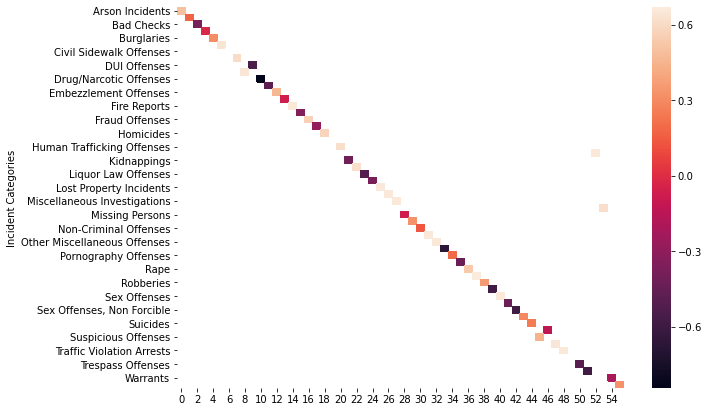

In [29]:
#Make a heatmap of the correlation coefficients between number of pit stops and each incident category
fig = plt.figure(figsize=(10,7))
sns.heatmap(bayview_correlations_wide_df)

In [30]:
#Make a dataframe that contains negative correlation coefficients 
bayview_neg_correlations_df = bayview_correlations_df[bayview_correlations_df['Correlation Coefficient'] < 0]
bayview_neg_correlations_df

,Incident Categories,Correlation Coefficient,P-value
2,Bad Checks,-0.383556,0.128559
3,Briberies,-0.016255,0.950625
9,DUI Offenses,-0.545646,0.023475
10,Drug/Narcotic Offenses,-0.841992,0.000022
11,Drunkenness Offenses,-0.477832,0.052390
13,Extortion Offenses,-0.063839,0.807686
15,Forgery/Counterfeiting Offenses,-0.341454,0.179807
17,Gambling Offenses,-0.275739,0.284058
21,Kidnappings,-0.399599,0.112030
23,Liquor Law Offenses,-0.506867,0.037847


In [31]:
#Make a dataframe that contains negative and statistically significant correlation coefficients
bayview_neg_statsig_correlations_df = bayview_neg_correlations_df[bayview_neg_correlations_df['P-value'] < 0.05]
bayview_neg_statsig_correlations_df

,Incident Categories,Correlation Coefficient,P-value
9,DUI Offenses,-0.545646,0.023475
10,Drug/Narcotic Offenses,-0.841992,0.000022
23,Liquor Law Offenses,-0.506867,0.037847
33,Other Offenses,-0.659086,0.004006
39,Secondary Codes,-0.586996,0.013241
42,"Sex Offenses, Non Forcible",-0.584308,0.013774
50,Trespass Offenses,-0.495327,0.043203
51,Vandalism Offenses,-0.577543,0.015189


In [32]:
#Pivot and transpose dataset so that a heatmap can be made
bavyiew_neg_statsig_correlations_wide = bayview_neg_statsig_correlations_df.pivot(columns = 'Incident Categories', 
                                                                                  values = 'Correlation Coefficient')
bavyiew_neg_statsig_correlations_wide = bavyiew_neg_statsig_correlations_wide.transpose()

<AxesSubplot:title={'center':'Statistically Significant Negative Correlations in Bayview Hunters Point'}, ylabel='Incident Categories'>

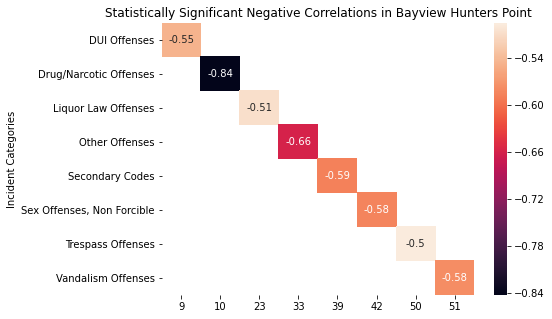

In [33]:
#Make a heatmap of the correlation coefficients of statistically significant negative correlations btwn pit stops and incident
#categories
fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.set_title('Statistically Significant Negative Correlations in Bayview Hunters Point')
sns.heatmap(bavyiew_neg_statsig_correlations_wide, annot = True)

#### Castro/Upper Market

In [34]:
#Make a dataframe that only includes data about Castro/Upper Market
castro_incidents_df = phase3_incident_counter_df[phase3_incident_counter_df['Neighborhood Name'] == 'Castro/Upper Market']
castro_incidents_df.head()

,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing,NUMBER OF PIT STOPS
1,2003,Castro/Upper Market,1,142,0,0,97,0,0,0,...,0,0,23,84,0,0,97,11,0,0
11,2004,Castro/Upper Market,0,122,1,1,89,0,0,0,...,0,0,15,94,0,0,83,11,0,0
21,2005,Castro/Upper Market,2,137,1,1,109,0,0,0,...,0,0,11,82,0,0,70,6,0,0
31,2006,Castro/Upper Market,1,142,1,1,131,0,0,0,...,0,0,10,80,0,0,65,9,0,0
41,2007,Castro/Upper Market,2,133,0,0,57,0,0,0,...,0,0,6,96,0,0,67,13,0,0


In [35]:
#Remove data from 2020
castro_incidents_df = castro_incidents_df[castro_incidents_df['Incident Year'] != 2020]

In [36]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
arson_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                      castro_incidents_df['ARSON'])
print('Correlation between Num of Pit Stops and Arson Incidents:', arson_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                         castro_incidents_df['ASSAULT'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
bad_checks_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                           castro_incidents_df['BAD CHECKS'])
print('Correlation between Num of Pit Stops and Num of Bad Checks:', bad_checks_pitstops_correlation)
bribery_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                        castro_incidents_df['BRIBERY'])
print('Correlation between Num of Pit Stops and Num of Briberies:', bribery_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                         castro_incidents_df['BURGLARY'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
case_closure_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                             castro_incidents_df['CASE CLOSURE'])
print('Correlation between Num of Pit Stops and Num of Case Closures:', case_closure_pitstops_correlation)
civil_sidewalks_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                                castro_incidents_df['CIVIL SIDEWALKS'])
print('Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses:', civil_sidewalks_pitstops_correlation)
courtesy_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                         castro_incidents_df['COURTESY REPORT'])
print('Correlation between Num of Pit Stops and Num of Courtesy Reports:', courtesy_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                         castro_incidents_df['DISORDERLY CONDUCT'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
dui_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                    castro_incidents_df['DRIVING UNDER THE INFLUENCE'])
print('Correlation between Num of Pit Stops and DUI Offenses:', dui_pitstops_correlation)
drug_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                     castro_incidents_df['DRUG/NARCOTIC'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
drunk_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                      castro_incidents_df['DRUNKENNESS'])
print('Correlation between Num of Pit Stops and Num of Drunkenness Offenses:', drunk_pitstops_correlation)
embez_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                      castro_incidents_df['EMBEZZLEMENT'])
print('Correlation between Num of Pit Stops and Num of Embezzlement Offenses:', embez_pitstops_correlation)
extortion_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                          castro_incidents_df['EXTORTION'])
print('Correlation between Num of Pit Stops and Num of Extortion Offenses:', extortion_pitstops_correlation)
fire_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                     castro_incidents_df['FIRE REPORT'])
print('Correlation between Num of Pit Stops and Num of Fire Reports:', fire_pitstops_correlation)
forgery_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                        castro_incidents_df['FORGERY/COUNTERFEITING'])
print('Correlation between Num of Pit Stops and Num of Forgery/Counterfeiting Offenses:', forgery_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                      castro_incidents_df['FRAUD'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
gambling_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                         castro_incidents_df['GAMBLING'])
print('Correlation between Num of Pit Stops and Num of Gambling Offenses:', gambling_pitstops_correlation)
homicide_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                         castro_incidents_df['HOMICIDE'])
print('Correlation between Num of Pit Stops and Num of Homicides:', homicide_pitstops_correlation)
humantrafficB_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                              castro_incidents_df['HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking B Offenses:', humantrafficB_pitstops_correlation)
humantraffic_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                             castro_incidents_df['HUMAN TRAFFICKING, COMMERCIAL SEX ACTS'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking Offenses:', humantraffic_pitstops_correlation)
kidnap_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                       castro_incidents_df['KIDNAPPING'])
print('Correlation between Num of Pit Stops and Num of Kidnappings:', kidnap_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                        castro_incidents_df['LARCENY/THEFT'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
liquor_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                       castro_incidents_df['LIQUOR LAWS'])
print('Correlation between Num of Pit Stops and Num of Liquor Law Offenses:', liquor_pitstops_correlation)
loiter_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                       castro_incidents_df['LOITERING'])
print('Correlation between Num of Pit Stops and Num of Loitering Offenses:', loiter_pitstops_correlation)
lostprop_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                         castro_incidents_df['LOST PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Lost Property Incidents:', lostprop_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                         castro_incidents_df['MALICIOUS MISCHIEF'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
misc_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                     castro_incidents_df['MISCELLANEOUS INVESTIGATION'])
print('Correlation between Num of Pit Stops and Num of Miscellaneous Investigations:', misc_pitstops_correlation)
missing_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                        castro_incidents_df['MISSING PERSON'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                         castro_incidents_df['MOTOR VEHICLE THEFT'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                        castro_incidents_df['NON-CRIMINAL'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
fam_and_child_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                              castro_incidents_df['OFFENCES AGAINST THE FAMILY AND CHILDREN'])
print('Correlation between Num of Pit Stops and Num of Offenses Against Family and Children:', fam_and_child_pitstops_correlation)
othermisc_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                          castro_incidents_df['OTHER MISCELLANEOUS'])
print('Correlation between Num of Pit Stops and Num of Other Miscellaneous Offenses:', othermisc_pitstops_correlation)
other_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                      castro_incidents_df['OTHER OFFENSES'])
print('Correlation between Num of Pit Stops and Num of Other Offenses:', other_pitstops_correlation)
pornography_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                            castro_incidents_df['PORNOGRAPHY/OBSCENE MAT'])
print('Correlation between Num of Pit Stops and Num of Pornography Offenses:', pornography_pitstops_correlation)
prost_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                      castro_incidents_df['PROSTITUTION'])
print('Correlation between Num of Pit Stops and Num of Prostitution Offenses:', prost_pitstops_correlation)
rape_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                     castro_incidents_df['RAPE'])
print('Correlation between Num of Pit Stops and Num of Rapes:', rape_pitstops_correlation)
recov_veh_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                          castro_incidents_df['RECOVERED VEHICLE'])
print('Correlation between Num of Pit Stops and Num of Recovered Vehicles:', recov_veh_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                        castro_incidents_df['ROBBERY'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sec_codes_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                          castro_incidents_df['SECONDARY CODES'])
print('Correlation between Num of Pit Stops and Num of Secondary Codes:', sec_codes_pitstops_correlation)
sex_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                    castro_incidents_df['SEX OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses:', sex_pitstops_correlation)                                                               
sex_forcible_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                             castro_incidents_df['SEX OFFENSES, FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Forcible:', sex_forcible_pitstops_correlation)
sex_nonforcible_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                                castro_incidents_df['SEX OFFENSES, NON FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Non Forcible:', sex_nonforcible_pitstops_correlation) 
stolen_prop_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                            castro_incidents_df['STOLEN PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Stolen Property Offenses:', stolen_prop_pitstops_correlation)                                          
suicide_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                        castro_incidents_df['SUICIDE'])
print('Correlation between Num of Pit Stops and Num of Suicides:', suicide_pitstops_correlation)  
susp_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                     castro_incidents_df['SUSPICIOUS'])
print('Correlation between Num of Pit Stops and Num of Suspicious Offenses:', susp_pitstops_correlation)                                                          
sus_occ_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                        castro_incidents_df['SUSPICIOUS OCC'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
traffic_col_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                            castro_incidents_df['TRAFFIC COLLISION'])
print('Correlation between Num of Pit Stops and Num of Traffic Collisions:', traffic_col_pitstops_correlation)
traffic_arrest_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                               castro_incidents_df['TRAFFIC VIOLATION ARREST'])
print('Correlation between Num of Pit Stops and Num of Traffic Violation Arrests:', traffic_arrest_pitstops_correlation)
trea_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                     castro_incidents_df['TREA'])
print('Correlation between Num of Pit Stops and Num of Trea Offenses:', trea_pitstops_correlation)
trespass_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                         castro_incidents_df['TRESPASS'])
print('Correlation between Num of Pit Stops and Num of Trespass Offenses:', trespass_pitstops_correlation)                                    
vand_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                     castro_incidents_df['VANDALISM'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
veh_impound_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                            castro_incidents_df['VEHICLE IMPOUNDED'])
print('Correlation between Num of Pit Stops and Num of Impounded Vehicles:', veh_impound_pitstops_correlation)
veh_misplace_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                             castro_incidents_df['VEHICLE MISPLACED'])
print('Correlation between Num of Pit Stops and Num of Misplaced Vehicles:', veh_misplace_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                        castro_incidents_df['WARRANTS'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(castro_incidents_df['NUMBER OF PIT STOPS'], 
                                       castro_incidents_df['WEAPONS OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)

Correlation between Num of Pit Stops and Arson Incidents: (0.3637674156288154, 0.15119148624936765)
Correlation between Num of Pit Stops and Num of Assaults: (0.559757294599023, 0.019460818886137852)
Correlation between Num of Pit Stops and Num of Bad Checks: (-0.33288977580706725, 0.19168522413199934)
Correlation between Num of Pit Stops and Num of Briberies: (0.07523547938632785, 0.7741259454298209)
Correlation between Num of Pit Stops and Num of Burglaries: (0.518000411190408, 0.033173583918003804)
Correlation between Num of Pit Stops and Num of Case Closures: (0.5361960667526344, 0.026502210493640897)
Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses: (0.5186350214898761, 0.03292119983830298)
Correlation between Num of Pit Stops and Num of Courtesy Reports: (0.38729833462074165, 0.1245604897662427)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.5448090880153966, 0.02373117958735449)
Correlation between Num of Pit Stops and DUI 

C:\Users\sdelp\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [37]:
#Make 3 lists: a list that contains the correlation coefficients between number of pit stops and each incident category,
#a list that contains the p-values for the correlation coefficients, and a list that contains the incident categories
castro_correlation_coefficients = [arson_pitstops_correlation[0], assaults_pitstops_correlation[0], 
                                   bad_checks_pitstops_correlation[0], bribery_pitstops_correlation[0], 
                                   burglary_pitstops_correlation[0], case_closure_pitstops_correlation[0], 
                                   civil_sidewalks_pitstops_correlation[0], courtesy_sidewalks_pitstops_correlation[0], 
                                   dis_cond_pitstops_correlation[0], dui_pitstops_correlation[0], drug_pitstops_correlation[0],
                                   drunk_pitstops_correlation[0], embez_pitstops_correlation[0], 
                                   extortion_pitstops_correlation[0], fire_pitstops_correlation[0], 
                                   forgery_pitstops_correlation[0], fraud_pitstops_correlation[0], 
                                   gambling_pitstops_correlation[0], homicide_pitstops_correlation[0], 
                                   humantrafficB_pitstops_correlation[0], humantraffic_pitstops_correlation[0], 
                                   kidnap_pitstops_correlation[0], larceny_pitstops_correlation[0], 
                                   liquor_pitstops_correlation[0], loiter_pitstops_correlation[0], 
                                   lostprop_pitstops_correlation[0], mischief_pitstops_correlation[0], 
                                   misc_pitstops_correlation[0], missing_pitstops_correlation[0], 
                                   mv_theft_pitstops_correlation[0], noncrim_pitstops_correlation[0], 
                                   fam_and_child_pitstops_correlation[0], othermisc_pitstops_correlation[0], 
                                   other_pitstops_correlation[0], pornography_pitstops_correlation[0], 
                                   prost_pitstops_correlation[0], rape_pitstops_correlation[0], 
                                   recov_veh_pitstops_correlation[0], robbery_pitstops_correlation[0], 
                                   sec_codes_pitstops_correlation[0], sex_pitstops_correlation[0],                                                             
                                   sex_forcible_pitstops_correlation[0], sex_nonforcible_pitstops_correlation[0], 
                                   stolen_prop_pitstops_correlation[0], suicide_pitstops_correlation[0], 
                                   susp_pitstops_correlation[0], sus_occ_pitstops_correlation[0], 
                                   traffic_col_pitstops_correlation[0], traffic_arrest_pitstops_correlation[0], 
                                   trea_pitstops_correlation[0], trespass_pitstops_correlation[0],                                  
                                   vand_pitstops_correlation[0], veh_impound_pitstops_correlation[0], 
                                   veh_misplace_pitstops_correlation[0], warrant_pitstops_correlation[0], 
                                   weapon_pitstops_correlation[0]]

castro_p_values = [arson_pitstops_correlation[1], assaults_pitstops_correlation[1], bad_checks_pitstops_correlation[1], 
                   bribery_pitstops_correlation[1], burglary_pitstops_correlation[1], case_closure_pitstops_correlation[1], 
                   civil_sidewalks_pitstops_correlation[1], courtesy_sidewalks_pitstops_correlation[1], 
                   dis_cond_pitstops_correlation[1], dui_pitstops_correlation[1], drug_pitstops_correlation[1],
                   drunk_pitstops_correlation[1], embez_pitstops_correlation[1], extortion_pitstops_correlation[1], 
                   fire_pitstops_correlation[1], forgery_pitstops_correlation[1], fraud_pitstops_correlation[1], 
                   gambling_pitstops_correlation[1], homicide_pitstops_correlation[1], humantrafficB_pitstops_correlation[1],
                   humantraffic_pitstops_correlation[1], kidnap_pitstops_correlation[1], larceny_pitstops_correlation[1], 
                   liquor_pitstops_correlation[1], loiter_pitstops_correlation[1], lostprop_pitstops_correlation[1], 
                   mischief_pitstops_correlation[1], misc_pitstops_correlation[1], missing_pitstops_correlation[1], 
                   mv_theft_pitstops_correlation[1], noncrim_pitstops_correlation[1], fam_and_child_pitstops_correlation[1],
                   othermisc_pitstops_correlation[1], other_pitstops_correlation[1], pornography_pitstops_correlation[1], 
                   prost_pitstops_correlation[1], rape_pitstops_correlation[1], recov_veh_pitstops_correlation[1], 
                   robbery_pitstops_correlation[1], sec_codes_pitstops_correlation[1], sex_pitstops_correlation[1],                                                             
                   sex_forcible_pitstops_correlation[1], sex_nonforcible_pitstops_correlation[1], 
                   stolen_prop_pitstops_correlation[1], suicide_pitstops_correlation[1], susp_pitstops_correlation[1],
                   sus_occ_pitstops_correlation[1], traffic_col_pitstops_correlation[1], 
                   traffic_arrest_pitstops_correlation[1], trea_pitstops_correlation[1], trespass_pitstops_correlation[1],                                  
                   vand_pitstops_correlation[1], veh_impound_pitstops_correlation[1], veh_misplace_pitstops_correlation[1],
                   warrant_pitstops_correlation[1], weapon_pitstops_correlation[1]]

castro_incident_categories = ['Arson Incidents', 'Assaults', 'Bad Checks', 'Briberies', 'Burglaries', 'Case Closures',
                              'Civil Sidewalk Offenses', 'Courtesy Reports', 'Disorderly Conduct Offenses', 'DUI Offenses', 
                              'Drug/Narcotic Offenses', 'Drunkenness Offenses', 'Embezzlement Offenses', 'Extortion Offenses',
                              'Fire Reports', 'Forgery/Counterfeiting Offenses', 'Fraud Offenses', 'Gambling Offenses', 
                              'Homicides', 'Human Trafficking B Offenses', 'Human Trafficking Offenses', 'Kidnappings',
                              'Larceny/Theft Offenses', 'Liquor Law Offenses', 'Loitering Offenses', 'Lost Property Incidents', 
                              'Malicious Mischief Offenses', 'Miscellaneous Investigations', 'Missing Persons', 
                              'Motor Vehicle Thefts', 'Non-Criminal Offenses', 'Offenses Against Family and Children', 
                              'Other Miscellaneous Offenses', 'Other Offenses', 'Pornography Offenses', 
                              'Prostitution Offenses', 'Rape', 'Recovered Vehicles', 'Robberies', 'Secondary Codes', 
                              'Sex Offenses', 'Sex Offenses, Forcible', 'Sex Offenses, Non Forcible', 'Stolen Property', 
                              'Suicides', 'Suspicious Offenses', 'Suspicious Occ Offenses', 'Traffic Collisions', 
                              'Traffic Violation Arrests', 'Trea Offenses', 'Trespass Offenses', 'Vandalism Offenses', 
                              'Impounded Vehicles', 'Misplaced Vehicles', 'Warrants', 'Weapons Offenses']

In [38]:
#Make a dataframe from the above lists
castro_correlations_df = pd.DataFrame(list(zip(castro_incident_categories, castro_correlation_coefficients, castro_p_values)), 
                                      columns = ['Incident Categories', 'Correlation Coefficient', 'P-value'])
castro_correlations_df

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.363767,0.151191
1,Assaults,0.559757,0.019461
2,Bad Checks,-0.332890,0.191685
3,Briberies,0.075235,0.774126
4,Burglaries,0.518000,0.033174
5,Case Closures,0.536196,0.026502
6,Civil Sidewalk Offenses,0.518635,0.032921
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.544809,0.023731
9,DUI Offenses,-0.190610,0.463679


In [39]:
#Drop all null values
castro_correlations_df.dropna(axis = 0)

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.363767,0.151191
1,Assaults,0.559757,0.019461
2,Bad Checks,-0.332890,0.191685
3,Briberies,0.075235,0.774126
4,Burglaries,0.518000,0.033174
5,Case Closures,0.536196,0.026502
6,Civil Sidewalk Offenses,0.518635,0.032921
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.544809,0.023731
9,DUI Offenses,-0.190610,0.463679


In [40]:
#Make a dataframe that includes only negative correlation coefficients
castro_neg_correlations_df = castro_correlations_df[castro_correlations_df['Correlation Coefficient'] <= 0]
castro_neg_correlations_df

,Incident Categories,Correlation Coefficient,P-value
2,Bad Checks,-0.332890,0.191685
9,DUI Offenses,-0.190610,0.463679
10,Drug/Narcotic Offenses,-0.282783,0.271430
11,Drunkenness Offenses,-0.300986,0.240418
13,Extortion Offenses,-0.436436,0.079865
15,Forgery/Counterfeiting Offenses,-0.531751,0.028027
17,Gambling Offenses,-0.161374,0.536075
21,Kidnappings,-0.061800,0.813725
23,Liquor Law Offenses,-0.031427,0.904693
24,Loitering Offenses,-0.443073,0.074874


In [41]:
#Make a dataframe that includes only statistically significant negative correlation coefficients
castro_neg_statsig_correlations_df = castro_neg_correlations_df[castro_neg_correlations_df['P-value'] < 0.05]
castro_neg_statsig_correlations_df

,Incident Categories,Correlation Coefficient,P-value
15,Forgery/Counterfeiting Offenses,-0.531751,0.028027


In [42]:
#Pivot and tranpose dataframe so that a heatmap can be made
castro_neg_statsig_correlations_wide = castro_neg_statsig_correlations_df.pivot(columns = 'Incident Categories', 
                                                                                values = 'Correlation Coefficient')
castro_neg_statsig_correlations_wide = castro_neg_statsig_correlations_wide.transpose()

<AxesSubplot:title={'center':'Statistically Significant Negative Correlations in Castro/Upper Market'}, ylabel='Incident Categories'>

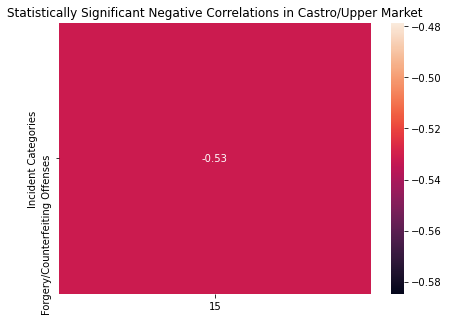

In [43]:
#Make a heatmap of the statistically significant negative correlations between incident category and
#pit stops
fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.set_title('Statistically Significant Negative Correlations in Castro/Upper Market')
sns.heatmap(castro_neg_statsig_correlations_wide, annot = True)

#### Financial District/South Beach

In [44]:
#Make a dataframe that only includes Financial District/South Beach
fd_sb_incidents_df = phase3_incident_counter_df[phase3_incident_counter_df['Neighborhood Name'] == 'Financial District/South Beach']
fd_sb_incidents_df.head()

,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing,NUMBER OF PIT STOPS
2,2003,Financial District/South Beach,2,266,10,0,219,0,0,0,...,0,0,75,122,0,0,181,12,0,0
12,2004,Financial District/South Beach,1,222,1,0,235,0,0,0,...,0,0,48,118,0,0,159,16,0,0
22,2005,Financial District/South Beach,1,223,6,0,246,0,0,0,...,0,0,50,144,0,0,116,14,0,0
32,2006,Financial District/South Beach,2,229,4,0,265,0,0,0,...,0,0,45,139,0,0,83,16,0,0
42,2007,Financial District/South Beach,4,237,4,1,238,0,0,0,...,0,0,50,133,0,0,92,12,0,0


In [45]:
#Remove data from 2020
fd_sb_incidents_df = fd_sb_incidents_df[fd_sb_incidents_df['Incident Year'] != 2020]

In [46]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
arson_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                      fd_sb_incidents_df['ARSON'])
print('Correlation between Num of Pit Stops and Arson Incidents:', arson_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                         fd_sb_incidents_df['ASSAULT'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
bad_checks_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                           fd_sb_incidents_df['BAD CHECKS'])
print('Correlation between Num of Pit Stops and Num of Bad Checks:', bad_checks_pitstops_correlation)
bribery_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                        fd_sb_incidents_df['BRIBERY'])
print('Correlation between Num of Pit Stops and Num of Briberies:', bribery_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                         fd_sb_incidents_df['BURGLARY'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
case_closure_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                             fd_sb_incidents_df['CASE CLOSURE'])
print('Correlation between Num of Pit Stops and Num of Case Closures:', case_closure_pitstops_correlation)
civil_sidewalks_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                                fd_sb_incidents_df['CIVIL SIDEWALKS'])
print('Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses:', civil_sidewalks_pitstops_correlation)
courtesy_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                         fd_sb_incidents_df['COURTESY REPORT'])
print('Correlation between Num of Pit Stops and Num of Courtesy Reports:', courtesy_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                         fd_sb_incidents_df['DISORDERLY CONDUCT'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
dui_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                    fd_sb_incidents_df['DRIVING UNDER THE INFLUENCE'])
print('Correlation between Num of Pit Stops and DUI Offenses:', dui_pitstops_correlation)
drug_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                     fd_sb_incidents_df['DRUG/NARCOTIC'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
drunk_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                      fd_sb_incidents_df['DRUNKENNESS'])
print('Correlation between Num of Pit Stops and Num of Drunkenness Offenses:', drunk_pitstops_correlation)
embez_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                      fd_sb_incidents_df['EMBEZZLEMENT'])
print('Correlation between Num of Pit Stops and Num of Embezzlement Offenses:', embez_pitstops_correlation)
extortion_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                          fd_sb_incidents_df['EXTORTION'])
print('Correlation between Num of Pit Stops and Num of Extortion Offenses:', extortion_pitstops_correlation)
fire_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                     fd_sb_incidents_df['FIRE REPORT'])
print('Correlation between Num of Pit Stops and Num of Fire Reports:', fire_pitstops_correlation)
forgery_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                        fd_sb_incidents_df['FORGERY/COUNTERFEITING'])
print('Correlation between Num of Pit Stops and Num of Forgery/Counterfeiting Offenses:', forgery_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                      fd_sb_incidents_df['FRAUD'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
gambling_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                         fd_sb_incidents_df['GAMBLING'])
print('Correlation between Num of Pit Stops and Num of Gambling Offenses:', gambling_pitstops_correlation)
homicide_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                         fd_sb_incidents_df['HOMICIDE'])
print('Correlation between Num of Pit Stops and Num of Homicides:', homicide_pitstops_correlation)
humantrafficB_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                              fd_sb_incidents_df['HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking B Offenses:', humantrafficB_pitstops_correlation)
humantraffic_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                             fd_sb_incidents_df['HUMAN TRAFFICKING, COMMERCIAL SEX ACTS'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking Offenses:', humantraffic_pitstops_correlation)
kidnap_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                       fd_sb_incidents_df['KIDNAPPING'])
print('Correlation between Num of Pit Stops and Num of Kidnappings:', kidnap_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                        fd_sb_incidents_df['LARCENY/THEFT'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
liquor_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                       fd_sb_incidents_df['LIQUOR LAWS'])
print('Correlation between Num of Pit Stops and Num of Liquor Law Offenses:', liquor_pitstops_correlation)
loiter_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                       fd_sb_incidents_df['LOITERING'])
print('Correlation between Num of Pit Stops and Num of Loitering Offenses:', loiter_pitstops_correlation)
lostprop_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                         fd_sb_incidents_df['LOST PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Lost Property Incidents:', lostprop_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                         fd_sb_incidents_df['MALICIOUS MISCHIEF'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
misc_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                     fd_sb_incidents_df['MISCELLANEOUS INVESTIGATION'])
print('Correlation between Num of Pit Stops and Num of Miscellaneous Investigations:', misc_pitstops_correlation)
missing_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                        fd_sb_incidents_df['MISSING PERSON'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                         fd_sb_incidents_df['MOTOR VEHICLE THEFT'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                        fd_sb_incidents_df['NON-CRIMINAL'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
fam_and_child_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                              fd_sb_incidents_df['OFFENCES AGAINST THE FAMILY AND CHILDREN'])
print('Correlation between Num of Pit Stops and Num of Offenses Against Family and Children:', fam_and_child_pitstops_correlation)
othermisc_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                          fd_sb_incidents_df['OTHER MISCELLANEOUS'])
print('Correlation between Num of Pit Stops and Num of Other Miscellaneous Offenses:', othermisc_pitstops_correlation)
other_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                      fd_sb_incidents_df['OTHER OFFENSES'])
print('Correlation between Num of Pit Stops and Num of Other Offenses:', other_pitstops_correlation)
pornography_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                            fd_sb_incidents_df['PORNOGRAPHY/OBSCENE MAT'])
print('Correlation between Num of Pit Stops and Num of Pornography Offenses:', pornography_pitstops_correlation)
prost_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                      fd_sb_incidents_df['PROSTITUTION'])
print('Correlation between Num of Pit Stops and Num of Prostitution Offenses:', prost_pitstops_correlation)
rape_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                     fd_sb_incidents_df['RAPE'])
print('Correlation between Num of Pit Stops and Num of Rapes:', rape_pitstops_correlation)
recov_veh_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                          fd_sb_incidents_df['RECOVERED VEHICLE'])
print('Correlation between Num of Pit Stops and Num of Recovered Vehicles:', recov_veh_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                        fd_sb_incidents_df['ROBBERY'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sec_codes_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                          fd_sb_incidents_df['SECONDARY CODES'])
print('Correlation between Num of Pit Stops and Num of Secondary Codes:', sec_codes_pitstops_correlation)
sex_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                    fd_sb_incidents_df['SEX OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses:', sex_pitstops_correlation)                                                               
sex_forcible_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                             fd_sb_incidents_df['SEX OFFENSES, FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Forcible:', sex_forcible_pitstops_correlation)
sex_nonforcible_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                                fd_sb_incidents_df['SEX OFFENSES, NON FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Non Forcible:', sex_nonforcible_pitstops_correlation) 
stolen_prop_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                            fd_sb_incidents_df['STOLEN PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Stolen Property Offenses:', stolen_prop_pitstops_correlation)                                          
suicide_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                        fd_sb_incidents_df['SUICIDE'])
print('Correlation between Num of Pit Stops and Num of Suicides:', suicide_pitstops_correlation)  
susp_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                     fd_sb_incidents_df['SUSPICIOUS'])
print('Correlation between Num of Pit Stops and Num of Suspicious Offenses:', susp_pitstops_correlation)                                                          
sus_occ_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                        fd_sb_incidents_df['SUSPICIOUS OCC'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
traffic_col_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                            fd_sb_incidents_df['TRAFFIC COLLISION'])
print('Correlation between Num of Pit Stops and Num of Traffic Collisions:', traffic_col_pitstops_correlation)
traffic_arrest_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                               fd_sb_incidents_df['TRAFFIC VIOLATION ARREST'])
print('Correlation between Num of Pit Stops and Num of Traffic Violation Arrests:', traffic_arrest_pitstops_correlation)
trea_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                     fd_sb_incidents_df['TREA'])
print('Correlation between Num of Pit Stops and Num of Trea Offenses:', trea_pitstops_correlation)
trespass_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                         fd_sb_incidents_df['TRESPASS'])
print('Correlation between Num of Pit Stops and Num of Trespass Offenses:', trespass_pitstops_correlation)                                    
vand_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                     fd_sb_incidents_df['VANDALISM'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
veh_impound_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                            fd_sb_incidents_df['VEHICLE IMPOUNDED'])
print('Correlation between Num of Pit Stops and Num of Impounded Vehicles:', veh_impound_pitstops_correlation)
veh_misplace_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                             fd_sb_incidents_df['VEHICLE MISPLACED'])
print('Correlation between Num of Pit Stops and Num of Misplaced Vehicles:', veh_misplace_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                        fd_sb_incidents_df['WARRANTS'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(fd_sb_incidents_df['NUMBER OF PIT STOPS'], 
                                       fd_sb_incidents_df['WEAPONS OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)

Correlation between Num of Pit Stops and Arson Incidents: (0.58004853144209, 0.014652073767032344)
Correlation between Num of Pit Stops and Num of Assaults: (0.6038066872415616, 0.010268120966994925)
Correlation between Num of Pit Stops and Num of Bad Checks: (-0.2703202488743696, 0.29401187849484295)
Correlation between Num of Pit Stops and Num of Briberies: (-0.12038585308576923, 0.6453469927999662)
Correlation between Num of Pit Stops and Num of Burglaries: (0.48334366294712083, 0.04935122300109097)
Correlation between Num of Pit Stops and Num of Case Closures: (0.5688505003943671, 0.017173276578086604)
Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses: (0.888985968748427, 1.8333925201197616e-06)
Correlation between Num of Pit Stops and Num of Courtesy Reports: (0.5383054219239549, 0.025801569640798244)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.5419717355604526, 0.024617949867224844)
Correlation between Num of Pit Stops and

C:\Users\sdelp\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [47]:
#Make 3 lists: a list that contains the correlation coefficients between number of pit stops and each incident category,
#a list that contains the p-values for the correlation coefficients, and a list that contains the incident categories
fd_sb_correlation_coefficients = [arson_pitstops_correlation[0], assaults_pitstops_correlation[0], 
                                  bad_checks_pitstops_correlation[0], bribery_pitstops_correlation[0], 
                                  burglary_pitstops_correlation[0], case_closure_pitstops_correlation[0], 
                                  civil_sidewalks_pitstops_correlation[0], courtesy_sidewalks_pitstops_correlation[0], 
                                  dis_cond_pitstops_correlation[0], dui_pitstops_correlation[0], drug_pitstops_correlation[0],
                                  drunk_pitstops_correlation[0], embez_pitstops_correlation[0], 
                                  extortion_pitstops_correlation[0], fire_pitstops_correlation[0], 
                                  forgery_pitstops_correlation[0], fraud_pitstops_correlation[0], 
                                  gambling_pitstops_correlation[0], homicide_pitstops_correlation[0], 
                                  humantrafficB_pitstops_correlation[0], humantraffic_pitstops_correlation[0], 
                                  kidnap_pitstops_correlation[0], larceny_pitstops_correlation[0], 
                                  liquor_pitstops_correlation[0], loiter_pitstops_correlation[0], 
                                  lostprop_pitstops_correlation[0], mischief_pitstops_correlation[0], 
                                  misc_pitstops_correlation[0], missing_pitstops_correlation[0], 
                                  mv_theft_pitstops_correlation[0], noncrim_pitstops_correlation[0], 
                                  fam_and_child_pitstops_correlation[0], othermisc_pitstops_correlation[0], 
                                  other_pitstops_correlation[0], pornography_pitstops_correlation[0], 
                                  prost_pitstops_correlation[0], rape_pitstops_correlation[0], 
                                  recov_veh_pitstops_correlation[0], robbery_pitstops_correlation[0], 
                                  sec_codes_pitstops_correlation[0], sex_pitstops_correlation[0],                                                             
                                  sex_forcible_pitstops_correlation[0], sex_nonforcible_pitstops_correlation[0], 
                                  stolen_prop_pitstops_correlation[0], suicide_pitstops_correlation[0], 
                                  susp_pitstops_correlation[0], sus_occ_pitstops_correlation[0], 
                                  traffic_col_pitstops_correlation[0], traffic_arrest_pitstops_correlation[0], 
                                  trea_pitstops_correlation[0], trespass_pitstops_correlation[0],                                  
                                  vand_pitstops_correlation[0], veh_impound_pitstops_correlation[0], 
                                  veh_misplace_pitstops_correlation[0], warrant_pitstops_correlation[0], 
                                  weapon_pitstops_correlation[0]]

fd_sb_p_values = [arson_pitstops_correlation[1], assaults_pitstops_correlation[1], bad_checks_pitstops_correlation[1], 
                  bribery_pitstops_correlation[1], burglary_pitstops_correlation[1], case_closure_pitstops_correlation[1], 
                  civil_sidewalks_pitstops_correlation[1], courtesy_sidewalks_pitstops_correlation[1], 
                  dis_cond_pitstops_correlation[1], dui_pitstops_correlation[1], drug_pitstops_correlation[1],
                  drunk_pitstops_correlation[1], embez_pitstops_correlation[1], extortion_pitstops_correlation[1], 
                  fire_pitstops_correlation[1], forgery_pitstops_correlation[1], fraud_pitstops_correlation[1], 
                  gambling_pitstops_correlation[1], homicide_pitstops_correlation[1], humantrafficB_pitstops_correlation[1],
                  humantraffic_pitstops_correlation[1], kidnap_pitstops_correlation[1], larceny_pitstops_correlation[1], 
                  liquor_pitstops_correlation[1], loiter_pitstops_correlation[1], lostprop_pitstops_correlation[1], 
                  mischief_pitstops_correlation[1], misc_pitstops_correlation[1], missing_pitstops_correlation[1], 
                  mv_theft_pitstops_correlation[1], noncrim_pitstops_correlation[1], fam_and_child_pitstops_correlation[1],
                  othermisc_pitstops_correlation[1], other_pitstops_correlation[1], pornography_pitstops_correlation[1], 
                  prost_pitstops_correlation[1], rape_pitstops_correlation[1], recov_veh_pitstops_correlation[1], 
                  robbery_pitstops_correlation[1], sec_codes_pitstops_correlation[1], sex_pitstops_correlation[1],                                                             
                  sex_forcible_pitstops_correlation[1], sex_nonforcible_pitstops_correlation[1], 
                  stolen_prop_pitstops_correlation[1], suicide_pitstops_correlation[1], susp_pitstops_correlation[1],
                  sus_occ_pitstops_correlation[1], traffic_col_pitstops_correlation[1], 
                  traffic_arrest_pitstops_correlation[1], trea_pitstops_correlation[1], trespass_pitstops_correlation[1],                                  
                  vand_pitstops_correlation[1], veh_impound_pitstops_correlation[1], veh_misplace_pitstops_correlation[1],
                  warrant_pitstops_correlation[1], weapon_pitstops_correlation[1]]

fd_sb_incident_categories = ['Arson Incidents', 'Assaults', 'Bad Checks', 'Briberies', 'Burglaries', 'Case Closures',
                             'Civil Sidewalk Offenses', 'Courtesy Reports', 'Disorderly Conduct Offenses', 'DUI Offenses', 
                             'Drug/Narcotic Offenses', 'Drunkenness Offenses', 'Embezzlement Offenses', 'Extortion Offenses',
                             'Fire Reports', 'Forgery/Counterfeiting Offenses', 'Fraud Offenses', 'Gambling Offenses', 
                             'Homicides', 'Human Trafficking B Offenses', 'Human Trafficking Offenses', 'Kidnappings',
                             'Larceny/Theft Offenses', 'Liquor Law Offenses', 'Loitering Offenses', 'Lost Property Incidents', 
                             'Malicious Mischief Offenses', 'Miscellaneous Investigations', 'Missing Persons', 
                             'Motor Vehicle Thefts', 'Non-Criminal Offenses', 'Offenses Against Family and Children', 
                             'Other Miscellaneous Offenses', 'Other Offenses', 'Pornography Offenses', 
                             'Prostitution Offenses', 'Rape', 'Recovered Vehicles', 'Robberies', 'Secondary Codes', 
                             'Sex Offenses', 'Sex Offenses, Forcible', 'Sex Offenses, Non Forcible', 'Stolen Property', 
                             'Suicides', 'Suspicious Offenses', 'Suspicious Occ Offenses', 'Traffic Collisions', 
                             'Traffic Violation Arrests', 'Trea Offenses', 'Trespass Offenses', 'Vandalism Offenses', 
                             'Impounded Vehicles', 'Misplaced Vehicles', 'Warrants', 'Weapons Offenses']

In [48]:
#Make a dataframe that above lists
fd_sb_correlations_df = pd.DataFrame(list(zip(fd_sb_incident_categories, fd_sb_correlation_coefficients, fd_sb_p_values)), 
                                     columns = ['Incident Categories', 'Correlation Coefficient', 'P-value'])
fd_sb_correlations_df

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.580049,1.465207e-02
1,Assaults,0.603807,1.026812e-02
2,Bad Checks,-0.270320,2.940119e-01
3,Briberies,-0.120386,6.453470e-01
4,Burglaries,0.483344,4.935122e-02
5,Case Closures,0.568851,1.717328e-02
6,Civil Sidewalk Offenses,0.888986,1.833393e-06
7,Courtesy Reports,0.606529,9.841257e-03
8,Disorderly Conduct Offenses,0.541972,2.461795e-02
9,DUI Offenses,-0.303668,2.360469e-01


In [49]:
#Drop null values
fd_sb_correlations_df.dropna(axis = 0)

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.580049,1.465207e-02
1,Assaults,0.603807,1.026812e-02
2,Bad Checks,-0.270320,2.940119e-01
3,Briberies,-0.120386,6.453470e-01
4,Burglaries,0.483344,4.935122e-02
5,Case Closures,0.568851,1.717328e-02
6,Civil Sidewalk Offenses,0.888986,1.833393e-06
7,Courtesy Reports,0.606529,9.841257e-03
8,Disorderly Conduct Offenses,0.541972,2.461795e-02
9,DUI Offenses,-0.303668,2.360469e-01


In [50]:
#Make a dataframe that includes only negative correlation coefficients
fd_sb_neg_correlations_df = fd_sb_correlations_df[fd_sb_correlations_df['Correlation Coefficient'] <= 0]
fd_sb_neg_correlations_df

,Incident Categories,Correlation Coefficient,P-value
2,Bad Checks,-0.270320,0.294012
3,Briberies,-0.120386,0.645347
9,DUI Offenses,-0.303668,0.236047
11,Drunkenness Offenses,-0.400404,0.111243
13,Extortion Offenses,-0.265165,0.303673
17,Gambling Offenses,-0.107833,0.680380
21,Kidnappings,-0.292120,0.255229
23,Liquor Law Offenses,-0.374293,0.138839
24,Loitering Offenses,-0.168551,0.517844
33,Other Offenses,-0.310405,0.225289


In [51]:
#Make a dataframe that includes only statistically significant negative correlations
fd_sb_neg_statsig_correlations_df = fd_sb_neg_correlations_df[fd_sb_neg_correlations_df['P-value'] < 0.05]
fd_sb_neg_statsig_correlations_df

,Incident Categories,Correlation Coefficient,P-value


Since there are no incident categories that are statistically significantly and negatively correlated with pit stops, a heatmap does not need to be made.

#### Golden Gate Park

In [52]:
#Make a dataset that only includes data about Golden Gate Park
ggpark_incidents_df = phase3_incident_counter_df[phase3_incident_counter_df['Neighborhood Name'] == 'Golden Gate Park']
ggpark_incidents_df.head()

,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing,NUMBER OF PIT STOPS
3,2003,Golden Gate Park,1,38,0,0,1,0,0,0,...,0,0,0,19,0,0,48,6,0,0
13,2004,Golden Gate Park,3,36,0,0,6,0,0,0,...,0,0,1,11,0,0,48,7,0,0
23,2005,Golden Gate Park,2,21,0,0,11,0,0,0,...,0,0,2,19,0,0,35,3,0,0
33,2006,Golden Gate Park,1,24,0,1,5,0,0,0,...,0,0,1,13,0,0,36,4,0,0
43,2007,Golden Gate Park,1,25,0,0,2,0,0,0,...,0,0,3,18,0,0,58,7,0,0


In [53]:
#Remove data from 2020
ggpark_incidents_df = ggpark_incidents_df[ggpark_incidents_df['Incident Year'] != 2020]

In [54]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
arson_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                      ggpark_incidents_df['ARSON'])
print('Correlation between Num of Pit Stops and Arson Incidents:', arson_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                         ggpark_incidents_df['ASSAULT'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
bad_checks_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                           ggpark_incidents_df['BAD CHECKS'])
print('Correlation between Num of Pit Stops and Num of Bad Checks:', bad_checks_pitstops_correlation)
bribery_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                        ggpark_incidents_df['BRIBERY'])
print('Correlation between Num of Pit Stops and Num of Briberies:', bribery_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                         ggpark_incidents_df['BURGLARY'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
case_closure_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                             ggpark_incidents_df['CASE CLOSURE'])
print('Correlation between Num of Pit Stops and Num of Case Closures:', case_closure_pitstops_correlation)
civil_sidewalks_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                                ggpark_incidents_df['CIVIL SIDEWALKS'])
print('Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses:', civil_sidewalks_pitstops_correlation)
courtesy_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                         ggpark_incidents_df['COURTESY REPORT'])
print('Correlation between Num of Pit Stops and Num of Courtesy Reports:', courtesy_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                         ggpark_incidents_df['DISORDERLY CONDUCT'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
dui_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                    ggpark_incidents_df['DRIVING UNDER THE INFLUENCE'])
print('Correlation between Num of Pit Stops and DUI Offenses:', dui_pitstops_correlation)
drug_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                     ggpark_incidents_df['DRUG/NARCOTIC'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
drunk_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                      ggpark_incidents_df['DRUNKENNESS'])
print('Correlation between Num of Pit Stops and Num of Drunkenness Offenses:', drunk_pitstops_correlation)
embez_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                      ggpark_incidents_df['EMBEZZLEMENT'])
print('Correlation between Num of Pit Stops and Num of Embezzlement Offenses:', embez_pitstops_correlation)
extortion_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                          ggpark_incidents_df['EXTORTION'])
print('Correlation between Num of Pit Stops and Num of Extortion Offenses:', extortion_pitstops_correlation)
fire_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                     ggpark_incidents_df['FIRE REPORT'])
print('Correlation between Num of Pit Stops and Num of Fire Reports:', fire_pitstops_correlation)
forgery_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                        ggpark_incidents_df['FORGERY/COUNTERFEITING'])
print('Correlation between Num of Pit Stops and Num of Forgery/Counterfeiting Offenses:', forgery_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                      ggpark_incidents_df['FRAUD'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
gambling_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                         ggpark_incidents_df['GAMBLING'])
print('Correlation between Num of Pit Stops and Num of Gambling Offenses:', gambling_pitstops_correlation)
homicide_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                         ggpark_incidents_df['HOMICIDE'])
print('Correlation between Num of Pit Stops and Num of Homicides:', homicide_pitstops_correlation)
humantrafficB_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                              ggpark_incidents_df['HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking B Offenses:', humantrafficB_pitstops_correlation)
humantraffic_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                             ggpark_incidents_df['HUMAN TRAFFICKING, COMMERCIAL SEX ACTS'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking Offenses:', humantraffic_pitstops_correlation)
kidnap_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                       ggpark_incidents_df['KIDNAPPING'])
print('Correlation between Num of Pit Stops and Num of Kidnappings:', kidnap_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                        ggpark_incidents_df['LARCENY/THEFT'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
liquor_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                       ggpark_incidents_df['LIQUOR LAWS'])
print('Correlation between Num of Pit Stops and Num of Liquor Law Offenses:', liquor_pitstops_correlation)
loiter_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                       ggpark_incidents_df['LOITERING'])
print('Correlation between Num of Pit Stops and Num of Loitering Offenses:', loiter_pitstops_correlation)
lostprop_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                         ggpark_incidents_df['LOST PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Lost Property Incidents:', lostprop_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                         ggpark_incidents_df['MALICIOUS MISCHIEF'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
misc_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                     ggpark_incidents_df['MISCELLANEOUS INVESTIGATION'])
print('Correlation between Num of Pit Stops and Num of Miscellaneous Investigations:', misc_pitstops_correlation)
missing_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                        ggpark_incidents_df['MISSING PERSON'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                         ggpark_incidents_df['MOTOR VEHICLE THEFT'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                        ggpark_incidents_df['NON-CRIMINAL'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
fam_and_child_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                              ggpark_incidents_df['OFFENCES AGAINST THE FAMILY AND CHILDREN'])
print('Correlation between Num of Pit Stops and Num of Offenses Against Family and Children:', fam_and_child_pitstops_correlation)
othermisc_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                          ggpark_incidents_df['OTHER MISCELLANEOUS'])
print('Correlation between Num of Pit Stops and Num of Other Miscellaneous Offenses:', othermisc_pitstops_correlation)
other_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                      ggpark_incidents_df['OTHER OFFENSES'])
print('Correlation between Num of Pit Stops and Num of Other Offenses:', other_pitstops_correlation)
pornography_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                            ggpark_incidents_df['PORNOGRAPHY/OBSCENE MAT'])
print('Correlation between Num of Pit Stops and Num of Pornography Offenses:', pornography_pitstops_correlation)
prost_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                      ggpark_incidents_df['PROSTITUTION'])
print('Correlation between Num of Pit Stops and Num of Prostitution Offenses:', prost_pitstops_correlation)
rape_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                     ggpark_incidents_df['RAPE'])
print('Correlation between Num of Pit Stops and Num of Rapes:', rape_pitstops_correlation)
recov_veh_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                          ggpark_incidents_df['RECOVERED VEHICLE'])
print('Correlation between Num of Pit Stops and Num of Recovered Vehicles:', recov_veh_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                        ggpark_incidents_df['ROBBERY'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sec_codes_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                          ggpark_incidents_df['SECONDARY CODES'])
print('Correlation between Num of Pit Stops and Num of Secondary Codes:', sec_codes_pitstops_correlation)
sex_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                    ggpark_incidents_df['SEX OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses:', sex_pitstops_correlation)                                                               
sex_forcible_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                             ggpark_incidents_df['SEX OFFENSES, FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Forcible:', sex_forcible_pitstops_correlation)
sex_nonforcible_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                                ggpark_incidents_df['SEX OFFENSES, NON FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Non Forcible:', sex_nonforcible_pitstops_correlation) 
stolen_prop_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                            ggpark_incidents_df['STOLEN PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Stolen Property Offenses:', stolen_prop_pitstops_correlation)                                          
suicide_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                        ggpark_incidents_df['SUICIDE'])
print('Correlation between Num of Pit Stops and Num of Suicides:', suicide_pitstops_correlation)  
susp_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                     ggpark_incidents_df['SUSPICIOUS'])
print('Correlation between Num of Pit Stops and Num of Suspicious Offenses:', susp_pitstops_correlation)                                                          
sus_occ_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                        ggpark_incidents_df['SUSPICIOUS OCC'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
traffic_col_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                            ggpark_incidents_df['TRAFFIC COLLISION'])
print('Correlation between Num of Pit Stops and Num of Traffic Collisions:', traffic_col_pitstops_correlation)
traffic_arrest_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                               ggpark_incidents_df['TRAFFIC VIOLATION ARREST'])
print('Correlation between Num of Pit Stops and Num of Traffic Violation Arrests:', traffic_arrest_pitstops_correlation)
trea_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                     ggpark_incidents_df['TREA'])
print('Correlation between Num of Pit Stops and Num of Trea Offenses:', trea_pitstops_correlation)
trespass_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                         ggpark_incidents_df['TRESPASS'])
print('Correlation between Num of Pit Stops and Num of Trespass Offenses:', trespass_pitstops_correlation)                                    
vand_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                     ggpark_incidents_df['VANDALISM'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
veh_impound_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                            ggpark_incidents_df['VEHICLE IMPOUNDED'])
print('Correlation between Num of Pit Stops and Num of Impounded Vehicles:', veh_impound_pitstops_correlation)
veh_misplace_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                             ggpark_incidents_df['VEHICLE MISPLACED'])
print('Correlation between Num of Pit Stops and Num of Misplaced Vehicles:', veh_misplace_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                        ggpark_incidents_df['WARRANTS'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(ggpark_incidents_df['NUMBER OF PIT STOPS'], 
                                       ggpark_incidents_df['WEAPONS OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)

Correlation between Num of Pit Stops and Arson Incidents: (0.2612897815962313, 0.3110577061292131)
Correlation between Num of Pit Stops and Num of Assaults: (0.6132971278657426, 0.00884109011186352)
Correlation between Num of Pit Stops and Num of Bad Checks: (nan, nan)
Correlation between Num of Pit Stops and Num of Briberies: (-0.1289276557823492, 0.6219005271168223)
Correlation between Num of Pit Stops and Num of Burglaries: (0.7207263169571259, 0.0010981482269380165)
Correlation between Num of Pit Stops and Num of Case Closures: (0.8276879162580655, 4.1144659635938744e-05)
Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses: (0.40289892431984126, 0.10882625575007454)
Correlation between Num of Pit Stops and Num of Courtesy Reports: (0.7076670262481946, 0.0014830581269313515)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.6278536590561549, 0.006964136272731653)
Correlation between Num of Pit Stops and DUI Offenses: (-0.324259946215

C:\Users\sdelp\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [55]:
#Make 3 lists: a list that contains the correlation coefficients between number of pit stops and each incident category,
#a list that contains the p-values for the correlation coefficients, and a list that contains the incident categories
ggpark_correlation_coefficients = [arson_pitstops_correlation[0], assaults_pitstops_correlation[0], 
                                   bad_checks_pitstops_correlation[0], bribery_pitstops_correlation[0], 
                                   burglary_pitstops_correlation[0], case_closure_pitstops_correlation[0], 
                                   civil_sidewalks_pitstops_correlation[0], courtesy_sidewalks_pitstops_correlation[0], 
                                   dis_cond_pitstops_correlation[0], dui_pitstops_correlation[0], drug_pitstops_correlation[0],
                                   drunk_pitstops_correlation[0], embez_pitstops_correlation[0], 
                                   extortion_pitstops_correlation[0], fire_pitstops_correlation[0], 
                                   forgery_pitstops_correlation[0], fraud_pitstops_correlation[0], 
                                   gambling_pitstops_correlation[0], homicide_pitstops_correlation[0], 
                                   humantrafficB_pitstops_correlation[0], humantraffic_pitstops_correlation[0], 
                                   kidnap_pitstops_correlation[0], larceny_pitstops_correlation[0], 
                                   liquor_pitstops_correlation[0], loiter_pitstops_correlation[0], 
                                   lostprop_pitstops_correlation[0], mischief_pitstops_correlation[0], 
                                   misc_pitstops_correlation[0], missing_pitstops_correlation[0], 
                                   mv_theft_pitstops_correlation[0], noncrim_pitstops_correlation[0], 
                                   fam_and_child_pitstops_correlation[0], othermisc_pitstops_correlation[0], 
                                   other_pitstops_correlation[0], pornography_pitstops_correlation[0], 
                                   prost_pitstops_correlation[0], rape_pitstops_correlation[0], 
                                   recov_veh_pitstops_correlation[0], robbery_pitstops_correlation[0], 
                                   sec_codes_pitstops_correlation[0], sex_pitstops_correlation[0],                                                             
                                   sex_forcible_pitstops_correlation[0], sex_nonforcible_pitstops_correlation[0], 
                                   stolen_prop_pitstops_correlation[0], suicide_pitstops_correlation[0], 
                                   susp_pitstops_correlation[0], sus_occ_pitstops_correlation[0], 
                                   traffic_col_pitstops_correlation[0], traffic_arrest_pitstops_correlation[0], 
                                   trea_pitstops_correlation[0], trespass_pitstops_correlation[0],                                  
                                   vand_pitstops_correlation[0], veh_impound_pitstops_correlation[0], 
                                   veh_misplace_pitstops_correlation[0], warrant_pitstops_correlation[0], 
                                   weapon_pitstops_correlation[0]]

ggpark_p_values = [arson_pitstops_correlation[1], assaults_pitstops_correlation[1], bad_checks_pitstops_correlation[1], 
                   bribery_pitstops_correlation[1], burglary_pitstops_correlation[1], case_closure_pitstops_correlation[1], 
                   civil_sidewalks_pitstops_correlation[1], courtesy_sidewalks_pitstops_correlation[1], 
                   dis_cond_pitstops_correlation[1], dui_pitstops_correlation[1], drug_pitstops_correlation[1],
                   drunk_pitstops_correlation[1], embez_pitstops_correlation[1], extortion_pitstops_correlation[1], 
                   fire_pitstops_correlation[1], forgery_pitstops_correlation[1], fraud_pitstops_correlation[1], 
                   gambling_pitstops_correlation[1], homicide_pitstops_correlation[1], humantrafficB_pitstops_correlation[1],
                   humantraffic_pitstops_correlation[1], kidnap_pitstops_correlation[1], larceny_pitstops_correlation[1], 
                   liquor_pitstops_correlation[1], loiter_pitstops_correlation[1], lostprop_pitstops_correlation[1], 
                   mischief_pitstops_correlation[1], misc_pitstops_correlation[1], missing_pitstops_correlation[1], 
                   mv_theft_pitstops_correlation[1], noncrim_pitstops_correlation[1], fam_and_child_pitstops_correlation[1],
                   othermisc_pitstops_correlation[1], other_pitstops_correlation[1], pornography_pitstops_correlation[1], 
                   prost_pitstops_correlation[1], rape_pitstops_correlation[1], recov_veh_pitstops_correlation[1], 
                   robbery_pitstops_correlation[1], sec_codes_pitstops_correlation[1], sex_pitstops_correlation[1],                                                             
                   sex_forcible_pitstops_correlation[1], sex_nonforcible_pitstops_correlation[1], 
                   stolen_prop_pitstops_correlation[1], suicide_pitstops_correlation[1], susp_pitstops_correlation[1],
                   sus_occ_pitstops_correlation[1], traffic_col_pitstops_correlation[1], 
                   traffic_arrest_pitstops_correlation[1], trea_pitstops_correlation[1], trespass_pitstops_correlation[1],                                  
                   vand_pitstops_correlation[1], veh_impound_pitstops_correlation[1], veh_misplace_pitstops_correlation[1],
                   warrant_pitstops_correlation[1], weapon_pitstops_correlation[1]]

ggpark_incident_categories = ['Arson Incidents', 'Assaults', 'Bad Checks', 'Briberies', 'Burglaries', 'Case Closures',
                              'Civil Sidewalk Offenses', 'Courtesy Reports', 'Disorderly Conduct Offenses', 'DUI Offenses', 
                              'Drug/Narcotic Offenses', 'Drunkenness Offenses', 'Embezzlement Offenses', 'Extortion Offenses',
                              'Fire Reports', 'Forgery/Counterfeiting Offenses', 'Fraud Offenses', 'Gambling Offenses', 
                              'Homicides', 'Human Trafficking B Offenses', 'Human Trafficking Offenses', 'Kidnappings',
                              'Larceny/Theft Offenses', 'Liquor Law Offenses', 'Loitering Offenses', 'Lost Property Incidents', 
                              'Malicious Mischief Offenses', 'Miscellaneous Investigations', 'Missing Persons', 
                              'Motor Vehicle Thefts', 'Non-Criminal Offenses', 'Offenses Against Family and Children', 
                              'Other Miscellaneous Offenses', 'Other Offenses', 'Pornography Offenses', 
                              'Prostitution Offenses', 'Rape', 'Recovered Vehicles', 'Robberies', 'Secondary Codes', 
                              'Sex Offenses', 'Sex Offenses, Forcible', 'Sex Offenses, Non Forcible', 'Stolen Property', 
                              'Suicides', 'Suspicious Offenses', 'Suspicious Occ Offenses', 'Traffic Collisions', 
                              'Traffic Violation Arrests', 'Trea Offenses', 'Trespass Offenses', 'Vandalism Offenses', 
                              'Impounded Vehicles', 'Misplaced Vehicles', 'Warrants', 'Weapons Offenses']

In [56]:
#Make a dataframe from above lists
ggpark_correlations_df = pd.DataFrame(list(zip(ggpark_incident_categories, ggpark_correlation_coefficients, ggpark_p_values)), 
                                      columns = ['Incident Categories', 'Correlation Coefficient', 'P-value'])
ggpark_correlations_df

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.261290,0.311058
1,Assaults,0.613297,0.008841
2,Bad Checks,NaN,NaN
3,Briberies,-0.128928,0.621901
4,Burglaries,0.720726,0.001098
5,Case Closures,0.827688,0.000041
6,Civil Sidewalk Offenses,0.402899,0.108826
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.627854,0.006964
9,DUI Offenses,-0.324260,0.204166


In [57]:
#Drop null values
ggpark_correlations_df.dropna(axis = 0)

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.261290,0.311058
1,Assaults,0.613297,0.008841
3,Briberies,-0.128928,0.621901
4,Burglaries,0.720726,0.001098
5,Case Closures,0.827688,0.000041
6,Civil Sidewalk Offenses,0.402899,0.108826
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.627854,0.006964
9,DUI Offenses,-0.324260,0.204166
10,Drug/Narcotic Offenses,-0.548002,0.022763


In [58]:
#Make a dataframe that includes only negative correlation coefficients
ggpark_neg_correlations_df = ggpark_correlations_df[ggpark_correlations_df['Correlation Coefficient'] <= 0]
ggpark_neg_correlations_df

,Incident Categories,Correlation Coefficient,P-value
3,Briberies,-0.128928,0.621901
9,DUI Offenses,-0.324260,0.204166
10,Drug/Narcotic Offenses,-0.548002,0.022763
11,Drunkenness Offenses,-0.475803,0.053543
21,Kidnappings,-0.332890,0.191685
23,Liquor Law Offenses,-0.467402,0.058521
24,Loitering Offenses,-0.128928,0.621901
33,Other Offenses,-0.407999,0.104003
34,Pornography Offenses,-0.128928,0.621901
35,Prostitution Offenses,-0.188311,0.469188


In [59]:
#Make a dataframe that includes only statistically significant negative correlation coefficients
ggpark_neg_statsig_correlations_df = ggpark_neg_correlations_df[ggpark_neg_correlations_df['P-value'] < 0.05]
ggpark_neg_statsig_correlations_df

,Incident Categories,Correlation Coefficient,P-value
10,Drug/Narcotic Offenses,-0.548002,0.022763


In [60]:
#Pivot and transpose dataframe so that a heatmap can be made
ggpark_neg_statsig_correlations_wide = ggpark_neg_statsig_correlations_df.pivot(columns = 'Incident Categories', 
                                                                                values = 'Correlation Coefficient')
ggpark_neg_statsig_correlations_wide = ggpark_neg_statsig_correlations_wide.transpose()

<AxesSubplot:title={'center':'Statistically Significant Negative Correlations in Golden Gate Park'}, ylabel='Incident Categories'>

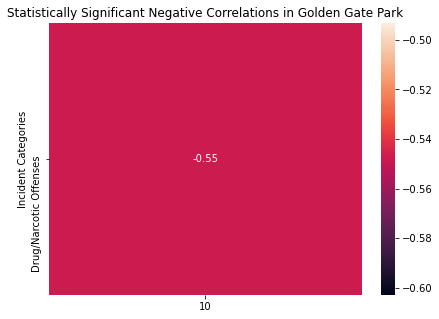

In [61]:
#Make a heatmap of the statistically significant negative correlation coefficients btwn incident categories and pit stops
fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.set_title('Statistically Significant Negative Correlations in Golden Gate Park')
sns.heatmap(ggpark_neg_statsig_correlations_wide, annot = True)

#### Haight Ashbury

In [62]:
#Make a dataset that only includes data about Haight Ashbury
haight_incidents_df = phase3_incident_counter_df[phase3_incident_counter_df['Neighborhood Name'] == 'Haight Ashbury']
haight_incidents_df.head()

,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing,NUMBER OF PIT STOPS
4,2003,Haight Ashbury,1,65,0,0,56,0,0,0,...,0,0,5,47,0,0,52,11,0,0
14,2004,Haight Ashbury,1,85,0,1,89,0,0,0,...,0,0,5,65,0,0,93,7,0,0
24,2005,Haight Ashbury,2,84,1,0,69,0,0,0,...,0,0,5,71,0,0,81,10,0,0
34,2006,Haight Ashbury,4,80,0,0,88,0,0,0,...,0,0,8,62,0,0,71,16,0,0
44,2007,Haight Ashbury,0,69,0,0,40,0,0,0,...,0,0,9,60,0,0,72,14,0,0


In [63]:
#Remove data from 2020
haight_incidents_df = haight_incidents_df[haight_incidents_df['Incident Year'] != 2020]

In [64]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
arson_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                      haight_incidents_df['ARSON'])
print('Correlation between Num of Pit Stops and Arson Incidents:', arson_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                         haight_incidents_df['ASSAULT'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
bad_checks_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                           haight_incidents_df['BAD CHECKS'])
print('Correlation between Num of Pit Stops and Num of Bad Checks:', bad_checks_pitstops_correlation)
bribery_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                        haight_incidents_df['BRIBERY'])
print('Correlation between Num of Pit Stops and Num of Briberies:', bribery_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                         haight_incidents_df['BURGLARY'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
case_closure_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                             haight_incidents_df['CASE CLOSURE'])
print('Correlation between Num of Pit Stops and Num of Case Closures:', case_closure_pitstops_correlation)
civil_sidewalks_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                                haight_incidents_df['CIVIL SIDEWALKS'])
print('Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses:', civil_sidewalks_pitstops_correlation)
courtesy_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                         haight_incidents_df['COURTESY REPORT'])
print('Correlation between Num of Pit Stops and Num of Courtesy Reports:', courtesy_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                         haight_incidents_df['DISORDERLY CONDUCT'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
dui_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                    haight_incidents_df['DRIVING UNDER THE INFLUENCE'])
print('Correlation between Num of Pit Stops and DUI Offenses:', dui_pitstops_correlation)
drug_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                     haight_incidents_df['DRUG/NARCOTIC'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
drunk_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                      haight_incidents_df['DRUNKENNESS'])
print('Correlation between Num of Pit Stops and Num of Drunkenness Offenses:', drunk_pitstops_correlation)
embez_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                      haight_incidents_df['EMBEZZLEMENT'])
print('Correlation between Num of Pit Stops and Num of Embezzlement Offenses:', embez_pitstops_correlation)
extortion_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                          haight_incidents_df['EXTORTION'])
print('Correlation between Num of Pit Stops and Num of Extortion Offenses:', extortion_pitstops_correlation)
fire_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                     haight_incidents_df['FIRE REPORT'])
print('Correlation between Num of Pit Stops and Num of Fire Reports:', fire_pitstops_correlation)
forgery_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                        haight_incidents_df['FORGERY/COUNTERFEITING'])
print('Correlation between Num of Pit Stops and Num of Forgery/Counterfeiting Offenses:', forgery_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                      haight_incidents_df['FRAUD'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
gambling_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                         haight_incidents_df['GAMBLING'])
print('Correlation between Num of Pit Stops and Num of Gambling Offenses:', gambling_pitstops_correlation)
homicide_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                         haight_incidents_df['HOMICIDE'])
print('Correlation between Num of Pit Stops and Num of Homicides:', homicide_pitstops_correlation)
humantrafficB_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                              haight_incidents_df['HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking B Offenses:', humantrafficB_pitstops_correlation)
humantraffic_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                             haight_incidents_df['HUMAN TRAFFICKING, COMMERCIAL SEX ACTS'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking Offenses:', humantraffic_pitstops_correlation)
kidnap_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                       haight_incidents_df['KIDNAPPING'])
print('Correlation between Num of Pit Stops and Num of Kidnappings:', kidnap_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                        haight_incidents_df['LARCENY/THEFT'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
liquor_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                       haight_incidents_df['LIQUOR LAWS'])
print('Correlation between Num of Pit Stops and Num of Liquor Law Offenses:', liquor_pitstops_correlation)
loiter_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                       haight_incidents_df['LOITERING'])
print('Correlation between Num of Pit Stops and Num of Loitering Offenses:', loiter_pitstops_correlation)
lostprop_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'],
                                         haight_incidents_df['LOST PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Lost Property Incidents:', lostprop_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                         haight_incidents_df['MALICIOUS MISCHIEF'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
misc_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                     haight_incidents_df['MISCELLANEOUS INVESTIGATION'])
print('Correlation between Num of Pit Stops and Num of Miscellaneous Investigations:', misc_pitstops_correlation)
missing_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                        haight_incidents_df['MISSING PERSON'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                         haight_incidents_df['MOTOR VEHICLE THEFT'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                        haight_incidents_df['NON-CRIMINAL'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
fam_and_child_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                              haight_incidents_df['OFFENCES AGAINST THE FAMILY AND CHILDREN'])
print('Correlation between Num of Pit Stops and Num of Offenses Against Family and Children:', fam_and_child_pitstops_correlation)
othermisc_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                          haight_incidents_df['OTHER MISCELLANEOUS'])
print('Correlation between Num of Pit Stops and Num of Other Miscellaneous Offenses:', othermisc_pitstops_correlation)
other_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                      haight_incidents_df['OTHER OFFENSES'])
print('Correlation between Num of Pit Stops and Num of Other Offenses:', other_pitstops_correlation)
pornography_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                            haight_incidents_df['PORNOGRAPHY/OBSCENE MAT'])
print('Correlation between Num of Pit Stops and Num of Pornography Offenses:', pornography_pitstops_correlation)
prost_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                      haight_incidents_df['PROSTITUTION'])
print('Correlation between Num of Pit Stops and Num of Prostitution Offenses:', prost_pitstops_correlation)
rape_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                     haight_incidents_df['RAPE'])
print('Correlation between Num of Pit Stops and Num of Rapes:', rape_pitstops_correlation)
recov_veh_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                          haight_incidents_df['RECOVERED VEHICLE'])
print('Correlation between Num of Pit Stops and Num of Recovered Vehicles:', recov_veh_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                        haight_incidents_df['ROBBERY'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sec_codes_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                          haight_incidents_df['SECONDARY CODES'])
print('Correlation between Num of Pit Stops and Num of Secondary Codes:', sec_codes_pitstops_correlation)
sex_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                    haight_incidents_df['SEX OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses:', sex_pitstops_correlation)                                                               
sex_forcible_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                             haight_incidents_df['SEX OFFENSES, FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Forcible:', sex_forcible_pitstops_correlation)
sex_nonforcible_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                                haight_incidents_df['SEX OFFENSES, NON FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Non Forcible:', sex_nonforcible_pitstops_correlation) 
stolen_prop_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                            haight_incidents_df['STOLEN PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Stolen Property Offenses:', stolen_prop_pitstops_correlation)                                          
suicide_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                        haight_incidents_df['SUICIDE'])
print('Correlation between Num of Pit Stops and Num of Suicides:', suicide_pitstops_correlation)  
susp_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                     haight_incidents_df['SUSPICIOUS'])
print('Correlation between Num of Pit Stops and Num of Suspicious Offenses:', susp_pitstops_correlation)                                                          
sus_occ_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                        haight_incidents_df['SUSPICIOUS OCC'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
traffic_col_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                            haight_incidents_df['TRAFFIC COLLISION'])
print('Correlation between Num of Pit Stops and Num of Traffic Collisions:', traffic_col_pitstops_correlation)
traffic_arrest_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                               haight_incidents_df['TRAFFIC VIOLATION ARREST'])
print('Correlation between Num of Pit Stops and Num of Traffic Violation Arrests:', traffic_arrest_pitstops_correlation)
trea_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                     haight_incidents_df['TREA'])
print('Correlation between Num of Pit Stops and Num of Trea Offenses:', trea_pitstops_correlation)
trespass_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                         haight_incidents_df['TRESPASS'])
print('Correlation between Num of Pit Stops and Num of Trespass Offenses:', trespass_pitstops_correlation)                                    
vand_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                     haight_incidents_df['VANDALISM'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
veh_impound_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                            haight_incidents_df['VEHICLE IMPOUNDED'])
print('Correlation between Num of Pit Stops and Num of Impounded Vehicles:', veh_impound_pitstops_correlation)
veh_misplace_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                             haight_incidents_df['VEHICLE MISPLACED'])
print('Correlation between Num of Pit Stops and Num of Misplaced Vehicles:', veh_misplace_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                        haight_incidents_df['WARRANTS'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(haight_incidents_df['NUMBER OF PIT STOPS'], 
                                       haight_incidents_df['WEAPONS OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)

Correlation between Num of Pit Stops and Arson Incidents: (0.3245255093358045, 0.20377460781688705)
Correlation between Num of Pit Stops and Num of Assaults: (0.24541325471376046, 0.3424065648024258)
Correlation between Num of Pit Stops and Num of Bad Checks: (-0.2567762955065477, 0.31979139320657696)
Correlation between Num of Pit Stops and Num of Briberies: (-0.13867504905630726, 0.5955598372302713)
Correlation between Num of Pit Stops and Num of Burglaries: (0.11949095763587536, 0.647822258180266)
Correlation between Num of Pit Stops and Num of Case Closures: (0.5278363668559976, 0.029424560217881954)
Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses: (0.6483161210864223, 0.004879988456385207)
Correlation between Num of Pit Stops and Num of Courtesy Reports: (0.6203776439013833, 0.007883347499619013)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.11400556859548994, 0.6630702531512126)
Correlation between Num of Pit Stops and DUI

C:\Users\sdelp\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [65]:
#Make 3 lists: a list that contains the correlation coefficients between number of pit stops and each incident category,
#a list that contains the p-values for the correlation coefficients, and a list that contains the incident categories
haight_correlation_coefficients = [arson_pitstops_correlation[0], assaults_pitstops_correlation[0], 
                                   bad_checks_pitstops_correlation[0], bribery_pitstops_correlation[0], 
                                   burglary_pitstops_correlation[0], case_closure_pitstops_correlation[0], 
                                   civil_sidewalks_pitstops_correlation[0], courtesy_sidewalks_pitstops_correlation[0], 
                                   dis_cond_pitstops_correlation[0], dui_pitstops_correlation[0], drug_pitstops_correlation[0],
                                   drunk_pitstops_correlation[0], embez_pitstops_correlation[0], 
                                   extortion_pitstops_correlation[0], fire_pitstops_correlation[0], 
                                   forgery_pitstops_correlation[0], fraud_pitstops_correlation[0], 
                                   gambling_pitstops_correlation[0], homicide_pitstops_correlation[0], 
                                   humantrafficB_pitstops_correlation[0], humantraffic_pitstops_correlation[0], 
                                   kidnap_pitstops_correlation[0], larceny_pitstops_correlation[0], 
                                   liquor_pitstops_correlation[0], loiter_pitstops_correlation[0], 
                                   lostprop_pitstops_correlation[0], mischief_pitstops_correlation[0], 
                                   misc_pitstops_correlation[0], missing_pitstops_correlation[0], 
                                   mv_theft_pitstops_correlation[0], noncrim_pitstops_correlation[0], 
                                   fam_and_child_pitstops_correlation[0], othermisc_pitstops_correlation[0], 
                                   other_pitstops_correlation[0], pornography_pitstops_correlation[0], 
                                   prost_pitstops_correlation[0], rape_pitstops_correlation[0], 
                                   recov_veh_pitstops_correlation[0], robbery_pitstops_correlation[0], 
                                   sec_codes_pitstops_correlation[0], sex_pitstops_correlation[0],                                                             
                                   sex_forcible_pitstops_correlation[0], sex_nonforcible_pitstops_correlation[0], 
                                   stolen_prop_pitstops_correlation[0], suicide_pitstops_correlation[0], 
                                   susp_pitstops_correlation[0], sus_occ_pitstops_correlation[0], 
                                   traffic_col_pitstops_correlation[0], traffic_arrest_pitstops_correlation[0], 
                                   trea_pitstops_correlation[0], trespass_pitstops_correlation[0],                                  
                                   vand_pitstops_correlation[0], veh_impound_pitstops_correlation[0], 
                                   veh_misplace_pitstops_correlation[0], warrant_pitstops_correlation[0], 
                                   weapon_pitstops_correlation[0]]

haight_p_values = [arson_pitstops_correlation[1], assaults_pitstops_correlation[1], bad_checks_pitstops_correlation[1], 
                   bribery_pitstops_correlation[1], burglary_pitstops_correlation[1], case_closure_pitstops_correlation[1], 
                   civil_sidewalks_pitstops_correlation[1], courtesy_sidewalks_pitstops_correlation[1], 
                   dis_cond_pitstops_correlation[1], dui_pitstops_correlation[1], drug_pitstops_correlation[1],
                   drunk_pitstops_correlation[1], embez_pitstops_correlation[1], extortion_pitstops_correlation[1], 
                   fire_pitstops_correlation[1], forgery_pitstops_correlation[1], fraud_pitstops_correlation[1], 
                   gambling_pitstops_correlation[1], homicide_pitstops_correlation[1], humantrafficB_pitstops_correlation[1],
                   humantraffic_pitstops_correlation[1], kidnap_pitstops_correlation[1], larceny_pitstops_correlation[1], 
                   liquor_pitstops_correlation[1], loiter_pitstops_correlation[1], lostprop_pitstops_correlation[1], 
                   mischief_pitstops_correlation[1], misc_pitstops_correlation[1], missing_pitstops_correlation[1], 
                   mv_theft_pitstops_correlation[1], noncrim_pitstops_correlation[1], fam_and_child_pitstops_correlation[1],
                   othermisc_pitstops_correlation[1], other_pitstops_correlation[1], pornography_pitstops_correlation[1], 
                   prost_pitstops_correlation[1], rape_pitstops_correlation[1], recov_veh_pitstops_correlation[1], 
                   robbery_pitstops_correlation[1], sec_codes_pitstops_correlation[1], sex_pitstops_correlation[1],                                                             
                   sex_forcible_pitstops_correlation[1], sex_nonforcible_pitstops_correlation[1], 
                   stolen_prop_pitstops_correlation[1], suicide_pitstops_correlation[1], susp_pitstops_correlation[1],
                   sus_occ_pitstops_correlation[1], traffic_col_pitstops_correlation[1], 
                   traffic_arrest_pitstops_correlation[1], trea_pitstops_correlation[1], trespass_pitstops_correlation[1],                                  
                   vand_pitstops_correlation[1], veh_impound_pitstops_correlation[1], veh_misplace_pitstops_correlation[1],
                   warrant_pitstops_correlation[1], weapon_pitstops_correlation[1]]

haight_incident_categories = ['Arson Incidents', 'Assaults', 'Bad Checks', 'Briberies', 'Burglaries', 'Case Closures',
                              'Civil Sidewalk Offenses', 'Courtesy Reports', 'Disorderly Conduct Offenses', 'DUI Offenses', 
                              'Drug/Narcotic Offenses', 'Drunkenness Offenses', 'Embezzlement Offenses', 'Extortion Offenses',
                              'Fire Reports', 'Forgery/Counterfeiting Offenses', 'Fraud Offenses', 'Gambling Offenses', 
                              'Homicides', 'Human Trafficking B Offenses', 'Human Trafficking Offenses', 'Kidnappings',
                              'Larceny/Theft Offenses', 'Liquor Law Offenses', 'Loitering Offenses', 'Lost Property Incidents', 
                              'Malicious Mischief Offenses', 'Miscellaneous Investigations', 'Missing Persons', 
                              'Motor Vehicle Thefts', 'Non-Criminal Offenses', 'Offenses Against Family and Children', 
                              'Other Miscellaneous Offenses', 'Other Offenses', 'Pornography Offenses', 
                              'Prostitution Offenses', 'Rape', 'Recovered Vehicles', 'Robberies', 'Secondary Codes', 
                              'Sex Offenses', 'Sex Offenses, Forcible', 'Sex Offenses, Non Forcible', 'Stolen Property', 
                              'Suicides', 'Suspicious Offenses', 'Suspicious Occ Offenses', 'Traffic Collisions', 
                              'Traffic Violation Arrests', 'Trea Offenses', 'Trespass Offenses', 'Vandalism Offenses', 
                              'Impounded Vehicles', 'Misplaced Vehicles', 'Warrants', 'Weapons Offenses']

In [66]:
#Make a dataframe from above lists
haight_correlations_df = pd.DataFrame(list(zip(haight_incident_categories, haight_correlation_coefficients, haight_p_values)), 
                                      columns = ['Incident Categories', 'Correlation Coefficient', 'P-value'])
haight_correlations_df

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.324526,0.203775
1,Assaults,0.245413,0.342407
2,Bad Checks,-0.256776,0.319791
3,Briberies,-0.138675,0.595560
4,Burglaries,0.119491,0.647822
5,Case Closures,0.527836,0.029425
6,Civil Sidewalk Offenses,0.648316,0.004880
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.114006,0.663070
9,DUI Offenses,-0.077793,0.766643


In [67]:
#Drop all null values
haight_correlations_df.dropna(axis = 0)

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.324526,0.203775
1,Assaults,0.245413,0.342407
2,Bad Checks,-0.256776,0.319791
3,Briberies,-0.138675,0.595560
4,Burglaries,0.119491,0.647822
5,Case Closures,0.527836,0.029425
6,Civil Sidewalk Offenses,0.648316,0.004880
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.114006,0.663070
9,DUI Offenses,-0.077793,0.766643


In [68]:
#Make a dataframe that includes only negative correlation coefficients
haight_neg_correlations_df = haight_correlations_df[haight_correlations_df['Correlation Coefficient'] <= 0]
haight_neg_correlations_df

,Incident Categories,Correlation Coefficient,P-value
2,Bad Checks,-0.256776,0.319791
3,Briberies,-0.138675,0.595560
9,DUI Offenses,-0.077793,0.766643
10,Drug/Narcotic Offenses,-0.463662,0.060844
11,Drunkenness Offenses,-0.868250,0.000006
12,Embezzlement Offenses,-0.106990,0.682754
15,Forgery/Counterfeiting Offenses,-0.298856,0.243926
21,Kidnappings,-0.355280,0.161683
23,Liquor Law Offenses,-0.570805,0.016710
24,Loitering Offenses,-0.254951,0.323364


In [69]:
#Make a dataframe that includes only statistically significant negative correlations
haight_neg_statsig_correlations_df = haight_neg_correlations_df[haight_neg_correlations_df['P-value'] < 0.05]
haight_neg_statsig_correlations_df

,Incident Categories,Correlation Coefficient,P-value
11,Drunkenness Offenses,-0.868250,0.000006
23,Liquor Law Offenses,-0.570805,0.016710
33,Other Offenses,-0.509689,0.036618
39,Secondary Codes,-0.597219,0.011362
51,Vandalism Offenses,-0.535482,0.026743


In [70]:
#Pivot and transpose dataframe so that a heatmap can be made
haight_neg_statsig_correlations_wide = haight_neg_statsig_correlations_df.pivot(columns = 'Incident Categories', 
                                                                                values = 'Correlation Coefficient')
haight_neg_statsig_correlations_wide = haight_neg_statsig_correlations_wide.transpose()

<AxesSubplot:title={'center':'Statistically Significant Negative Correlations in Haight Ashbury'}, ylabel='Incident Categories'>

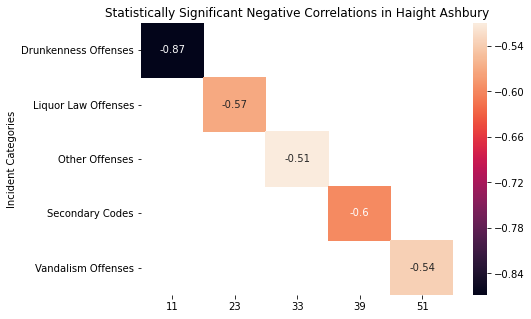

In [71]:
#Make a heatmap of the statistically significant negative correlations btwn incident categories and pit stops
fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.set_title('Statistically Significant Negative Correlations in Haight Ashbury')
sns.heatmap(haight_neg_statsig_correlations_wide, annot = True)

#### Mission

In [72]:
#Make a dataset that only includes data about Mission
mission_incidents_df = phase3_incident_counter_df[phase3_incident_counter_df['Neighborhood Name'] == 'Mission']
mission_incidents_df.head()

,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing,NUMBER OF PIT STOPS
5,2003,Mission,7,664,6,0,206,0,0,0,...,0,0,80,265,0,0,567,60,0,0
15,2004,Mission,14,693,2,1,207,0,0,0,...,0,0,62,315,0,0,534,65,0,0
25,2005,Mission,7,638,4,4,246,0,0,0,...,0,0,65,291,0,0,454,82,0,0
35,2006,Mission,9,676,3,4,213,0,0,0,...,0,0,61,305,0,0,410,88,0,0
45,2007,Mission,6,669,2,3,198,0,0,0,...,0,0,74,325,0,0,487,73,0,0


In [73]:
#Remove data from 2020
mission_incidents_df = mission_incidents_df[mission_incidents_df['Incident Year'] != 2020]

In [74]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
arson_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                      mission_incidents_df['ARSON'])
print('Correlation between Num of Pit Stops and Arson Incidents:', arson_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                         mission_incidents_df['ASSAULT'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
bad_checks_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                           mission_incidents_df['BAD CHECKS'])
print('Correlation between Num of Pit Stops and Num of Bad Checks:', bad_checks_pitstops_correlation)
bribery_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                        mission_incidents_df['BRIBERY'])
print('Correlation between Num of Pit Stops and Num of Briberies:', bribery_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                         mission_incidents_df['BURGLARY'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
case_closure_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                             mission_incidents_df['CASE CLOSURE'])
print('Correlation between Num of Pit Stops and Num of Case Closures:', case_closure_pitstops_correlation)
civil_sidewalks_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                                mission_incidents_df['CIVIL SIDEWALKS'])
print('Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses:', civil_sidewalks_pitstops_correlation)
courtesy_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                         mission_incidents_df['COURTESY REPORT'])
print('Correlation between Num of Pit Stops and Num of Courtesy Reports:', courtesy_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                         mission_incidents_df['DISORDERLY CONDUCT'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
dui_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                    mission_incidents_df['DRIVING UNDER THE INFLUENCE'])
print('Correlation between Num of Pit Stops and DUI Offenses:', dui_pitstops_correlation)
drug_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                     mission_incidents_df['DRUG/NARCOTIC'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
drunk_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                      mission_incidents_df['DRUNKENNESS'])
print('Correlation between Num of Pit Stops and Num of Drunkenness Offenses:', drunk_pitstops_correlation)
embez_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                      mission_incidents_df['EMBEZZLEMENT'])
print('Correlation between Num of Pit Stops and Num of Embezzlement Offenses:', embez_pitstops_correlation)
extortion_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                          mission_incidents_df['EXTORTION'])
print('Correlation between Num of Pit Stops and Num of Extortion Offenses:', extortion_pitstops_correlation)
fire_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                     mission_incidents_df['FIRE REPORT'])
print('Correlation between Num of Pit Stops and Num of Fire Reports:', fire_pitstops_correlation)
forgery_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                        mission_incidents_df['FORGERY/COUNTERFEITING'])
print('Correlation between Num of Pit Stops and Num of Forgery/Counterfeiting Offenses:', forgery_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                      mission_incidents_df['FRAUD'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
gambling_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                         mission_incidents_df['GAMBLING'])
print('Correlation between Num of Pit Stops and Num of Gambling Offenses:', gambling_pitstops_correlation)
homicide_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                         mission_incidents_df['HOMICIDE'])
print('Correlation between Num of Pit Stops and Num of Homicides:', homicide_pitstops_correlation)
humantrafficB_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                              mission_incidents_df['HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking B Offenses:', humantrafficB_pitstops_correlation)
humantraffic_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                             mission_incidents_df['HUMAN TRAFFICKING, COMMERCIAL SEX ACTS'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking Offenses:', humantraffic_pitstops_correlation)
kidnap_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                       mission_incidents_df['KIDNAPPING'])
print('Correlation between Num of Pit Stops and Num of Kidnappings:', kidnap_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                        mission_incidents_df['LARCENY/THEFT'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
liquor_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                       mission_incidents_df['LIQUOR LAWS'])
print('Correlation between Num of Pit Stops and Num of Liquor Law Offenses:', liquor_pitstops_correlation)
loiter_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                       mission_incidents_df['LOITERING'])
print('Correlation between Num of Pit Stops and Num of Loitering Offenses:', loiter_pitstops_correlation)
lostprop_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'],
                                         mission_incidents_df['LOST PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Lost Property Incidents:', lostprop_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                         mission_incidents_df['MALICIOUS MISCHIEF'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
misc_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                     mission_incidents_df['MISCELLANEOUS INVESTIGATION'])
print('Correlation between Num of Pit Stops and Num of Miscellaneous Investigations:', misc_pitstops_correlation)
missing_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                        mission_incidents_df['MISSING PERSON'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                         mission_incidents_df['MOTOR VEHICLE THEFT'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                        mission_incidents_df['NON-CRIMINAL'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
fam_and_child_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                              mission_incidents_df['OFFENCES AGAINST THE FAMILY AND CHILDREN'])
print('Correlation between Num of Pit Stops and Num of Offenses Against Family and Children:', fam_and_child_pitstops_correlation)
othermisc_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                          mission_incidents_df['OTHER MISCELLANEOUS'])
print('Correlation between Num of Pit Stops and Num of Other Miscellaneous Offenses:', othermisc_pitstops_correlation)
other_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                      mission_incidents_df['OTHER OFFENSES'])
print('Correlation between Num of Pit Stops and Num of Other Offenses:', other_pitstops_correlation)
pornography_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                            mission_incidents_df['PORNOGRAPHY/OBSCENE MAT'])
print('Correlation between Num of Pit Stops and Num of Pornography Offenses:', pornography_pitstops_correlation)
prost_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                      mission_incidents_df['PROSTITUTION'])
print('Correlation between Num of Pit Stops and Num of Prostitution Offenses:', prost_pitstops_correlation)
rape_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                     mission_incidents_df['RAPE'])
print('Correlation between Num of Pit Stops and Num of Rapes:', rape_pitstops_correlation)
recov_veh_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                          mission_incidents_df['RECOVERED VEHICLE'])
print('Correlation between Num of Pit Stops and Num of Recovered Vehicles:', recov_veh_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                        mission_incidents_df['ROBBERY'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sec_codes_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                          mission_incidents_df['SECONDARY CODES'])
print('Correlation between Num of Pit Stops and Num of Secondary Codes:', sec_codes_pitstops_correlation)
sex_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                    mission_incidents_df['SEX OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses:', sex_pitstops_correlation)                                                               
sex_forcible_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                             mission_incidents_df['SEX OFFENSES, FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Forcible:', sex_forcible_pitstops_correlation)
sex_nonforcible_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                                mission_incidents_df['SEX OFFENSES, NON FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Non Forcible:', sex_nonforcible_pitstops_correlation) 
stolen_prop_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                            mission_incidents_df['STOLEN PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Stolen Property Offenses:', stolen_prop_pitstops_correlation)                                          
suicide_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                        mission_incidents_df['SUICIDE'])
print('Correlation between Num of Pit Stops and Num of Suicides:', suicide_pitstops_correlation)  
susp_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                     mission_incidents_df['SUSPICIOUS'])
print('Correlation between Num of Pit Stops and Num of Suspicious Offenses:', susp_pitstops_correlation)                                                          
sus_occ_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                        mission_incidents_df['SUSPICIOUS OCC'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
traffic_col_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                            mission_incidents_df['TRAFFIC COLLISION'])
print('Correlation between Num of Pit Stops and Num of Traffic Collisions:', traffic_col_pitstops_correlation)
traffic_arrest_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                               mission_incidents_df['TRAFFIC VIOLATION ARREST'])
print('Correlation between Num of Pit Stops and Num of Traffic Violation Arrests:', traffic_arrest_pitstops_correlation)
trea_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                     mission_incidents_df['TREA'])
print('Correlation between Num of Pit Stops and Num of Trea Offenses:', trea_pitstops_correlation)
trespass_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                         mission_incidents_df['TRESPASS'])
print('Correlation between Num of Pit Stops and Num of Trespass Offenses:', trespass_pitstops_correlation)                                    
vand_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                     mission_incidents_df['VANDALISM'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
veh_impound_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                            mission_incidents_df['VEHICLE IMPOUNDED'])
print('Correlation between Num of Pit Stops and Num of Impounded Vehicles:', veh_impound_pitstops_correlation)
veh_misplace_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                             mission_incidents_df['VEHICLE MISPLACED'])
print('Correlation between Num of Pit Stops and Num of Misplaced Vehicles:', veh_misplace_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                        mission_incidents_df['WARRANTS'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(mission_incidents_df['NUMBER OF PIT STOPS'], 
                                       mission_incidents_df['WEAPONS OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)

Correlation between Num of Pit Stops and Arson Incidents: (0.775117396114996, 0.00025730997577088586)
Correlation between Num of Pit Stops and Num of Assaults: (0.480293168779269, 0.05101628291976582)
Correlation between Num of Pit Stops and Num of Bad Checks: (-0.3526723032403106, 0.16500236582528321)
Correlation between Num of Pit Stops and Num of Briberies: (-0.33681945610656416, 0.1861721965605149)
Correlation between Num of Pit Stops and Num of Burglaries: (0.5382665364097725, 0.025814354812669763)
Correlation between Num of Pit Stops and Num of Case Closures: (0.7311488747482696, 0.0008537942873944078)
Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses: (0.6898326614449849, 0.0021817170174013895)
Correlation between Num of Pit Stops and Num of Courtesy Reports: (0.71982647444092, 0.0011217015039131442)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.6577471843549969, 0.00410679721321787)
Correlation between Num of Pit Stops and

C:\Users\sdelp\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [75]:
#Make 3 lists: a list that contains the correlation coefficients between number of pit stops and each incident category,
#a list that contains the p-values for the correlation coefficients, and a list that contains the incident categories
mission_correlation_coefficients = [arson_pitstops_correlation[0], assaults_pitstops_correlation[0], 
                                    bad_checks_pitstops_correlation[0], bribery_pitstops_correlation[0], 
                                    burglary_pitstops_correlation[0], case_closure_pitstops_correlation[0], 
                                    civil_sidewalks_pitstops_correlation[0], courtesy_sidewalks_pitstops_correlation[0], 
                                    dis_cond_pitstops_correlation[0], dui_pitstops_correlation[0], drug_pitstops_correlation[0],
                                    drunk_pitstops_correlation[0], embez_pitstops_correlation[0], 
                                    extortion_pitstops_correlation[0], fire_pitstops_correlation[0], 
                                    forgery_pitstops_correlation[0], fraud_pitstops_correlation[0], 
                                    gambling_pitstops_correlation[0], homicide_pitstops_correlation[0], 
                                    humantrafficB_pitstops_correlation[0], humantraffic_pitstops_correlation[0], 
                                    kidnap_pitstops_correlation[0], larceny_pitstops_correlation[0], 
                                    liquor_pitstops_correlation[0], loiter_pitstops_correlation[0], 
                                    lostprop_pitstops_correlation[0], mischief_pitstops_correlation[0], 
                                    misc_pitstops_correlation[0], missing_pitstops_correlation[0], 
                                    mv_theft_pitstops_correlation[0], noncrim_pitstops_correlation[0], 
                                    fam_and_child_pitstops_correlation[0], othermisc_pitstops_correlation[0], 
                                    other_pitstops_correlation[0], pornography_pitstops_correlation[0], 
                                    prost_pitstops_correlation[0], rape_pitstops_correlation[0], 
                                    recov_veh_pitstops_correlation[0], robbery_pitstops_correlation[0], 
                                    sec_codes_pitstops_correlation[0], sex_pitstops_correlation[0],                                                             
                                    sex_forcible_pitstops_correlation[0], sex_nonforcible_pitstops_correlation[0], 
                                    stolen_prop_pitstops_correlation[0], suicide_pitstops_correlation[0], 
                                    susp_pitstops_correlation[0], sus_occ_pitstops_correlation[0], 
                                    traffic_col_pitstops_correlation[0], traffic_arrest_pitstops_correlation[0], 
                                    trea_pitstops_correlation[0], trespass_pitstops_correlation[0],                                  
                                    vand_pitstops_correlation[0], veh_impound_pitstops_correlation[0], 
                                    veh_misplace_pitstops_correlation[0], warrant_pitstops_correlation[0], 
                                    weapon_pitstops_correlation[0]]

mission_p_values = [arson_pitstops_correlation[1], assaults_pitstops_correlation[1], bad_checks_pitstops_correlation[1], 
                    bribery_pitstops_correlation[1], burglary_pitstops_correlation[1], case_closure_pitstops_correlation[1], 
                    civil_sidewalks_pitstops_correlation[1], courtesy_sidewalks_pitstops_correlation[1], 
                    dis_cond_pitstops_correlation[1], dui_pitstops_correlation[1], drug_pitstops_correlation[1],
                    drunk_pitstops_correlation[1], embez_pitstops_correlation[1], extortion_pitstops_correlation[1], 
                    fire_pitstops_correlation[1], forgery_pitstops_correlation[1], fraud_pitstops_correlation[1], 
                    gambling_pitstops_correlation[1], homicide_pitstops_correlation[1], humantrafficB_pitstops_correlation[1],
                    humantraffic_pitstops_correlation[1], kidnap_pitstops_correlation[1], larceny_pitstops_correlation[1], 
                    liquor_pitstops_correlation[1], loiter_pitstops_correlation[1], lostprop_pitstops_correlation[1], 
                    mischief_pitstops_correlation[1], misc_pitstops_correlation[1], missing_pitstops_correlation[1], 
                    mv_theft_pitstops_correlation[1], noncrim_pitstops_correlation[1], fam_and_child_pitstops_correlation[1],
                    othermisc_pitstops_correlation[1], other_pitstops_correlation[1], pornography_pitstops_correlation[1], 
                    prost_pitstops_correlation[1], rape_pitstops_correlation[1], recov_veh_pitstops_correlation[1], 
                    robbery_pitstops_correlation[1], sec_codes_pitstops_correlation[1], sex_pitstops_correlation[1],                                                             
                    sex_forcible_pitstops_correlation[1], sex_nonforcible_pitstops_correlation[1], 
                    stolen_prop_pitstops_correlation[1], suicide_pitstops_correlation[1], susp_pitstops_correlation[1],
                    sus_occ_pitstops_correlation[1], traffic_col_pitstops_correlation[1], 
                    traffic_arrest_pitstops_correlation[1], trea_pitstops_correlation[1], trespass_pitstops_correlation[1],                                  
                    vand_pitstops_correlation[1], veh_impound_pitstops_correlation[1], veh_misplace_pitstops_correlation[1],
                    warrant_pitstops_correlation[1], weapon_pitstops_correlation[1]]

mission_incident_categories = ['Arson Incidents', 'Assaults', 'Bad Checks', 'Briberies', 'Burglaries', 'Case Closures',
                               'Civil Sidewalk Offenses', 'Courtesy Reports', 'Disorderly Conduct Offenses', 'DUI Offenses', 
                               'Drug/Narcotic Offenses', 'Drunkenness Offenses', 'Embezzlement Offenses', 'Extortion Offenses',
                               'Fire Reports', 'Forgery/Counterfeiting Offenses', 'Fraud Offenses', 'Gambling Offenses', 
                               'Homicides', 'Human Trafficking B Offenses', 'Human Trafficking Offenses', 'Kidnappings',
                               'Larceny/Theft Offenses', 'Liquor Law Offenses', 'Loitering Offenses', 'Lost Property Incidents', 
                               'Malicious Mischief Offenses', 'Miscellaneous Investigations', 'Missing Persons', 
                               'Motor Vehicle Thefts', 'Non-Criminal Offenses', 'Offenses Against Family and Children', 
                               'Other Miscellaneous Offenses', 'Other Offenses', 'Pornography Offenses', 
                               'Prostitution Offenses', 'Rape', 'Recovered Vehicles', 'Robberies', 'Secondary Codes', 
                               'Sex Offenses', 'Sex Offenses, Forcible', 'Sex Offenses, Non Forcible', 'Stolen Property', 
                               'Suicides', 'Suspicious Offenses', 'Suspicious Occ Offenses', 'Traffic Collisions', 
                               'Traffic Violation Arrests', 'Trea Offenses', 'Trespass Offenses', 'Vandalism Offenses', 
                               'Impounded Vehicles', 'Misplaced Vehicles', 'Warrants', 'Weapons Offenses']

In [76]:
#Make a dataframe from above lists
mission_correlations_df = pd.DataFrame(list(zip(mission_incident_categories, mission_correlation_coefficients, 
                                                mission_p_values)), 
                                      columns = ['Incident Categories', 'Correlation Coefficient', 'P-value'])
mission_correlations_df

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.775117,0.000257
1,Assaults,0.480293,0.051016
2,Bad Checks,-0.352672,0.165002
3,Briberies,-0.336819,0.186172
4,Burglaries,0.538267,0.025814
5,Case Closures,0.731149,0.000854
6,Civil Sidewalk Offenses,0.689833,0.002182
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.657747,0.004107
9,DUI Offenses,-0.346173,0.173475


In [77]:
#Drop all null values
mission_correlations_df.dropna(axis = 0)

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.775117,0.000257
1,Assaults,0.480293,0.051016
2,Bad Checks,-0.352672,0.165002
3,Briberies,-0.336819,0.186172
4,Burglaries,0.538267,0.025814
5,Case Closures,0.731149,0.000854
6,Civil Sidewalk Offenses,0.689833,0.002182
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.657747,0.004107
9,DUI Offenses,-0.346173,0.173475


In [78]:
#Make a dataframe that includes only negative correlation coefficients
mission_neg_correlations_df = mission_correlations_df[mission_correlations_df['Correlation Coefficient'] <= 0]
mission_neg_correlations_df

,Incident Categories,Correlation Coefficient,P-value
2,Bad Checks,-0.352672,0.165002
3,Briberies,-0.336819,0.186172
9,DUI Offenses,-0.346173,0.173475
10,Drug/Narcotic Offenses,-0.435718,0.080419
11,Drunkenness Offenses,-0.548388,0.022648
13,Extortion Offenses,-0.270381,0.293900
15,Forgery/Counterfeiting Offenses,-0.252198,0.328795
17,Gambling Offenses,-0.197033,0.448460
21,Kidnappings,-0.450813,0.069348
23,Liquor Law Offenses,-0.496873,0.042453


In [79]:
#Make a dataframe that includes only statistically significant negative correlation coefficients
mission_neg_statsig_correlations_df = mission_neg_correlations_df[mission_neg_correlations_df['P-value'] < 0.05]
mission_neg_statsig_correlations_df

,Incident Categories,Correlation Coefficient,P-value
11,Drunkenness Offenses,-0.548388,0.022648
23,Liquor Law Offenses,-0.496873,0.042453
33,Other Offenses,-0.628581,0.006880
39,Secondary Codes,-0.533899,0.027282
42,"Sex Offenses, Non Forcible",-0.594020,0.011926
44,Suicides,-0.587350,0.013172


In [80]:
#Pivot and transpose dataframe so that a heatmap can be made
mission_neg_statsig_correlations_wide = mission_neg_statsig_correlations_df.pivot(columns = 'Incident Categories', 
                                                                                  values = 'Correlation Coefficient')
mission_neg_statsig_correlations_wide = mission_neg_statsig_correlations_wide.transpose()

<AxesSubplot:title={'center':'Statistically Significant Negative Correlations in Mission'}, ylabel='Incident Categories'>

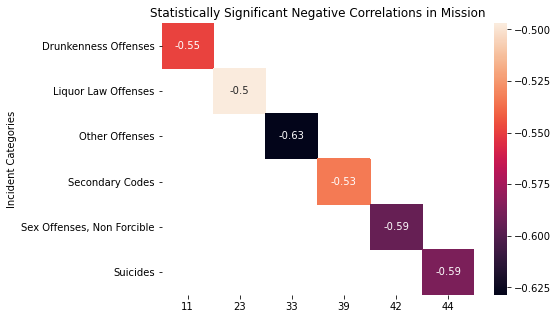

In [81]:
#Make a heatmap of the statistically significant negative correlation coefficients btwn incident categories and pit stops
fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.set_title('Statistically Significant Negative Correlations in Mission')
sns.heatmap(mission_neg_statsig_correlations_wide, annot = True)

#### North Beach

In [82]:
#Make a dataset that only includes data about North Beach
nb_incidents_df = phase3_incident_counter_df[phase3_incident_counter_df['Neighborhood Name'] == 'North Beach']
nb_incidents_df.head()

,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing,NUMBER OF PIT STOPS
6,2003,North Beach,0,104,1,1,57,0,0,0,...,0,0,17,49,0,0,72,9,0,0
16,2004,North Beach,3,107,0,0,78,0,0,0,...,0,0,17,75,0,0,65,8,0,0
26,2005,North Beach,0,105,0,0,63,0,0,0,...,0,0,12,76,0,0,35,17,0,0
36,2006,North Beach,2,123,2,0,71,0,0,0,...,0,0,9,87,0,0,47,15,0,0
46,2007,North Beach,2,124,0,0,47,0,0,0,...,0,0,11,87,0,0,43,13,0,0


In [83]:
#Remove data from 2020
nb_incidents_df = nb_incidents_df[nb_incidents_df['Incident Year'] != 2020]

In [84]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
arson_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                      nb_incidents_df['ARSON'])
print('Correlation between Num of Pit Stops and Arson Incidents:', arson_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                         nb_incidents_df['ASSAULT'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
bad_checks_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                           nb_incidents_df['BAD CHECKS'])
print('Correlation between Num of Pit Stops and Num of Bad Checks:', bad_checks_pitstops_correlation)
bribery_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                        nb_incidents_df['BRIBERY'])
print('Correlation between Num of Pit Stops and Num of Briberies:', bribery_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                         nb_incidents_df['BURGLARY'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
case_closure_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                             nb_incidents_df['CASE CLOSURE'])
print('Correlation between Num of Pit Stops and Num of Case Closures:', case_closure_pitstops_correlation)
civil_sidewalks_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                                nb_incidents_df['CIVIL SIDEWALKS'])
print('Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses:', civil_sidewalks_pitstops_correlation)
courtesy_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                         nb_incidents_df['COURTESY REPORT'])
print('Correlation between Num of Pit Stops and Num of Courtesy Reports:', courtesy_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                         nb_incidents_df['DISORDERLY CONDUCT'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
dui_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                    nb_incidents_df['DRIVING UNDER THE INFLUENCE'])
print('Correlation between Num of Pit Stops and DUI Offenses:', dui_pitstops_correlation)
drug_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                     nb_incidents_df['DRUG/NARCOTIC'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
drunk_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                      nb_incidents_df['DRUNKENNESS'])
print('Correlation between Num of Pit Stops and Num of Drunkenness Offenses:', drunk_pitstops_correlation)
embez_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                      nb_incidents_df['EMBEZZLEMENT'])
print('Correlation between Num of Pit Stops and Num of Embezzlement Offenses:', embez_pitstops_correlation)
extortion_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                          nb_incidents_df['EXTORTION'])
print('Correlation between Num of Pit Stops and Num of Extortion Offenses:', extortion_pitstops_correlation)
fire_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                     nb_incidents_df['FIRE REPORT'])
print('Correlation between Num of Pit Stops and Num of Fire Reports:', fire_pitstops_correlation)
forgery_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                        nb_incidents_df['FORGERY/COUNTERFEITING'])
print('Correlation between Num of Pit Stops and Num of Forgery/Counterfeiting Offenses:', forgery_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                      nb_incidents_df['FRAUD'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
gambling_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                         nb_incidents_df['GAMBLING'])
print('Correlation between Num of Pit Stops and Num of Gambling Offenses:', gambling_pitstops_correlation)
homicide_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                         nb_incidents_df['HOMICIDE'])
print('Correlation between Num of Pit Stops and Num of Homicides:', homicide_pitstops_correlation)
humantrafficB_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                              nb_incidents_df['HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking B Offenses:', humantrafficB_pitstops_correlation)
humantraffic_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                             nb_incidents_df['HUMAN TRAFFICKING, COMMERCIAL SEX ACTS'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking Offenses:', humantraffic_pitstops_correlation)
kidnap_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                       nb_incidents_df['KIDNAPPING'])
print('Correlation between Num of Pit Stops and Num of Kidnappings:', kidnap_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                        nb_incidents_df['LARCENY/THEFT'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
liquor_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                       nb_incidents_df['LIQUOR LAWS'])
print('Correlation between Num of Pit Stops and Num of Liquor Law Offenses:', liquor_pitstops_correlation)
loiter_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                       nb_incidents_df['LOITERING'])
print('Correlation between Num of Pit Stops and Num of Loitering Offenses:', loiter_pitstops_correlation)
lostprop_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'],
                                         nb_incidents_df['LOST PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Lost Property Incidents:', lostprop_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                         nb_incidents_df['MALICIOUS MISCHIEF'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
misc_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                     nb_incidents_df['MISCELLANEOUS INVESTIGATION'])
print('Correlation between Num of Pit Stops and Num of Miscellaneous Investigations:', misc_pitstops_correlation)
missing_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                        nb_incidents_df['MISSING PERSON'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                         nb_incidents_df['MOTOR VEHICLE THEFT'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                        nb_incidents_df['NON-CRIMINAL'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
fam_and_child_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                              nb_incidents_df['OFFENCES AGAINST THE FAMILY AND CHILDREN'])
print('Correlation between Num of Pit Stops and Num of Offenses Against Family and Children:', fam_and_child_pitstops_correlation)
othermisc_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                          nb_incidents_df['OTHER MISCELLANEOUS'])
print('Correlation between Num of Pit Stops and Num of Other Miscellaneous Offenses:', othermisc_pitstops_correlation)
other_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                      nb_incidents_df['OTHER OFFENSES'])
print('Correlation between Num of Pit Stops and Num of Other Offenses:', other_pitstops_correlation)
pornography_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                            nb_incidents_df['PORNOGRAPHY/OBSCENE MAT'])
print('Correlation between Num of Pit Stops and Num of Pornography Offenses:', pornography_pitstops_correlation)
prost_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                      nb_incidents_df['PROSTITUTION'])
print('Correlation between Num of Pit Stops and Num of Prostitution Offenses:', prost_pitstops_correlation)
rape_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                     nb_incidents_df['RAPE'])
print('Correlation between Num of Pit Stops and Num of Rapes:', rape_pitstops_correlation)
recov_veh_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                          nb_incidents_df['RECOVERED VEHICLE'])
print('Correlation between Num of Pit Stops and Num of Recovered Vehicles:', recov_veh_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                        nb_incidents_df['ROBBERY'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sec_codes_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                          nb_incidents_df['SECONDARY CODES'])
print('Correlation between Num of Pit Stops and Num of Secondary Codes:', sec_codes_pitstops_correlation)
sex_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                    nb_incidents_df['SEX OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses:', sex_pitstops_correlation)                                                               
sex_forcible_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                             nb_incidents_df['SEX OFFENSES, FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Forcible:', sex_forcible_pitstops_correlation)
sex_nonforcible_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                                nb_incidents_df['SEX OFFENSES, NON FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Non Forcible:', sex_nonforcible_pitstops_correlation) 
stolen_prop_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                            nb_incidents_df['STOLEN PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Stolen Property Offenses:', stolen_prop_pitstops_correlation)                                          
suicide_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                        nb_incidents_df['SUICIDE'])
print('Correlation between Num of Pit Stops and Num of Suicides:', suicide_pitstops_correlation)  
susp_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                     nb_incidents_df['SUSPICIOUS'])
print('Correlation between Num of Pit Stops and Num of Suspicious Offenses:', susp_pitstops_correlation)                                                          
sus_occ_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                        nb_incidents_df['SUSPICIOUS OCC'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
traffic_col_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                            nb_incidents_df['TRAFFIC COLLISION'])
print('Correlation between Num of Pit Stops and Num of Traffic Collisions:', traffic_col_pitstops_correlation)
traffic_arrest_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                               nb_incidents_df['TRAFFIC VIOLATION ARREST'])
print('Correlation between Num of Pit Stops and Num of Traffic Violation Arrests:', traffic_arrest_pitstops_correlation)
trea_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                     nb_incidents_df['TREA'])
print('Correlation between Num of Pit Stops and Num of Trea Offenses:', trea_pitstops_correlation)
trespass_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                         nb_incidents_df['TRESPASS'])
print('Correlation between Num of Pit Stops and Num of Trespass Offenses:', trespass_pitstops_correlation)                                    
vand_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                     nb_incidents_df['VANDALISM'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
veh_impound_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                            nb_incidents_df['VEHICLE IMPOUNDED'])
print('Correlation between Num of Pit Stops and Num of Impounded Vehicles:', veh_impound_pitstops_correlation)
veh_misplace_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                             nb_incidents_df['VEHICLE MISPLACED'])
print('Correlation between Num of Pit Stops and Num of Misplaced Vehicles:', veh_misplace_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                        nb_incidents_df['WARRANTS'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(nb_incidents_df['NUMBER OF PIT STOPS'], 
                                       nb_incidents_df['WEAPONS OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)

Correlation between Num of Pit Stops and Arson Incidents: (0.28748960541912416, 0.26318699107994714)
Correlation between Num of Pit Stops and Num of Assaults: (0.28530445089363665, 0.2669944990741574)
Correlation between Num of Pit Stops and Num of Bad Checks: (-0.08603090020146065, 0.7426808401405921)
Correlation between Num of Pit Stops and Num of Briberies: (-0.16137430609197573, 0.5360745674293881)
Correlation between Num of Pit Stops and Num of Burglaries: (0.3202460624329116, 0.21014778761810268)
Correlation between Num of Pit Stops and Num of Case Closures: (0.7379470581753119, 0.0007201203501987575)
Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses: (0.6846531968814578, 0.0024286870841118)
Correlation between Num of Pit Stops and Num of Courtesy Reports: (0.6846531968814579, 0.0024286870841117927)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.6120899109122697, 0.009013270672968383)
Correlation between Num of Pit Stops and 

C:\Users\sdelp\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [85]:
#Make 3 lists: a list that contains the correlation coefficients between number of pit stops and each incident category,
#a list that contains the p-values for the correlation coefficients, and a list that contains the incident categories
nb_correlation_coefficients = [arson_pitstops_correlation[0], assaults_pitstops_correlation[0], 
                               bad_checks_pitstops_correlation[0], bribery_pitstops_correlation[0], 
                               burglary_pitstops_correlation[0], case_closure_pitstops_correlation[0], 
                               civil_sidewalks_pitstops_correlation[0], courtesy_sidewalks_pitstops_correlation[0], 
                               dis_cond_pitstops_correlation[0], dui_pitstops_correlation[0], drug_pitstops_correlation[0],
                               drunk_pitstops_correlation[0], embez_pitstops_correlation[0], 
                               extortion_pitstops_correlation[0], fire_pitstops_correlation[0], 
                               forgery_pitstops_correlation[0], fraud_pitstops_correlation[0], 
                               gambling_pitstops_correlation[0], homicide_pitstops_correlation[0], 
                               humantrafficB_pitstops_correlation[0], humantraffic_pitstops_correlation[0], 
                               kidnap_pitstops_correlation[0], larceny_pitstops_correlation[0], 
                               liquor_pitstops_correlation[0], loiter_pitstops_correlation[0], 
                               lostprop_pitstops_correlation[0], mischief_pitstops_correlation[0], 
                               misc_pitstops_correlation[0], missing_pitstops_correlation[0], 
                               mv_theft_pitstops_correlation[0], noncrim_pitstops_correlation[0], 
                               fam_and_child_pitstops_correlation[0], othermisc_pitstops_correlation[0], 
                               other_pitstops_correlation[0], pornography_pitstops_correlation[0], 
                               prost_pitstops_correlation[0], rape_pitstops_correlation[0], 
                               recov_veh_pitstops_correlation[0], robbery_pitstops_correlation[0], 
                               sec_codes_pitstops_correlation[0], sex_pitstops_correlation[0],                                                             
                               sex_forcible_pitstops_correlation[0], sex_nonforcible_pitstops_correlation[0], 
                               stolen_prop_pitstops_correlation[0], suicide_pitstops_correlation[0], 
                               susp_pitstops_correlation[0], sus_occ_pitstops_correlation[0], 
                               traffic_col_pitstops_correlation[0], traffic_arrest_pitstops_correlation[0], 
                               trea_pitstops_correlation[0], trespass_pitstops_correlation[0],                                  
                               vand_pitstops_correlation[0], veh_impound_pitstops_correlation[0], 
                               veh_misplace_pitstops_correlation[0], warrant_pitstops_correlation[0], 
                               weapon_pitstops_correlation[0]]

nb_p_values = [arson_pitstops_correlation[1], assaults_pitstops_correlation[1], bad_checks_pitstops_correlation[1], 
               bribery_pitstops_correlation[1], burglary_pitstops_correlation[1], case_closure_pitstops_correlation[1], 
               civil_sidewalks_pitstops_correlation[1], courtesy_sidewalks_pitstops_correlation[1], 
               dis_cond_pitstops_correlation[1], dui_pitstops_correlation[1], drug_pitstops_correlation[1],
               drunk_pitstops_correlation[1], embez_pitstops_correlation[1], extortion_pitstops_correlation[1], 
               fire_pitstops_correlation[1], forgery_pitstops_correlation[1], fraud_pitstops_correlation[1], 
               gambling_pitstops_correlation[1], homicide_pitstops_correlation[1], humantrafficB_pitstops_correlation[1],
               humantraffic_pitstops_correlation[1], kidnap_pitstops_correlation[1], larceny_pitstops_correlation[1], 
               liquor_pitstops_correlation[1], loiter_pitstops_correlation[1], lostprop_pitstops_correlation[1], 
               mischief_pitstops_correlation[1], misc_pitstops_correlation[1], missing_pitstops_correlation[1], 
               mv_theft_pitstops_correlation[1], noncrim_pitstops_correlation[1], fam_and_child_pitstops_correlation[1],
               othermisc_pitstops_correlation[1], other_pitstops_correlation[1], pornography_pitstops_correlation[1], 
               prost_pitstops_correlation[1], rape_pitstops_correlation[1], recov_veh_pitstops_correlation[1], 
               robbery_pitstops_correlation[1], sec_codes_pitstops_correlation[1], sex_pitstops_correlation[1],                                                             
               sex_forcible_pitstops_correlation[1], sex_nonforcible_pitstops_correlation[1], 
               stolen_prop_pitstops_correlation[1], suicide_pitstops_correlation[1], susp_pitstops_correlation[1],
               sus_occ_pitstops_correlation[1], traffic_col_pitstops_correlation[1], 
               traffic_arrest_pitstops_correlation[1], trea_pitstops_correlation[1], trespass_pitstops_correlation[1],                                  
               vand_pitstops_correlation[1], veh_impound_pitstops_correlation[1], veh_misplace_pitstops_correlation[1],
               warrant_pitstops_correlation[1], weapon_pitstops_correlation[1]]

nb_incident_categories = ['Arson Incidents', 'Assaults', 'Bad Checks', 'Briberies', 'Burglaries', 'Case Closures',
                          'Civil Sidewalk Offenses', 'Courtesy Reports', 'Disorderly Conduct Offenses', 'DUI Offenses', 
                          'Drug/Narcotic Offenses', 'Drunkenness Offenses', 'Embezzlement Offenses', 'Extortion Offenses',
                          'Fire Reports', 'Forgery/Counterfeiting Offenses', 'Fraud Offenses', 'Gambling Offenses', 
                          'Homicides', 'Human Trafficking B Offenses', 'Human Trafficking Offenses', 'Kidnappings',
                          'Larceny/Theft Offenses', 'Liquor Law Offenses', 'Loitering Offenses', 'Lost Property Incidents', 
                          'Malicious Mischief Offenses', 'Miscellaneous Investigations', 'Missing Persons', 
                          'Motor Vehicle Thefts', 'Non-Criminal Offenses', 'Offenses Against Family and Children', 
                          'Other Miscellaneous Offenses', 'Other Offenses', 'Pornography Offenses', 
                          'Prostitution Offenses', 'Rape', 'Recovered Vehicles', 'Robberies', 'Secondary Codes', 
                          'Sex Offenses', 'Sex Offenses, Forcible', 'Sex Offenses, Non Forcible', 'Stolen Property', 
                          'Suicides', 'Suspicious Offenses', 'Suspicious Occ Offenses', 'Traffic Collisions', 
                          'Traffic Violation Arrests', 'Trea Offenses', 'Trespass Offenses', 'Vandalism Offenses', 
                          'Impounded Vehicles', 'Misplaced Vehicles', 'Warrants', 'Weapons Offenses']

In [86]:
#Make a dataframe from above lists
nb_correlations_df = pd.DataFrame(list(zip(nb_incident_categories, nb_correlation_coefficients, nb_p_values)), 
                                  columns = ['Incident Categories', 'Correlation Coefficient', 'P-value'])
nb_correlations_df

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.287490,2.631870e-01
1,Assaults,0.285304,2.669945e-01
2,Bad Checks,-0.086031,7.426808e-01
3,Briberies,-0.161374,5.360746e-01
4,Burglaries,0.320246,2.101478e-01
5,Case Closures,0.737947,7.201204e-04
6,Civil Sidewalk Offenses,0.684653,2.428687e-03
7,Courtesy Reports,0.606529,9.841257e-03
8,Disorderly Conduct Offenses,0.612090,9.013271e-03
9,DUI Offenses,-0.323250,2.056610e-01


In [87]:
#Drop all null values
nb_correlations_df.dropna(axis = 0)

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.287490,2.631870e-01
1,Assaults,0.285304,2.669945e-01
2,Bad Checks,-0.086031,7.426808e-01
3,Briberies,-0.161374,5.360746e-01
4,Burglaries,0.320246,2.101478e-01
5,Case Closures,0.737947,7.201204e-04
6,Civil Sidewalk Offenses,0.684653,2.428687e-03
7,Courtesy Reports,0.606529,9.841257e-03
8,Disorderly Conduct Offenses,0.612090,9.013271e-03
9,DUI Offenses,-0.323250,2.056610e-01


In [88]:
#Make a dataframe that includes only negative correlation coefficients
nb_neg_correlations_df = nb_correlations_df[nb_correlations_df['Correlation Coefficient'] <= 0]
nb_neg_correlations_df

,Incident Categories,Correlation Coefficient,P-value
2,Bad Checks,-0.086031,0.742681
3,Briberies,-0.161374,0.536075
9,DUI Offenses,-0.323250,0.205661
11,Drunkenness Offenses,-0.416725,0.096106
13,Extortion Offenses,-0.142451,0.585481
15,Forgery/Counterfeiting Offenses,-0.045918,0.861082
17,Gambling Offenses,-0.230489,0.373459
18,Homicides,-0.062500,0.811650
21,Kidnappings,-0.246104,0.341006
23,Liquor Law Offenses,-0.365339,0.149302


In [89]:
#Make a dataframe that includes only statistically significant negative correlation coefficients
nb_neg_statsig_correlations_df = nb_neg_correlations_df[nb_neg_correlations_df['P-value'] < 0.05]
nb_neg_statsig_correlations_df

,Incident Categories,Correlation Coefficient,P-value


Since there are no statistically significant negative correlations between incident categories and pit stops in North Beach, I can't make a heatmap.

#### South of Market

In [90]:
#Make a dataset that only includes data about South of Market
soma_incidents_df = phase3_incident_counter_df[phase3_incident_counter_df['Neighborhood Name'] == 'South of Market']
soma_incidents_df.head()

,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing,NUMBER OF PIT STOPS
7,2003,South of Market,7,531,5,1,149,0,0,0,...,0,0,98,225,0,0,634,40,0,0
17,2004,South of Market,6,539,2,1,191,0,0,0,...,0,0,86,230,0,0,507,47,0,0
27,2005,South of Market,6,544,3,2,190,0,0,0,...,0,0,53,258,0,0,426,51,0,0
37,2006,South of Market,7,560,6,0,193,0,0,0,...,0,0,76,308,0,0,398,35,0,0
47,2007,South of Market,7,582,3,1,188,0,0,0,...,0,0,53,323,0,0,454,52,0,0


In [91]:
#Remove data from 2020
soma_incidents_df = soma_incidents_df[soma_incidents_df['Incident Year'] != 2020]

In [92]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
arson_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                      soma_incidents_df['ARSON'])
print('Correlation between Num of Pit Stops and Arson Incidents:', arson_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                         soma_incidents_df['ASSAULT'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
bad_checks_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                           soma_incidents_df['BAD CHECKS'])
print('Correlation between Num of Pit Stops and Num of Bad Checks:', bad_checks_pitstops_correlation)
bribery_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                        soma_incidents_df['BRIBERY'])
print('Correlation between Num of Pit Stops and Num of Briberies:', bribery_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                         soma_incidents_df['BURGLARY'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
case_closure_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                             soma_incidents_df['CASE CLOSURE'])
print('Correlation between Num of Pit Stops and Num of Case Closures:', case_closure_pitstops_correlation)
civil_sidewalks_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                                soma_incidents_df['CIVIL SIDEWALKS'])
print('Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses:', civil_sidewalks_pitstops_correlation)
courtesy_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                         soma_incidents_df['COURTESY REPORT'])
print('Correlation between Num of Pit Stops and Num of Courtesy Reports:', courtesy_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                         soma_incidents_df['DISORDERLY CONDUCT'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
dui_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                    soma_incidents_df['DRIVING UNDER THE INFLUENCE'])
print('Correlation between Num of Pit Stops and DUI Offenses:', dui_pitstops_correlation)
drug_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                     soma_incidents_df['DRUG/NARCOTIC'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
drunk_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                      soma_incidents_df['DRUNKENNESS'])
print('Correlation between Num of Pit Stops and Num of Drunkenness Offenses:', drunk_pitstops_correlation)
embez_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                      soma_incidents_df['EMBEZZLEMENT'])
print('Correlation between Num of Pit Stops and Num of Embezzlement Offenses:', embez_pitstops_correlation)
extortion_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                          soma_incidents_df['EXTORTION'])
print('Correlation between Num of Pit Stops and Num of Extortion Offenses:', extortion_pitstops_correlation)
fire_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                     soma_incidents_df['FIRE REPORT'])
print('Correlation between Num of Pit Stops and Num of Fire Reports:', fire_pitstops_correlation)
forgery_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                        soma_incidents_df['FORGERY/COUNTERFEITING'])
print('Correlation between Num of Pit Stops and Num of Forgery/Counterfeiting Offenses:', forgery_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                      soma_incidents_df['FRAUD'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
gambling_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                         soma_incidents_df['GAMBLING'])
print('Correlation between Num of Pit Stops and Num of Gambling Offenses:', gambling_pitstops_correlation)
homicide_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                         soma_incidents_df['HOMICIDE'])
print('Correlation between Num of Pit Stops and Num of Homicides:', homicide_pitstops_correlation)
humantrafficB_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                              soma_incidents_df['HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking B Offenses:', humantrafficB_pitstops_correlation)
humantraffic_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                             soma_incidents_df['HUMAN TRAFFICKING, COMMERCIAL SEX ACTS'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking Offenses:', humantraffic_pitstops_correlation)
kidnap_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                       soma_incidents_df['KIDNAPPING'])
print('Correlation between Num of Pit Stops and Num of Kidnappings:', kidnap_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                        soma_incidents_df['LARCENY/THEFT'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
liquor_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                       soma_incidents_df['LIQUOR LAWS'])
print('Correlation between Num of Pit Stops and Num of Liquor Law Offenses:', liquor_pitstops_correlation)
loiter_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                       soma_incidents_df['LOITERING'])
print('Correlation between Num of Pit Stops and Num of Loitering Offenses:', loiter_pitstops_correlation)
lostprop_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'],
                                         soma_incidents_df['LOST PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Lost Property Incidents:', lostprop_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                         soma_incidents_df['MALICIOUS MISCHIEF'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
misc_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                     soma_incidents_df['MISCELLANEOUS INVESTIGATION'])
print('Correlation between Num of Pit Stops and Num of Miscellaneous Investigations:', misc_pitstops_correlation)
missing_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                        soma_incidents_df['MISSING PERSON'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                         soma_incidents_df['MOTOR VEHICLE THEFT'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                        soma_incidents_df['NON-CRIMINAL'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
fam_and_child_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                              soma_incidents_df['OFFENCES AGAINST THE FAMILY AND CHILDREN'])
print('Correlation between Num of Pit Stops and Num of Offenses Against Family and Children:', fam_and_child_pitstops_correlation)
othermisc_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                          soma_incidents_df['OTHER MISCELLANEOUS'])
print('Correlation between Num of Pit Stops and Num of Other Miscellaneous Offenses:', othermisc_pitstops_correlation)
other_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                      soma_incidents_df['OTHER OFFENSES'])
print('Correlation between Num of Pit Stops and Num of Other Offenses:', other_pitstops_correlation)
pornography_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                            soma_incidents_df['PORNOGRAPHY/OBSCENE MAT'])
print('Correlation between Num of Pit Stops and Num of Pornography Offenses:', pornography_pitstops_correlation)
prost_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                      soma_incidents_df['PROSTITUTION'])
print('Correlation between Num of Pit Stops and Num of Prostitution Offenses:', prost_pitstops_correlation)
rape_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                     soma_incidents_df['RAPE'])
print('Correlation between Num of Pit Stops and Num of Rapes:', rape_pitstops_correlation)
recov_veh_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                          soma_incidents_df['RECOVERED VEHICLE'])
print('Correlation between Num of Pit Stops and Num of Recovered Vehicles:', recov_veh_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                        soma_incidents_df['ROBBERY'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sec_codes_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                          soma_incidents_df['SECONDARY CODES'])
print('Correlation between Num of Pit Stops and Num of Secondary Codes:', sec_codes_pitstops_correlation)
sex_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                    soma_incidents_df['SEX OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses:', sex_pitstops_correlation)                                                               
sex_forcible_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                             soma_incidents_df['SEX OFFENSES, FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Forcible:', sex_forcible_pitstops_correlation)
sex_nonforcible_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                                soma_incidents_df['SEX OFFENSES, NON FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Non Forcible:', sex_nonforcible_pitstops_correlation) 
stolen_prop_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                            soma_incidents_df['STOLEN PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Stolen Property Offenses:', stolen_prop_pitstops_correlation)                                          
suicide_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                        soma_incidents_df['SUICIDE'])
print('Correlation between Num of Pit Stops and Num of Suicides:', suicide_pitstops_correlation)  
susp_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                     soma_incidents_df['SUSPICIOUS'])
print('Correlation between Num of Pit Stops and Num of Suspicious Offenses:', susp_pitstops_correlation)                                                          
sus_occ_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                        soma_incidents_df['SUSPICIOUS OCC'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
traffic_col_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                            soma_incidents_df['TRAFFIC COLLISION'])
print('Correlation between Num of Pit Stops and Num of Traffic Collisions:', traffic_col_pitstops_correlation)
traffic_arrest_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                               soma_incidents_df['TRAFFIC VIOLATION ARREST'])
print('Correlation between Num of Pit Stops and Num of Traffic Violation Arrests:', traffic_arrest_pitstops_correlation)
trea_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                     soma_incidents_df['TREA'])
print('Correlation between Num of Pit Stops and Num of Trea Offenses:', trea_pitstops_correlation)
trespass_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                         soma_incidents_df['TRESPASS'])
print('Correlation between Num of Pit Stops and Num of Trespass Offenses:', trespass_pitstops_correlation)                                    
vand_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                     soma_incidents_df['VANDALISM'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
veh_impound_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                            soma_incidents_df['VEHICLE IMPOUNDED'])
print('Correlation between Num of Pit Stops and Num of Impounded Vehicles:', veh_impound_pitstops_correlation)
veh_misplace_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                             soma_incidents_df['VEHICLE MISPLACED'])
print('Correlation between Num of Pit Stops and Num of Misplaced Vehicles:', veh_misplace_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                        soma_incidents_df['WARRANTS'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(soma_incidents_df['NUMBER OF PIT STOPS'], 
                                       soma_incidents_df['WEAPONS OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)

Correlation between Num of Pit Stops and Arson Incidents: (0.7449848380098898, 0.0006004950901394829)
Correlation between Num of Pit Stops and Num of Assaults: (0.3772609851325998, 0.13548538174183153)
Correlation between Num of Pit Stops and Num of Bad Checks: (-0.8062474482822061, 9.278431434236923e-05)
Correlation between Num of Pit Stops and Num of Briberies: (-0.15493174675916532, 0.5526818348949182)
Correlation between Num of Pit Stops and Num of Burglaries: (0.49813097735381306, 0.04185158939722511)
Correlation between Num of Pit Stops and Num of Case Closures: (0.6255877311968103, 0.007233144712301306)
Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses: (0.5965169652897917, 0.011483966029808527)
Correlation between Num of Pit Stops and Num of Courtesy Reports: (0.6125604979497441, 0.008945837348273296)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.6402314811773684, 0.005632784403269238)
Correlation between Num of Pit Stops 

C:\Users\sdelp\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [93]:
#Make 3 lists: a list that contains the correlation coefficients between number of pit stops and each incident category,
#a list that contains the p-values for the correlation coefficients, and a list that contains the incident categories
soma_correlation_coefficients = [arson_pitstops_correlation[0], assaults_pitstops_correlation[0], 
                                 bad_checks_pitstops_correlation[0], bribery_pitstops_correlation[0], 
                                 burglary_pitstops_correlation[0], case_closure_pitstops_correlation[0], 
                                 civil_sidewalks_pitstops_correlation[0], courtesy_sidewalks_pitstops_correlation[0], 
                                 dis_cond_pitstops_correlation[0], dui_pitstops_correlation[0], drug_pitstops_correlation[0],
                                 drunk_pitstops_correlation[0], embez_pitstops_correlation[0], 
                                 extortion_pitstops_correlation[0], fire_pitstops_correlation[0], 
                                 forgery_pitstops_correlation[0], fraud_pitstops_correlation[0], 
                                 gambling_pitstops_correlation[0], homicide_pitstops_correlation[0], 
                                 humantrafficB_pitstops_correlation[0], humantraffic_pitstops_correlation[0], 
                                 kidnap_pitstops_correlation[0], larceny_pitstops_correlation[0], 
                                 liquor_pitstops_correlation[0], loiter_pitstops_correlation[0], 
                                 lostprop_pitstops_correlation[0], mischief_pitstops_correlation[0], 
                                 misc_pitstops_correlation[0], missing_pitstops_correlation[0], 
                                 mv_theft_pitstops_correlation[0], noncrim_pitstops_correlation[0], 
                                 fam_and_child_pitstops_correlation[0], othermisc_pitstops_correlation[0], 
                                 other_pitstops_correlation[0], pornography_pitstops_correlation[0], 
                                 prost_pitstops_correlation[0], rape_pitstops_correlation[0], 
                                 recov_veh_pitstops_correlation[0], robbery_pitstops_correlation[0], 
                                 sec_codes_pitstops_correlation[0], sex_pitstops_correlation[0],                                                             
                                 sex_forcible_pitstops_correlation[0], sex_nonforcible_pitstops_correlation[0], 
                                 stolen_prop_pitstops_correlation[0], suicide_pitstops_correlation[0], 
                                 susp_pitstops_correlation[0], sus_occ_pitstops_correlation[0], 
                                 traffic_col_pitstops_correlation[0], traffic_arrest_pitstops_correlation[0], 
                                 trea_pitstops_correlation[0], trespass_pitstops_correlation[0],                                  
                                 vand_pitstops_correlation[0], veh_impound_pitstops_correlation[0], 
                                 veh_misplace_pitstops_correlation[0], warrant_pitstops_correlation[0], 
                                 weapon_pitstops_correlation[0]]

soma_p_values = [arson_pitstops_correlation[1], assaults_pitstops_correlation[1], bad_checks_pitstops_correlation[1], 
                 bribery_pitstops_correlation[1], burglary_pitstops_correlation[1], case_closure_pitstops_correlation[1], 
                 civil_sidewalks_pitstops_correlation[1], courtesy_sidewalks_pitstops_correlation[1], 
                 dis_cond_pitstops_correlation[1], dui_pitstops_correlation[1], drug_pitstops_correlation[1],
                 drunk_pitstops_correlation[1], embez_pitstops_correlation[1], extortion_pitstops_correlation[1], 
                 fire_pitstops_correlation[1], forgery_pitstops_correlation[1], fraud_pitstops_correlation[1], 
                 gambling_pitstops_correlation[1], homicide_pitstops_correlation[1], humantrafficB_pitstops_correlation[1],
                 humantraffic_pitstops_correlation[1], kidnap_pitstops_correlation[1], larceny_pitstops_correlation[1], 
                 liquor_pitstops_correlation[1], loiter_pitstops_correlation[1], lostprop_pitstops_correlation[1], 
                 mischief_pitstops_correlation[1], misc_pitstops_correlation[1], missing_pitstops_correlation[1], 
                 mv_theft_pitstops_correlation[1], noncrim_pitstops_correlation[1], fam_and_child_pitstops_correlation[1],
                 othermisc_pitstops_correlation[1], other_pitstops_correlation[1], pornography_pitstops_correlation[1], 
                 prost_pitstops_correlation[1], rape_pitstops_correlation[1], recov_veh_pitstops_correlation[1], 
                 robbery_pitstops_correlation[1], sec_codes_pitstops_correlation[1], sex_pitstops_correlation[1],                                                             
                 sex_forcible_pitstops_correlation[1], sex_nonforcible_pitstops_correlation[1], 
                 stolen_prop_pitstops_correlation[1], suicide_pitstops_correlation[1], susp_pitstops_correlation[1],
                 sus_occ_pitstops_correlation[1], traffic_col_pitstops_correlation[1], 
                 traffic_arrest_pitstops_correlation[1], trea_pitstops_correlation[1], trespass_pitstops_correlation[1],                                  
                 vand_pitstops_correlation[1], veh_impound_pitstops_correlation[1], veh_misplace_pitstops_correlation[1],
                 warrant_pitstops_correlation[1], weapon_pitstops_correlation[1]]

soma_incident_categories = ['Arson Incidents', 'Assaults', 'Bad Checks', 'Briberies', 'Burglaries', 'Case Closures',
                            'Civil Sidewalk Offenses', 'Courtesy Reports', 'Disorderly Conduct Offenses', 'DUI Offenses', 
                            'Drug/Narcotic Offenses', 'Drunkenness Offenses', 'Embezzlement Offenses', 'Extortion Offenses',
                            'Fire Reports', 'Forgery/Counterfeiting Offenses', 'Fraud Offenses', 'Gambling Offenses', 
                            'Homicides', 'Human Trafficking B Offenses', 'Human Trafficking Offenses', 'Kidnappings',
                            'Larceny/Theft Offenses', 'Liquor Law Offenses', 'Loitering Offenses', 'Lost Property Incidents', 
                            'Malicious Mischief Offenses', 'Miscellaneous Investigations', 'Missing Persons', 
                            'Motor Vehicle Thefts', 'Non-Criminal Offenses', 'Offenses Against Family and Children', 
                            'Other Miscellaneous Offenses', 'Other Offenses', 'Pornography Offenses', 
                            'Prostitution Offenses', 'Rape', 'Recovered Vehicles', 'Robberies', 'Secondary Codes', 
                            'Sex Offenses', 'Sex Offenses, Forcible', 'Sex Offenses, Non Forcible', 'Stolen Property', 
                            'Suicides', 'Suspicious Offenses', 'Suspicious Occ Offenses', 'Traffic Collisions', 
                            'Traffic Violation Arrests', 'Trea Offenses', 'Trespass Offenses', 'Vandalism Offenses', 
                            'Impounded Vehicles', 'Misplaced Vehicles', 'Warrants', 'Weapons Offenses']

In [94]:
#Make a dataframe from above lists
soma_correlations_df = pd.DataFrame(list(zip(soma_incident_categories, soma_correlation_coefficients, soma_p_values)), 
                                    columns = ['Incident Categories', 'Correlation Coefficient', 'P-value'])
soma_correlations_df

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.744985,0.000600
1,Assaults,0.377261,0.135485
2,Bad Checks,-0.806247,0.000093
3,Briberies,-0.154932,0.552682
4,Burglaries,0.498131,0.041852
5,Case Closures,0.625588,0.007233
6,Civil Sidewalk Offenses,0.596517,0.011484
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.640231,0.005633
9,DUI Offenses,-0.359260,0.156703


In [95]:
#Drop all null values
soma_correlations_df.dropna(axis = 0)

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.744985,0.000600
1,Assaults,0.377261,0.135485
2,Bad Checks,-0.806247,0.000093
3,Briberies,-0.154932,0.552682
4,Burglaries,0.498131,0.041852
5,Case Closures,0.625588,0.007233
6,Civil Sidewalk Offenses,0.596517,0.011484
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.640231,0.005633
9,DUI Offenses,-0.359260,0.156703


In [96]:
#Make a dataframe that includes only negative correlation coefficients
soma_neg_correlations_df = soma_correlations_df[soma_correlations_df['Correlation Coefficient'] <= 0]
soma_neg_correlations_df

,Incident Categories,Correlation Coefficient,P-value
2,Bad Checks,-0.806247,0.000093
3,Briberies,-0.154932,0.552682
9,DUI Offenses,-0.359260,0.156703
10,Drug/Narcotic Offenses,-0.250025,0.333120
11,Drunkenness Offenses,-0.619576,0.007987
13,Extortion Offenses,-0.343137,0.177531
15,Forgery/Counterfeiting Offenses,-0.661885,0.003801
21,Kidnappings,-0.670585,0.003217
23,Liquor Law Offenses,-0.856719,0.000011
24,Loitering Offenses,-0.363953,0.150967


In [97]:
#Make a dataframe that includes only statistically significant negative correlation coefficients
soma_neg_statsig_correlations_df = soma_neg_correlations_df[soma_neg_correlations_df['P-value'] < 0.05]
soma_neg_statsig_correlations_df

,Incident Categories,Correlation Coefficient,P-value
2,Bad Checks,-0.806247,0.000093
11,Drunkenness Offenses,-0.619576,0.007987
15,Forgery/Counterfeiting Offenses,-0.661885,0.003801
21,Kidnappings,-0.670585,0.003217
23,Liquor Law Offenses,-0.856719,0.000011
33,Other Offenses,-0.564206,0.018314
35,Prostitution Offenses,-0.495870,0.042939
41,"Sex Offenses, Forcible",-0.501370,0.040331


In [98]:
#Pivot and transpose dataframe so that a heatmap can be made
soma_neg_statsig_correlations_wide = soma_neg_statsig_correlations_df.pivot(columns = 'Incident Categories', 
                                                                            values = 'Correlation Coefficient')
soma_neg_statsig_correlations_wide = soma_neg_statsig_correlations_wide.transpose()

<AxesSubplot:title={'center':'Statistically Significant Negative Correlations in South of Market'}, ylabel='Incident Categories'>

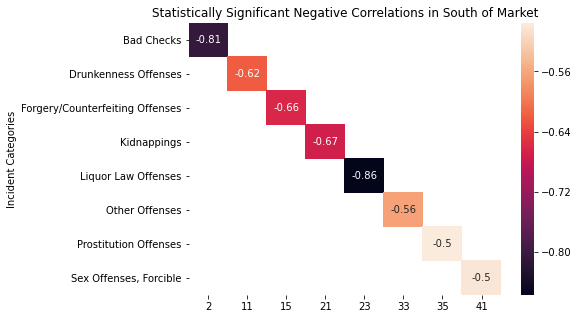

In [99]:
#Make a heatmap of the statistically significant negative correlations between incident categories and pit stops
fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.set_title('Statistically Significant Negative Correlations in South of Market')
sns.heatmap(soma_neg_statsig_correlations_wide, annot = True)

#### Sunset/Parkside

In [100]:
#Make a dataset that only includes data about Sunset/Parkside
sun_park_incidents_df = phase3_incident_counter_df[phase3_incident_counter_df['Neighborhood Name'] == 'Sunset/Parkside']
sun_park_incidents_df.head()

,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing,NUMBER OF PIT STOPS
8,2003,Sunset/Parkside,6,161,2,0,104,0,0,0,...,0,0,10,134,0,0,40,14,0,0
18,2004,Sunset/Parkside,6,168,2,0,119,0,0,0,...,0,0,10,149,0,0,44,9,0,0
28,2005,Sunset/Parkside,7,148,0,0,114,0,0,0,...,0,0,14,167,0,0,51,11,0,0
38,2006,Sunset/Parkside,3,169,2,0,94,0,0,0,...,0,0,11,173,0,0,33,21,0,0
48,2007,Sunset/Parkside,5,174,2,1,70,0,0,0,...,0,0,9,174,0,0,32,18,0,0


In [101]:
#Remove data from 2020
sun_park_incidents_df = sun_park_incidents_df[sun_park_incidents_df['Incident Year'] != 2020]

In [102]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
arson_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                      sun_park_incidents_df['ARSON'])
print('Correlation between Num of Pit Stops and Arson Incidents:', arson_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                         sun_park_incidents_df['ASSAULT'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
bad_checks_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                           sun_park_incidents_df['BAD CHECKS'])
print('Correlation between Num of Pit Stops and Num of Bad Checks:', bad_checks_pitstops_correlation)
bribery_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                        sun_park_incidents_df['BRIBERY'])
print('Correlation between Num of Pit Stops and Num of Briberies:', bribery_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                         sun_park_incidents_df['BURGLARY'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
case_closure_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                             sun_park_incidents_df['CASE CLOSURE'])
print('Correlation between Num of Pit Stops and Num of Case Closures:', case_closure_pitstops_correlation)
civil_sidewalks_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                                sun_park_incidents_df['CIVIL SIDEWALKS'])
print('Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses:', civil_sidewalks_pitstops_correlation)
courtesy_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                         sun_park_incidents_df['COURTESY REPORT'])
print('Correlation between Num of Pit Stops and Num of Courtesy Reports:', courtesy_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                         sun_park_incidents_df['DISORDERLY CONDUCT'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
dui_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                    sun_park_incidents_df['DRIVING UNDER THE INFLUENCE'])
print('Correlation between Num of Pit Stops and DUI Offenses:', dui_pitstops_correlation)
drug_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                     sun_park_incidents_df['DRUG/NARCOTIC'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
drunk_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                      sun_park_incidents_df['DRUNKENNESS'])
print('Correlation between Num of Pit Stops and Num of Drunkenness Offenses:', drunk_pitstops_correlation)
embez_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                      sun_park_incidents_df['EMBEZZLEMENT'])
print('Correlation between Num of Pit Stops and Num of Embezzlement Offenses:', embez_pitstops_correlation)
extortion_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                          sun_park_incidents_df['EXTORTION'])
print('Correlation between Num of Pit Stops and Num of Extortion Offenses:', extortion_pitstops_correlation)
fire_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                     sun_park_incidents_df['FIRE REPORT'])
print('Correlation between Num of Pit Stops and Num of Fire Reports:', fire_pitstops_correlation)
forgery_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                        sun_park_incidents_df['FORGERY/COUNTERFEITING'])
print('Correlation between Num of Pit Stops and Num of Forgery/Counterfeiting Offenses:', forgery_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                      sun_park_incidents_df['FRAUD'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
gambling_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                         sun_park_incidents_df['GAMBLING'])
print('Correlation between Num of Pit Stops and Num of Gambling Offenses:', gambling_pitstops_correlation)
homicide_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                         sun_park_incidents_df['HOMICIDE'])
print('Correlation between Num of Pit Stops and Num of Homicides:', homicide_pitstops_correlation)
humantrafficB_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                              sun_park_incidents_df['HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking B Offenses:', humantrafficB_pitstops_correlation)
humantraffic_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                             sun_park_incidents_df['HUMAN TRAFFICKING, COMMERCIAL SEX ACTS'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking Offenses:', humantraffic_pitstops_correlation)
kidnap_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                       sun_park_incidents_df['KIDNAPPING'])
print('Correlation between Num of Pit Stops and Num of Kidnappings:', kidnap_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                        sun_park_incidents_df['LARCENY/THEFT'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
liquor_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                       sun_park_incidents_df['LIQUOR LAWS'])
print('Correlation between Num of Pit Stops and Num of Liquor Law Offenses:', liquor_pitstops_correlation)
loiter_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                       sun_park_incidents_df['LOITERING'])
print('Correlation between Num of Pit Stops and Num of Loitering Offenses:', loiter_pitstops_correlation)
lostprop_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'],
                                         sun_park_incidents_df['LOST PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Lost Property Incidents:', lostprop_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                         sun_park_incidents_df['MALICIOUS MISCHIEF'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
misc_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                     sun_park_incidents_df['MISCELLANEOUS INVESTIGATION'])
print('Correlation between Num of Pit Stops and Num of Miscellaneous Investigations:', misc_pitstops_correlation)
missing_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                        sun_park_incidents_df['MISSING PERSON'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                         sun_park_incidents_df['MOTOR VEHICLE THEFT'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                        sun_park_incidents_df['NON-CRIMINAL'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
fam_and_child_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                              sun_park_incidents_df['OFFENCES AGAINST THE FAMILY AND CHILDREN'])
print('Correlation between Num of Pit Stops and Num of Offenses Against Family and Children:', fam_and_child_pitstops_correlation)
othermisc_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                          sun_park_incidents_df['OTHER MISCELLANEOUS'])
print('Correlation between Num of Pit Stops and Num of Other Miscellaneous Offenses:', othermisc_pitstops_correlation)
other_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                      sun_park_incidents_df['OTHER OFFENSES'])
print('Correlation between Num of Pit Stops and Num of Other Offenses:', other_pitstops_correlation)
pornography_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                            sun_park_incidents_df['PORNOGRAPHY/OBSCENE MAT'])
print('Correlation between Num of Pit Stops and Num of Pornography Offenses:', pornography_pitstops_correlation)
prost_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                      sun_park_incidents_df['PROSTITUTION'])
print('Correlation between Num of Pit Stops and Num of Prostitution Offenses:', prost_pitstops_correlation)
rape_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                     sun_park_incidents_df['RAPE'])
print('Correlation between Num of Pit Stops and Num of Rapes:', rape_pitstops_correlation)
recov_veh_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                          sun_park_incidents_df['RECOVERED VEHICLE'])
print('Correlation between Num of Pit Stops and Num of Recovered Vehicles:', recov_veh_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                        sun_park_incidents_df['ROBBERY'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sec_codes_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                          sun_park_incidents_df['SECONDARY CODES'])
print('Correlation between Num of Pit Stops and Num of Secondary Codes:', sec_codes_pitstops_correlation)
sex_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                    sun_park_incidents_df['SEX OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses:', sex_pitstops_correlation)                                                               
sex_forcible_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                             sun_park_incidents_df['SEX OFFENSES, FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Forcible:', sex_forcible_pitstops_correlation)
sex_nonforcible_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                                sun_park_incidents_df['SEX OFFENSES, NON FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Non Forcible:', sex_nonforcible_pitstops_correlation) 
stolen_prop_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                            sun_park_incidents_df['STOLEN PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Stolen Property Offenses:', stolen_prop_pitstops_correlation)                                          
suicide_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                        sun_park_incidents_df['SUICIDE'])
print('Correlation between Num of Pit Stops and Num of Suicides:', suicide_pitstops_correlation)  
susp_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                     sun_park_incidents_df['SUSPICIOUS'])
print('Correlation between Num of Pit Stops and Num of Suspicious Offenses:', susp_pitstops_correlation)                                                          
sus_occ_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                        sun_park_incidents_df['SUSPICIOUS OCC'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
traffic_col_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                            sun_park_incidents_df['TRAFFIC COLLISION'])
print('Correlation between Num of Pit Stops and Num of Traffic Collisions:', traffic_col_pitstops_correlation)
traffic_arrest_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                               sun_park_incidents_df['TRAFFIC VIOLATION ARREST'])
print('Correlation between Num of Pit Stops and Num of Traffic Violation Arrests:', traffic_arrest_pitstops_correlation)
trea_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                     sun_park_incidents_df['TREA'])
print('Correlation between Num of Pit Stops and Num of Trea Offenses:', trea_pitstops_correlation)
trespass_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                         sun_park_incidents_df['TRESPASS'])
print('Correlation between Num of Pit Stops and Num of Trespass Offenses:', trespass_pitstops_correlation)                                    
vand_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                     sun_park_incidents_df['VANDALISM'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
veh_impound_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                            sun_park_incidents_df['VEHICLE IMPOUNDED'])
print('Correlation between Num of Pit Stops and Num of Impounded Vehicles:', veh_impound_pitstops_correlation)
veh_misplace_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                             sun_park_incidents_df['VEHICLE MISPLACED'])
print('Correlation between Num of Pit Stops and Num of Misplaced Vehicles:', veh_misplace_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                        sun_park_incidents_df['WARRANTS'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(sun_park_incidents_df['NUMBER OF PIT STOPS'], 
                                       sun_park_incidents_df['WEAPONS OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)

Correlation between Num of Pit Stops and Arson Incidents: (0.7150427966367793, 0.001254022101036022)
Correlation between Num of Pit Stops and Num of Assaults: (0.08903438645238733, 0.7339979536680434)
Correlation between Num of Pit Stops and Num of Bad Checks: (-0.22727272727272732, 0.38034824819053)
Correlation between Num of Pit Stops and Num of Briberies: (-0.1157275124715689, 0.6582698597482065)
Correlation between Num of Pit Stops and Num of Burglaries: (0.25696431495962935, 0.3194247331550326)
Correlation between Num of Pit Stops and Num of Case Closures: (0.5307448924342753, 0.028381009876889175)
Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses: (nan, nan)
Correlation between Num of Pit Stops and Num of Courtesy Reports: (0.4698714938993649, 0.057023336981614756)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.5247499444794483, 0.030563963877603153)
Correlation between Num of Pit Stops and DUI Offenses: (-0.3007036513384962,

C:\Users\sdelp\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [103]:
#Make 3 lists: a list that contains the correlation coefficients between number of pit stops and each incident category,
#a list that contains the p-values for the correlation coefficients, and a list that contains the incident categories
sun_park_correlation_coefficients = [arson_pitstops_correlation[0], assaults_pitstops_correlation[0], 
                                     bad_checks_pitstops_correlation[0], bribery_pitstops_correlation[0], 
                                     burglary_pitstops_correlation[0], case_closure_pitstops_correlation[0], 
                                     civil_sidewalks_pitstops_correlation[0], courtesy_sidewalks_pitstops_correlation[0], 
                                     dis_cond_pitstops_correlation[0], dui_pitstops_correlation[0], drug_pitstops_correlation[0],
                                     drunk_pitstops_correlation[0], embez_pitstops_correlation[0], 
                                     extortion_pitstops_correlation[0], fire_pitstops_correlation[0], 
                                     forgery_pitstops_correlation[0], fraud_pitstops_correlation[0], 
                                     gambling_pitstops_correlation[0], homicide_pitstops_correlation[0], 
                                     humantrafficB_pitstops_correlation[0], humantraffic_pitstops_correlation[0], 
                                     kidnap_pitstops_correlation[0], larceny_pitstops_correlation[0], 
                                     liquor_pitstops_correlation[0], loiter_pitstops_correlation[0], 
                                     lostprop_pitstops_correlation[0], mischief_pitstops_correlation[0], 
                                     misc_pitstops_correlation[0], missing_pitstops_correlation[0], 
                                     mv_theft_pitstops_correlation[0], noncrim_pitstops_correlation[0], 
                                     fam_and_child_pitstops_correlation[0], othermisc_pitstops_correlation[0], 
                                     other_pitstops_correlation[0], pornography_pitstops_correlation[0], 
                                     prost_pitstops_correlation[0], rape_pitstops_correlation[0], 
                                     recov_veh_pitstops_correlation[0], robbery_pitstops_correlation[0], 
                                     sec_codes_pitstops_correlation[0], sex_pitstops_correlation[0],                                                             
                                     sex_forcible_pitstops_correlation[0], sex_nonforcible_pitstops_correlation[0], 
                                     stolen_prop_pitstops_correlation[0], suicide_pitstops_correlation[0], 
                                     susp_pitstops_correlation[0], sus_occ_pitstops_correlation[0], 
                                     traffic_col_pitstops_correlation[0], traffic_arrest_pitstops_correlation[0], 
                                     trea_pitstops_correlation[0], trespass_pitstops_correlation[0],                                  
                                     vand_pitstops_correlation[0], veh_impound_pitstops_correlation[0], 
                                     veh_misplace_pitstops_correlation[0], warrant_pitstops_correlation[0], 
                                     weapon_pitstops_correlation[0]]

sun_park_p_values = [arson_pitstops_correlation[1], assaults_pitstops_correlation[1], bad_checks_pitstops_correlation[1], 
                     bribery_pitstops_correlation[1], burglary_pitstops_correlation[1], case_closure_pitstops_correlation[1], 
                     civil_sidewalks_pitstops_correlation[1], courtesy_sidewalks_pitstops_correlation[1], 
                     dis_cond_pitstops_correlation[1], dui_pitstops_correlation[1], drug_pitstops_correlation[1],
                     drunk_pitstops_correlation[1], embez_pitstops_correlation[1], extortion_pitstops_correlation[1], 
                     fire_pitstops_correlation[1], forgery_pitstops_correlation[1], fraud_pitstops_correlation[1], 
                     gambling_pitstops_correlation[1], homicide_pitstops_correlation[1], humantrafficB_pitstops_correlation[1],
                     humantraffic_pitstops_correlation[1], kidnap_pitstops_correlation[1], larceny_pitstops_correlation[1], 
                     liquor_pitstops_correlation[1], loiter_pitstops_correlation[1], lostprop_pitstops_correlation[1], 
                     mischief_pitstops_correlation[1], misc_pitstops_correlation[1], missing_pitstops_correlation[1], 
                     mv_theft_pitstops_correlation[1], noncrim_pitstops_correlation[1], fam_and_child_pitstops_correlation[1],
                     othermisc_pitstops_correlation[1], other_pitstops_correlation[1], pornography_pitstops_correlation[1], 
                     prost_pitstops_correlation[1], rape_pitstops_correlation[1], recov_veh_pitstops_correlation[1], 
                     robbery_pitstops_correlation[1], sec_codes_pitstops_correlation[1], sex_pitstops_correlation[1],                                                             
                     sex_forcible_pitstops_correlation[1], sex_nonforcible_pitstops_correlation[1], 
                     stolen_prop_pitstops_correlation[1], suicide_pitstops_correlation[1], susp_pitstops_correlation[1],
                     sus_occ_pitstops_correlation[1], traffic_col_pitstops_correlation[1], 
                     traffic_arrest_pitstops_correlation[1], trea_pitstops_correlation[1], trespass_pitstops_correlation[1],                                  
                     vand_pitstops_correlation[1], veh_impound_pitstops_correlation[1], veh_misplace_pitstops_correlation[1],
                     warrant_pitstops_correlation[1], weapon_pitstops_correlation[1]]

sun_park_incident_categories = ['Arson Incidents', 'Assaults', 'Bad Checks', 'Briberies', 'Burglaries', 'Case Closures',
                                'Civil Sidewalk Offenses', 'Courtesy Reports', 'Disorderly Conduct Offenses', 'DUI Offenses', 
                                'Drug/Narcotic Offenses', 'Drunkenness Offenses', 'Embezzlement Offenses', 'Extortion Offenses',
                                'Fire Reports', 'Forgery/Counterfeiting Offenses', 'Fraud Offenses', 'Gambling Offenses', 
                                'Homicides', 'Human Trafficking B Offenses', 'Human Trafficking Offenses', 'Kidnappings',
                                'Larceny/Theft Offenses', 'Liquor Law Offenses', 'Loitering Offenses', 'Lost Property Incidents', 
                                'Malicious Mischief Offenses', 'Miscellaneous Investigations', 'Missing Persons', 
                                'Motor Vehicle Thefts', 'Non-Criminal Offenses', 'Offenses Against Family and Children', 
                                'Other Miscellaneous Offenses', 'Other Offenses', 'Pornography Offenses', 
                                'Prostitution Offenses', 'Rape', 'Recovered Vehicles', 'Robberies', 'Secondary Codes', 
                                'Sex Offenses', 'Sex Offenses, Forcible', 'Sex Offenses, Non Forcible', 'Stolen Property', 
                                'Suicides', 'Suspicious Offenses', 'Suspicious Occ Offenses', 'Traffic Collisions', 
                                'Traffic Violation Arrests', 'Trea Offenses', 'Trespass Offenses', 'Vandalism Offenses', 
                                'Impounded Vehicles', 'Misplaced Vehicles', 'Warrants', 'Weapons Offenses']

In [104]:
#Make a dataframe from above lists
sun_park_correlations_df = pd.DataFrame(list(zip(sun_park_incident_categories, sun_park_correlation_coefficients, 
                                                 sun_park_p_values)), 
                                        columns = ['Incident Categories', 'Correlation Coefficient', 'P-value'])
sun_park_correlations_df

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.715043,1.254022e-03
1,Assaults,0.089034,7.339980e-01
2,Bad Checks,-0.227273,3.803482e-01
3,Briberies,-0.115728,6.582699e-01
4,Burglaries,0.256964,3.194247e-01
5,Case Closures,0.530745,2.838101e-02
6,Civil Sidewalk Offenses,NaN,NaN
7,Courtesy Reports,0.606529,9.841257e-03
8,Disorderly Conduct Offenses,0.524750,3.056396e-02
9,DUI Offenses,-0.300704,2.408812e-01


In [105]:
#Drop all null values
sun_park_correlations_df.dropna(axis = 0)

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.715043,1.254022e-03
1,Assaults,0.089034,7.339980e-01
2,Bad Checks,-0.227273,3.803482e-01
3,Briberies,-0.115728,6.582699e-01
4,Burglaries,0.256964,3.194247e-01
5,Case Closures,0.530745,2.838101e-02
7,Courtesy Reports,0.606529,9.841257e-03
8,Disorderly Conduct Offenses,0.524750,3.056396e-02
9,DUI Offenses,-0.300704,2.408812e-01
10,Drug/Narcotic Offenses,-0.100986,6.997556e-01


In [106]:
#Make a dataframe that includes only negative correlation coefficients
sun_park_neg_correlations_df = sun_park_correlations_df[sun_park_correlations_df['Correlation Coefficient'] <= 0]
sun_park_neg_correlations_df

,Incident Categories,Correlation Coefficient,P-value
2,Bad Checks,-0.227273,0.380348
3,Briberies,-0.115728,0.658270
9,DUI Offenses,-0.300704,0.240881
10,Drug/Narcotic Offenses,-0.100986,0.699756
11,Drunkenness Offenses,-0.351459,0.166562
12,Embezzlement Offenses,-0.062500,0.811650
13,Extortion Offenses,-0.218539,0.399406
15,Forgery/Counterfeiting Offenses,-0.163167,0.531493
17,Gambling Offenses,-0.086031,0.742681
18,Homicides,-0.062500,0.811650


In [107]:
#Make a dataframe that includes only statistically significant negative correlation coefficients
sun_park_neg_statsig_correlations_df = sun_park_neg_correlations_df[sun_park_neg_correlations_df['P-value'] < 0.05]
sun_park_neg_statsig_correlations_df

,Incident Categories,Correlation Coefficient,P-value
39,Secondary Codes,-0.494994,0.043365


In [108]:
#Pivot and transpose dataframe so that a heatmap can be made
sun_park_neg_statsig_correlations_wide = sun_park_neg_statsig_correlations_df.pivot(columns = 'Incident Categories', 
                                                                                    values = 'Correlation Coefficient')
sun_park_neg_statsig_correlations_wide = sun_park_neg_statsig_correlations_wide.transpose()

<AxesSubplot:title={'center':'Statistically Significant Negative Correlations in Sunset/Parkside'}, ylabel='Incident Categories'>

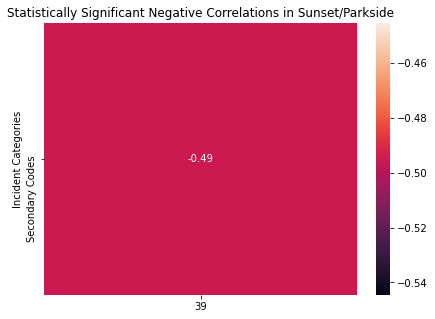

In [109]:
#Make a heatmap of statistically significant negative correlations between incident categories and pit stops
fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.set_title('Statistically Significant Negative Correlations in Sunset/Parkside')
sns.heatmap(sun_park_neg_statsig_correlations_wide, annot = True)

#### Tenderloin

In [110]:
#Make a dataset that only includes data about Sunset/Parkside
tend_incidents_df = phase3_incident_counter_df[phase3_incident_counter_df['Neighborhood Name'] == 'Tenderloin']
tend_incidents_df.head()

,Incident Year,Neighborhood Name,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,CASE CLOSURE,CIVIL SIDEWALKS,COURTESY REPORT,...,TRAFFIC VIOLATION ARREST,TREA,TRESPASS,VANDALISM,VEHICLE IMPOUNDED,VEHICLE MISPLACED,WARRANTS,WEAPONS OFFENSE,missing,NUMBER OF PIT STOPS
9,2003,Tenderloin,5,760,3,0,126,0,0,0,...,0,0,91,177,0,0,869,73,0,0
19,2004,Tenderloin,8,710,1,1,163,0,0,0,...,0,0,68,160,0,0,733,60,0,0
29,2005,Tenderloin,4,744,4,1,146,0,0,0,...,0,0,54,155,0,0,647,80,0,0
39,2006,Tenderloin,6,813,4,1,175,0,0,0,...,0,0,68,192,0,0,648,65,0,0
49,2007,Tenderloin,5,876,2,3,112,0,0,0,...,0,0,75,193,0,0,767,71,0,0


In [111]:
#Remove data from 2020
tend_incidents_df = tend_incidents_df[tend_incidents_df['Incident Year'] != 2020]

In [112]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
arson_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                      tend_incidents_df['ARSON'])
print('Correlation between Num of Pit Stops and Arson Incidents:', arson_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                         tend_incidents_df['ASSAULT'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
bad_checks_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                           tend_incidents_df['BAD CHECKS'])
print('Correlation between Num of Pit Stops and Num of Bad Checks:', bad_checks_pitstops_correlation)
bribery_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                        tend_incidents_df['BRIBERY'])
print('Correlation between Num of Pit Stops and Num of Briberies:', bribery_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                         tend_incidents_df['BURGLARY'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
case_closure_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                             tend_incidents_df['CASE CLOSURE'])
print('Correlation between Num of Pit Stops and Num of Case Closures:', case_closure_pitstops_correlation)
civil_sidewalks_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                                tend_incidents_df['CIVIL SIDEWALKS'])
print('Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses:', civil_sidewalks_pitstops_correlation)
courtesy_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                         tend_incidents_df['COURTESY REPORT'])
print('Correlation between Num of Pit Stops and Num of Courtesy Reports:', courtesy_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                         tend_incidents_df['DISORDERLY CONDUCT'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
dui_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                    tend_incidents_df['DRIVING UNDER THE INFLUENCE'])
print('Correlation between Num of Pit Stops and DUI Offenses:', dui_pitstops_correlation)
drug_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                     tend_incidents_df['DRUG/NARCOTIC'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
drunk_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                      tend_incidents_df['DRUNKENNESS'])
print('Correlation between Num of Pit Stops and Num of Drunkenness Offenses:', drunk_pitstops_correlation)
embez_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                      tend_incidents_df['EMBEZZLEMENT'])
print('Correlation between Num of Pit Stops and Num of Embezzlement Offenses:', embez_pitstops_correlation)
extortion_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                          tend_incidents_df['EXTORTION'])
print('Correlation between Num of Pit Stops and Num of Extortion Offenses:', extortion_pitstops_correlation)
fire_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                     tend_incidents_df['FIRE REPORT'])
print('Correlation between Num of Pit Stops and Num of Fire Reports:', fire_pitstops_correlation)
forgery_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                        tend_incidents_df['FORGERY/COUNTERFEITING'])
print('Correlation between Num of Pit Stops and Num of Forgery/Counterfeiting Offenses:', forgery_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                      tend_incidents_df['FRAUD'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
gambling_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                         tend_incidents_df['GAMBLING'])
print('Correlation between Num of Pit Stops and Num of Gambling Offenses:', gambling_pitstops_correlation)
homicide_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                         tend_incidents_df['HOMICIDE'])
print('Correlation between Num of Pit Stops and Num of Homicides:', homicide_pitstops_correlation)
humantrafficB_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                              tend_incidents_df['HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking B Offenses:', humantrafficB_pitstops_correlation)
humantraffic_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                             tend_incidents_df['HUMAN TRAFFICKING, COMMERCIAL SEX ACTS'])
print('Correlation between Num of Pit Stops and Num of Human Trafficking Offenses:', humantraffic_pitstops_correlation)
kidnap_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                       tend_incidents_df['KIDNAPPING'])
print('Correlation between Num of Pit Stops and Num of Kidnappings:', kidnap_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                        tend_incidents_df['LARCENY/THEFT'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
liquor_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                       tend_incidents_df['LIQUOR LAWS'])
print('Correlation between Num of Pit Stops and Num of Liquor Law Offenses:', liquor_pitstops_correlation)
loiter_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                       tend_incidents_df['LOITERING'])
print('Correlation between Num of Pit Stops and Num of Loitering Offenses:', loiter_pitstops_correlation)
lostprop_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'],
                                         tend_incidents_df['LOST PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Lost Property Incidents:', lostprop_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                         tend_incidents_df['MALICIOUS MISCHIEF'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
misc_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                     tend_incidents_df['MISCELLANEOUS INVESTIGATION'])
print('Correlation between Num of Pit Stops and Num of Miscellaneous Investigations:', misc_pitstops_correlation)
missing_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                        tend_incidents_df['MISSING PERSON'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                         tend_incidents_df['MOTOR VEHICLE THEFT'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                        tend_incidents_df['NON-CRIMINAL'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
fam_and_child_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                              tend_incidents_df['OFFENCES AGAINST THE FAMILY AND CHILDREN'])
print('Correlation between Num of Pit Stops and Num of Offenses Against Family and Children:', fam_and_child_pitstops_correlation)
othermisc_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                          tend_incidents_df['OTHER MISCELLANEOUS'])
print('Correlation between Num of Pit Stops and Num of Other Miscellaneous Offenses:', othermisc_pitstops_correlation)
other_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                      tend_incidents_df['OTHER OFFENSES'])
print('Correlation between Num of Pit Stops and Num of Other Offenses:', other_pitstops_correlation)
pornography_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                            tend_incidents_df['PORNOGRAPHY/OBSCENE MAT'])
print('Correlation between Num of Pit Stops and Num of Pornography Offenses:', pornography_pitstops_correlation)
prost_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                      tend_incidents_df['PROSTITUTION'])
print('Correlation between Num of Pit Stops and Num of Prostitution Offenses:', prost_pitstops_correlation)
rape_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                     tend_incidents_df['RAPE'])
print('Correlation between Num of Pit Stops and Num of Rapes:', rape_pitstops_correlation)
recov_veh_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                          tend_incidents_df['RECOVERED VEHICLE'])
print('Correlation between Num of Pit Stops and Num of Recovered Vehicles:', recov_veh_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                        tend_incidents_df['ROBBERY'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sec_codes_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                          tend_incidents_df['SECONDARY CODES'])
print('Correlation between Num of Pit Stops and Num of Secondary Codes:', sec_codes_pitstops_correlation)
sex_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                    tend_incidents_df['SEX OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses:', sex_pitstops_correlation)                                                               
sex_forcible_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                             tend_incidents_df['SEX OFFENSES, FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Forcible:', sex_forcible_pitstops_correlation)
sex_nonforcible_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                                tend_incidents_df['SEX OFFENSES, NON FORCIBLE'])
print('Correlation between Num of Pit Stops and Num of Sex Offenses, Non Forcible:', sex_nonforcible_pitstops_correlation) 
stolen_prop_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                            tend_incidents_df['STOLEN PROPERTY'])
print('Correlation between Num of Pit Stops and Num of Stolen Property Offenses:', stolen_prop_pitstops_correlation)                                          
suicide_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                        tend_incidents_df['SUICIDE'])
print('Correlation between Num of Pit Stops and Num of Suicides:', suicide_pitstops_correlation)  
susp_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                     tend_incidents_df['SUSPICIOUS'])
print('Correlation between Num of Pit Stops and Num of Suspicious Offenses:', susp_pitstops_correlation)                                                          
sus_occ_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                        tend_incidents_df['SUSPICIOUS OCC'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
traffic_col_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                            tend_incidents_df['TRAFFIC COLLISION'])
print('Correlation between Num of Pit Stops and Num of Traffic Collisions:', traffic_col_pitstops_correlation)
traffic_arrest_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                               tend_incidents_df['TRAFFIC VIOLATION ARREST'])
print('Correlation between Num of Pit Stops and Num of Traffic Violation Arrests:', traffic_arrest_pitstops_correlation)
trea_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                     tend_incidents_df['TREA'])
print('Correlation between Num of Pit Stops and Num of Trea Offenses:', trea_pitstops_correlation)
trespass_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                         tend_incidents_df['TRESPASS'])
print('Correlation between Num of Pit Stops and Num of Trespass Offenses:', trespass_pitstops_correlation)                                    
vand_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                     tend_incidents_df['VANDALISM'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
veh_impound_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                            tend_incidents_df['VEHICLE IMPOUNDED'])
print('Correlation between Num of Pit Stops and Num of Impounded Vehicles:', veh_impound_pitstops_correlation)
veh_misplace_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                             tend_incidents_df['VEHICLE MISPLACED'])
print('Correlation between Num of Pit Stops and Num of Misplaced Vehicles:', veh_misplace_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                        tend_incidents_df['WARRANTS'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(tend_incidents_df['NUMBER OF PIT STOPS'], 
                                       tend_incidents_df['WEAPONS OFFENSE'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)

Correlation between Num of Pit Stops and Arson Incidents: (0.7043448682859969, 0.0015968990815622038)
Correlation between Num of Pit Stops and Num of Assaults: (0.3842893988770436, 0.12776861343665602)
Correlation between Num of Pit Stops and Num of Bad Checks: (-0.7184194619606874, 0.00115936422843836)
Correlation between Num of Pit Stops and Num of Briberies: (-0.40474291170026017, 0.10706433365199915)
Correlation between Num of Pit Stops and Num of Burglaries: (0.514466850402471, 0.034606065481404776)
Correlation between Num of Pit Stops and Num of Case Closures: (0.7034259093246183, 0.001629625928418691)
Correlation between Num of Pit Stops and Num of Civil Sidewalk Offenses: (0.6511033667162174, 0.00464017052575885)
Correlation between Num of Pit Stops and Num of Courtesy Reports: (0.7060778388685955, 0.0015366519799316451)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.4303778735987942, 0.08462633917808345)
Correlation between Num of Pit Stops and

C:\Users\sdelp\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [113]:
#Make 3 lists: a list that contains the correlation coefficients between number of pit stops and each incident category,
#a list that contains the p-values for the correlation coefficients, and a list that contains the incident categories
tend_correlation_coefficients = [arson_pitstops_correlation[0], assaults_pitstops_correlation[0], 
                                 bad_checks_pitstops_correlation[0], bribery_pitstops_correlation[0], 
                                 burglary_pitstops_correlation[0], case_closure_pitstops_correlation[0], 
                                 civil_sidewalks_pitstops_correlation[0], courtesy_sidewalks_pitstops_correlation[0], 
                                 dis_cond_pitstops_correlation[0], dui_pitstops_correlation[0], drug_pitstops_correlation[0],
                                 drunk_pitstops_correlation[0], embez_pitstops_correlation[0], 
                                 extortion_pitstops_correlation[0], fire_pitstops_correlation[0], 
                                 forgery_pitstops_correlation[0], fraud_pitstops_correlation[0], 
                                 gambling_pitstops_correlation[0], homicide_pitstops_correlation[0], 
                                 humantrafficB_pitstops_correlation[0], humantraffic_pitstops_correlation[0], 
                                 kidnap_pitstops_correlation[0], larceny_pitstops_correlation[0], 
                                 liquor_pitstops_correlation[0], loiter_pitstops_correlation[0], 
                                 lostprop_pitstops_correlation[0], mischief_pitstops_correlation[0], 
                                 misc_pitstops_correlation[0], missing_pitstops_correlation[0], 
                                 mv_theft_pitstops_correlation[0], noncrim_pitstops_correlation[0], 
                                 fam_and_child_pitstops_correlation[0], othermisc_pitstops_correlation[0], 
                                 other_pitstops_correlation[0], pornography_pitstops_correlation[0], 
                                 prost_pitstops_correlation[0], rape_pitstops_correlation[0], 
                                 recov_veh_pitstops_correlation[0], robbery_pitstops_correlation[0], 
                                 sec_codes_pitstops_correlation[0], sex_pitstops_correlation[0],                                                             
                                 sex_forcible_pitstops_correlation[0], sex_nonforcible_pitstops_correlation[0], 
                                 stolen_prop_pitstops_correlation[0], suicide_pitstops_correlation[0], 
                                 susp_pitstops_correlation[0], sus_occ_pitstops_correlation[0], 
                                 traffic_col_pitstops_correlation[0], traffic_arrest_pitstops_correlation[0], 
                                 trea_pitstops_correlation[0], trespass_pitstops_correlation[0],                                  
                                 vand_pitstops_correlation[0], veh_impound_pitstops_correlation[0], 
                                 veh_misplace_pitstops_correlation[0], warrant_pitstops_correlation[0], 
                                 weapon_pitstops_correlation[0]]

tend_p_values = [arson_pitstops_correlation[1], assaults_pitstops_correlation[1], bad_checks_pitstops_correlation[1], 
                 bribery_pitstops_correlation[1], burglary_pitstops_correlation[1], case_closure_pitstops_correlation[1], 
                 civil_sidewalks_pitstops_correlation[1], courtesy_sidewalks_pitstops_correlation[1], 
                 dis_cond_pitstops_correlation[1], dui_pitstops_correlation[1], drug_pitstops_correlation[1],
                 drunk_pitstops_correlation[1], embez_pitstops_correlation[1], extortion_pitstops_correlation[1], 
                 fire_pitstops_correlation[1], forgery_pitstops_correlation[1], fraud_pitstops_correlation[1], 
                 gambling_pitstops_correlation[1], homicide_pitstops_correlation[1], humantrafficB_pitstops_correlation[1],
                 humantraffic_pitstops_correlation[1], kidnap_pitstops_correlation[1], larceny_pitstops_correlation[1], 
                 liquor_pitstops_correlation[1], loiter_pitstops_correlation[1], lostprop_pitstops_correlation[1], 
                 mischief_pitstops_correlation[1], misc_pitstops_correlation[1], missing_pitstops_correlation[1], 
                 mv_theft_pitstops_correlation[1], noncrim_pitstops_correlation[1], fam_and_child_pitstops_correlation[1],
                 othermisc_pitstops_correlation[1], other_pitstops_correlation[1], pornography_pitstops_correlation[1], 
                 prost_pitstops_correlation[1], rape_pitstops_correlation[1], recov_veh_pitstops_correlation[1], 
                 robbery_pitstops_correlation[1], sec_codes_pitstops_correlation[1], sex_pitstops_correlation[1],                                                             
                 sex_forcible_pitstops_correlation[1], sex_nonforcible_pitstops_correlation[1], 
                 stolen_prop_pitstops_correlation[1], suicide_pitstops_correlation[1], susp_pitstops_correlation[1],
                 sus_occ_pitstops_correlation[1], traffic_col_pitstops_correlation[1], 
                 traffic_arrest_pitstops_correlation[1], trea_pitstops_correlation[1], trespass_pitstops_correlation[1],                                  
                 vand_pitstops_correlation[1], veh_impound_pitstops_correlation[1], veh_misplace_pitstops_correlation[1],
                 warrant_pitstops_correlation[1], weapon_pitstops_correlation[1]]

tend_incident_categories = ['Arson Incidents', 'Assaults', 'Bad Checks', 'Briberies', 'Burglaries', 'Case Closures',
                            'Civil Sidewalk Offenses', 'Courtesy Reports', 'Disorderly Conduct Offenses', 'DUI Offenses', 
                            'Drug/Narcotic Offenses', 'Drunkenness Offenses', 'Embezzlement Offenses', 'Extortion Offenses',
                            'Fire Reports', 'Forgery/Counterfeiting Offenses', 'Fraud Offenses', 'Gambling Offenses', 
                            'Homicides', 'Human Trafficking B Offenses', 'Human Trafficking Offenses', 'Kidnappings',
                            'Larceny/Theft Offenses', 'Liquor Law Offenses', 'Loitering Offenses', 'Lost Property Incidents', 
                            'Malicious Mischief Offenses', 'Miscellaneous Investigations', 'Missing Persons', 
                            'Motor Vehicle Thefts', 'Non-Criminal Offenses', 'Offenses Against Family and Children', 
                            'Other Miscellaneous Offenses', 'Other Offenses', 'Pornography Offenses', 
                            'Prostitution Offenses', 'Rape', 'Recovered Vehicles', 'Robberies', 'Secondary Codes', 
                            'Sex Offenses', 'Sex Offenses, Forcible', 'Sex Offenses, Non Forcible', 'Stolen Property', 
                            'Suicides', 'Suspicious Offenses', 'Suspicious Occ Offenses', 'Traffic Collisions', 
                            'Traffic Violation Arrests', 'Trea Offenses', 'Trespass Offenses', 'Vandalism Offenses', 
                            'Impounded Vehicles', 'Misplaced Vehicles', 'Warrants', 'Weapons Offenses']

In [114]:
#Make a dataframe from above lists
tend_correlations_df = pd.DataFrame(list(zip(tend_incident_categories, tend_correlation_coefficients, tend_p_values)), 
                                    columns = ['Incident Categories', 'Correlation Coefficient', 'P-value'])
tend_correlations_df

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.704345,0.001597
1,Assaults,0.384289,0.127769
2,Bad Checks,-0.718419,0.001159
3,Briberies,-0.404743,0.107064
4,Burglaries,0.514467,0.034606
5,Case Closures,0.703426,0.001630
6,Civil Sidewalk Offenses,0.651103,0.004640
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.430378,0.084626
9,DUI Offenses,-0.687842,0.002274


In [115]:
#Drop all null values
tend_correlations_df.dropna(axis = 0)

,Incident Categories,Correlation Coefficient,P-value
0,Arson Incidents,0.704345,0.001597
1,Assaults,0.384289,0.127769
2,Bad Checks,-0.718419,0.001159
3,Briberies,-0.404743,0.107064
4,Burglaries,0.514467,0.034606
5,Case Closures,0.703426,0.001630
6,Civil Sidewalk Offenses,0.651103,0.004640
7,Courtesy Reports,0.606529,0.009841
8,Disorderly Conduct Offenses,0.430378,0.084626
9,DUI Offenses,-0.687842,0.002274


In [116]:
#Make a dataframe that includes only negative correlation coefficients
tend_neg_correlations_df = tend_correlations_df[tend_correlations_df['Correlation Coefficient'] <= 0]
tend_neg_correlations_df

,Incident Categories,Correlation Coefficient,P-value
2,Bad Checks,-0.718419,0.001159
3,Briberies,-0.404743,0.107064
9,DUI Offenses,-0.687842,0.002274
10,Drug/Narcotic Offenses,-0.361426,0.154038
11,Drunkenness Offenses,-0.625789,0.007209
13,Extortion Offenses,-0.078368,0.764964
15,Forgery/Counterfeiting Offenses,-0.446159,0.072634
17,Gambling Offenses,-0.150146,0.565162
21,Kidnappings,-0.341741,0.179417
23,Liquor Law Offenses,-0.610331,0.009269


In [117]:
#Make a dataframe that includes only statistically significant negative correlation coefficients
tend_neg_statsig_correlations_df = tend_neg_correlations_df[tend_neg_correlations_df['P-value'] < 0.05]
tend_neg_statsig_correlations_df

,Incident Categories,Correlation Coefficient,P-value
2,Bad Checks,-0.718419,0.001159
9,DUI Offenses,-0.687842,0.002274
11,Drunkenness Offenses,-0.625789,0.007209
23,Liquor Law Offenses,-0.610331,0.009269
24,Loitering Offenses,-0.652179,0.004550
33,Other Offenses,-0.616312,0.008423
50,Trespass Offenses,-0.556758,0.020265


In [118]:
#Pivot and transpose dataframe so that a heatmap can be made
tend_neg_statsig_correlations_wide = tend_neg_statsig_correlations_df.pivot(columns = 'Incident Categories', 
                                                                            values = 'Correlation Coefficient')
tend_neg_statsig_correlations_wide = tend_neg_statsig_correlations_wide.transpose()

<AxesSubplot:title={'center':'Statistically Significant Negative Correlations in Tenderloin'}, ylabel='Incident Categories'>

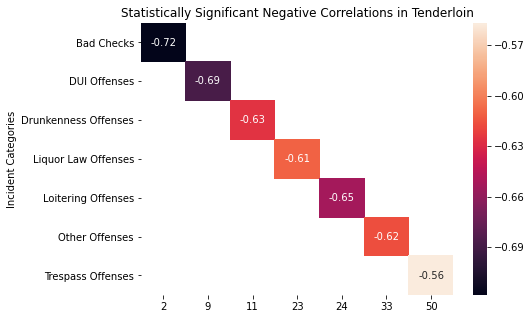

In [119]:
#Make a heatmap of the statistically significant negative correlations between incident categories and pit stops
fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.set_title('Statistically Significant Negative Correlations in Tenderloin')
sns.heatmap(tend_neg_statsig_correlations_wide, annot = True)